In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.style.use("seaborn-colorblind")
warnings.filterwarnings("ignore")

In [2]:
method_colours = {
    "cao": "tab:green",
    "huang": "tab:blue",
    "matching": "tab:orange",
}

# Plotting results


In [3]:
def violin_plots(name, column, root, destination=None):

    results = pd.read_csv(f"{root}{name}_results.csv")

    fig, ax = plt.subplots(figsize=(8, 4), dpi=300)

    for pos, (group, values) in enumerate(results.groupby("initialisation")):
        ax.boxplot(values[column], positions=[pos], sym=".")
        v = ax.violinplot(values[column], [pos], showextrema=False)
        for body in v["bodies"]:
            body.set_facecolor(method_colours[group])

    separated_column = " ".join(column.split("_"))
    ax.set_xticks((0, 1, 2))
    ax.set_xticklabels(("Cao", "Huang", "Matching"))
    ax.set_xlabel("Initialisation method")
    ax.set_ylabel(separated_column.capitalize())
    ax.set_title(
        " ".join(name.split("_")).capitalize() + f" ({root.split('/')[-2]})"
    )

    if destination is not None:
        plt.tight_layout()
        plt.savefig(destination + f"{name}_{column}_violinplot.pdf", transparent=True)


In [4]:
def empirical_cdf_plots(name, column, root, destination=None):

    results = pd.read_csv(f"{root}{name}_results.csv")

    fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

    for group, values in results.groupby("initialisation"):
        colour = method_colours[group]
        if group == "cao":
            ax.vlines(
                x=values[column].median(),
                ymin=0,
                ymax=1,
                color=colour,
                label=group.capitalize(),
            )
        else:
            histtype, alpha = "bar", 0.25
            if group == "huang":
                histtype, alpha = "bar", 0.25

            ax.hist(
                values[column],
                cumulative=True,
                bins=100,
                density=True,
                color=colour,
                histtype=histtype,
                alpha=alpha,
                label=group.capitalize(),
            )

    separated_column = " ".join(column.split("_"))
    ax.set_xlabel(separated_column.capitalize())
    ax.set_ylabel("Likelihood of observation")
    ax.set_title(
        " ".join(name.split("_")).capitalize() + f" ({root.split('/')[-2]})"
    )
    
    ax.set_ylim(0, 1)

    ax.legend()

    if destination is not None:
        plt.tight_layout()
        plt.savefig(destination + f"{name}_{column}_cdfplot.pdf", transparent=True)


In [5]:
def scatter_plots(name, root, destination=None):

    results = pd.read_csv(f"{root}{name}_results.csv")

    fig, ax = plt.subplots(figsize=(8, 8), dpi=300)

    for group, values in results.groupby("initialisation"):
        colour = method_colours[group]
        alpha, zorder, marker, markersize = 0.5, None, None, None
        if group == "cao":
            alpha, zorder, marker, markersize = 1, 1, "x", 125
        ax.scatter(
            values["initial_cost"],
            values["final_cost"],
            alpha=alpha,
            zorder=zorder,
            marker=marker,
            s=markersize,
            edgecolor="None",
            facecolor=colour,
            label=group.capitalize(),
        )

    ax.set_xlabel("Initial cost")
    ax.set_ylabel("Final cost")
    ax.set_title(
        " ".join(name.split("_")).capitalize() + f" ({root.split('/')[-2]})"
    )
    
    ax.legend()

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    lower, upper = min(xmin, ymin), max(xmax, ymax)

    ax.set_xlim(lower, upper)
    ax.set_ylim(lower, upper)

    if destination is not None:
        plt.tight_layout()
        plt.savefig(destination + f"{name}_cost_scatterplot.pdf", transparent=True)


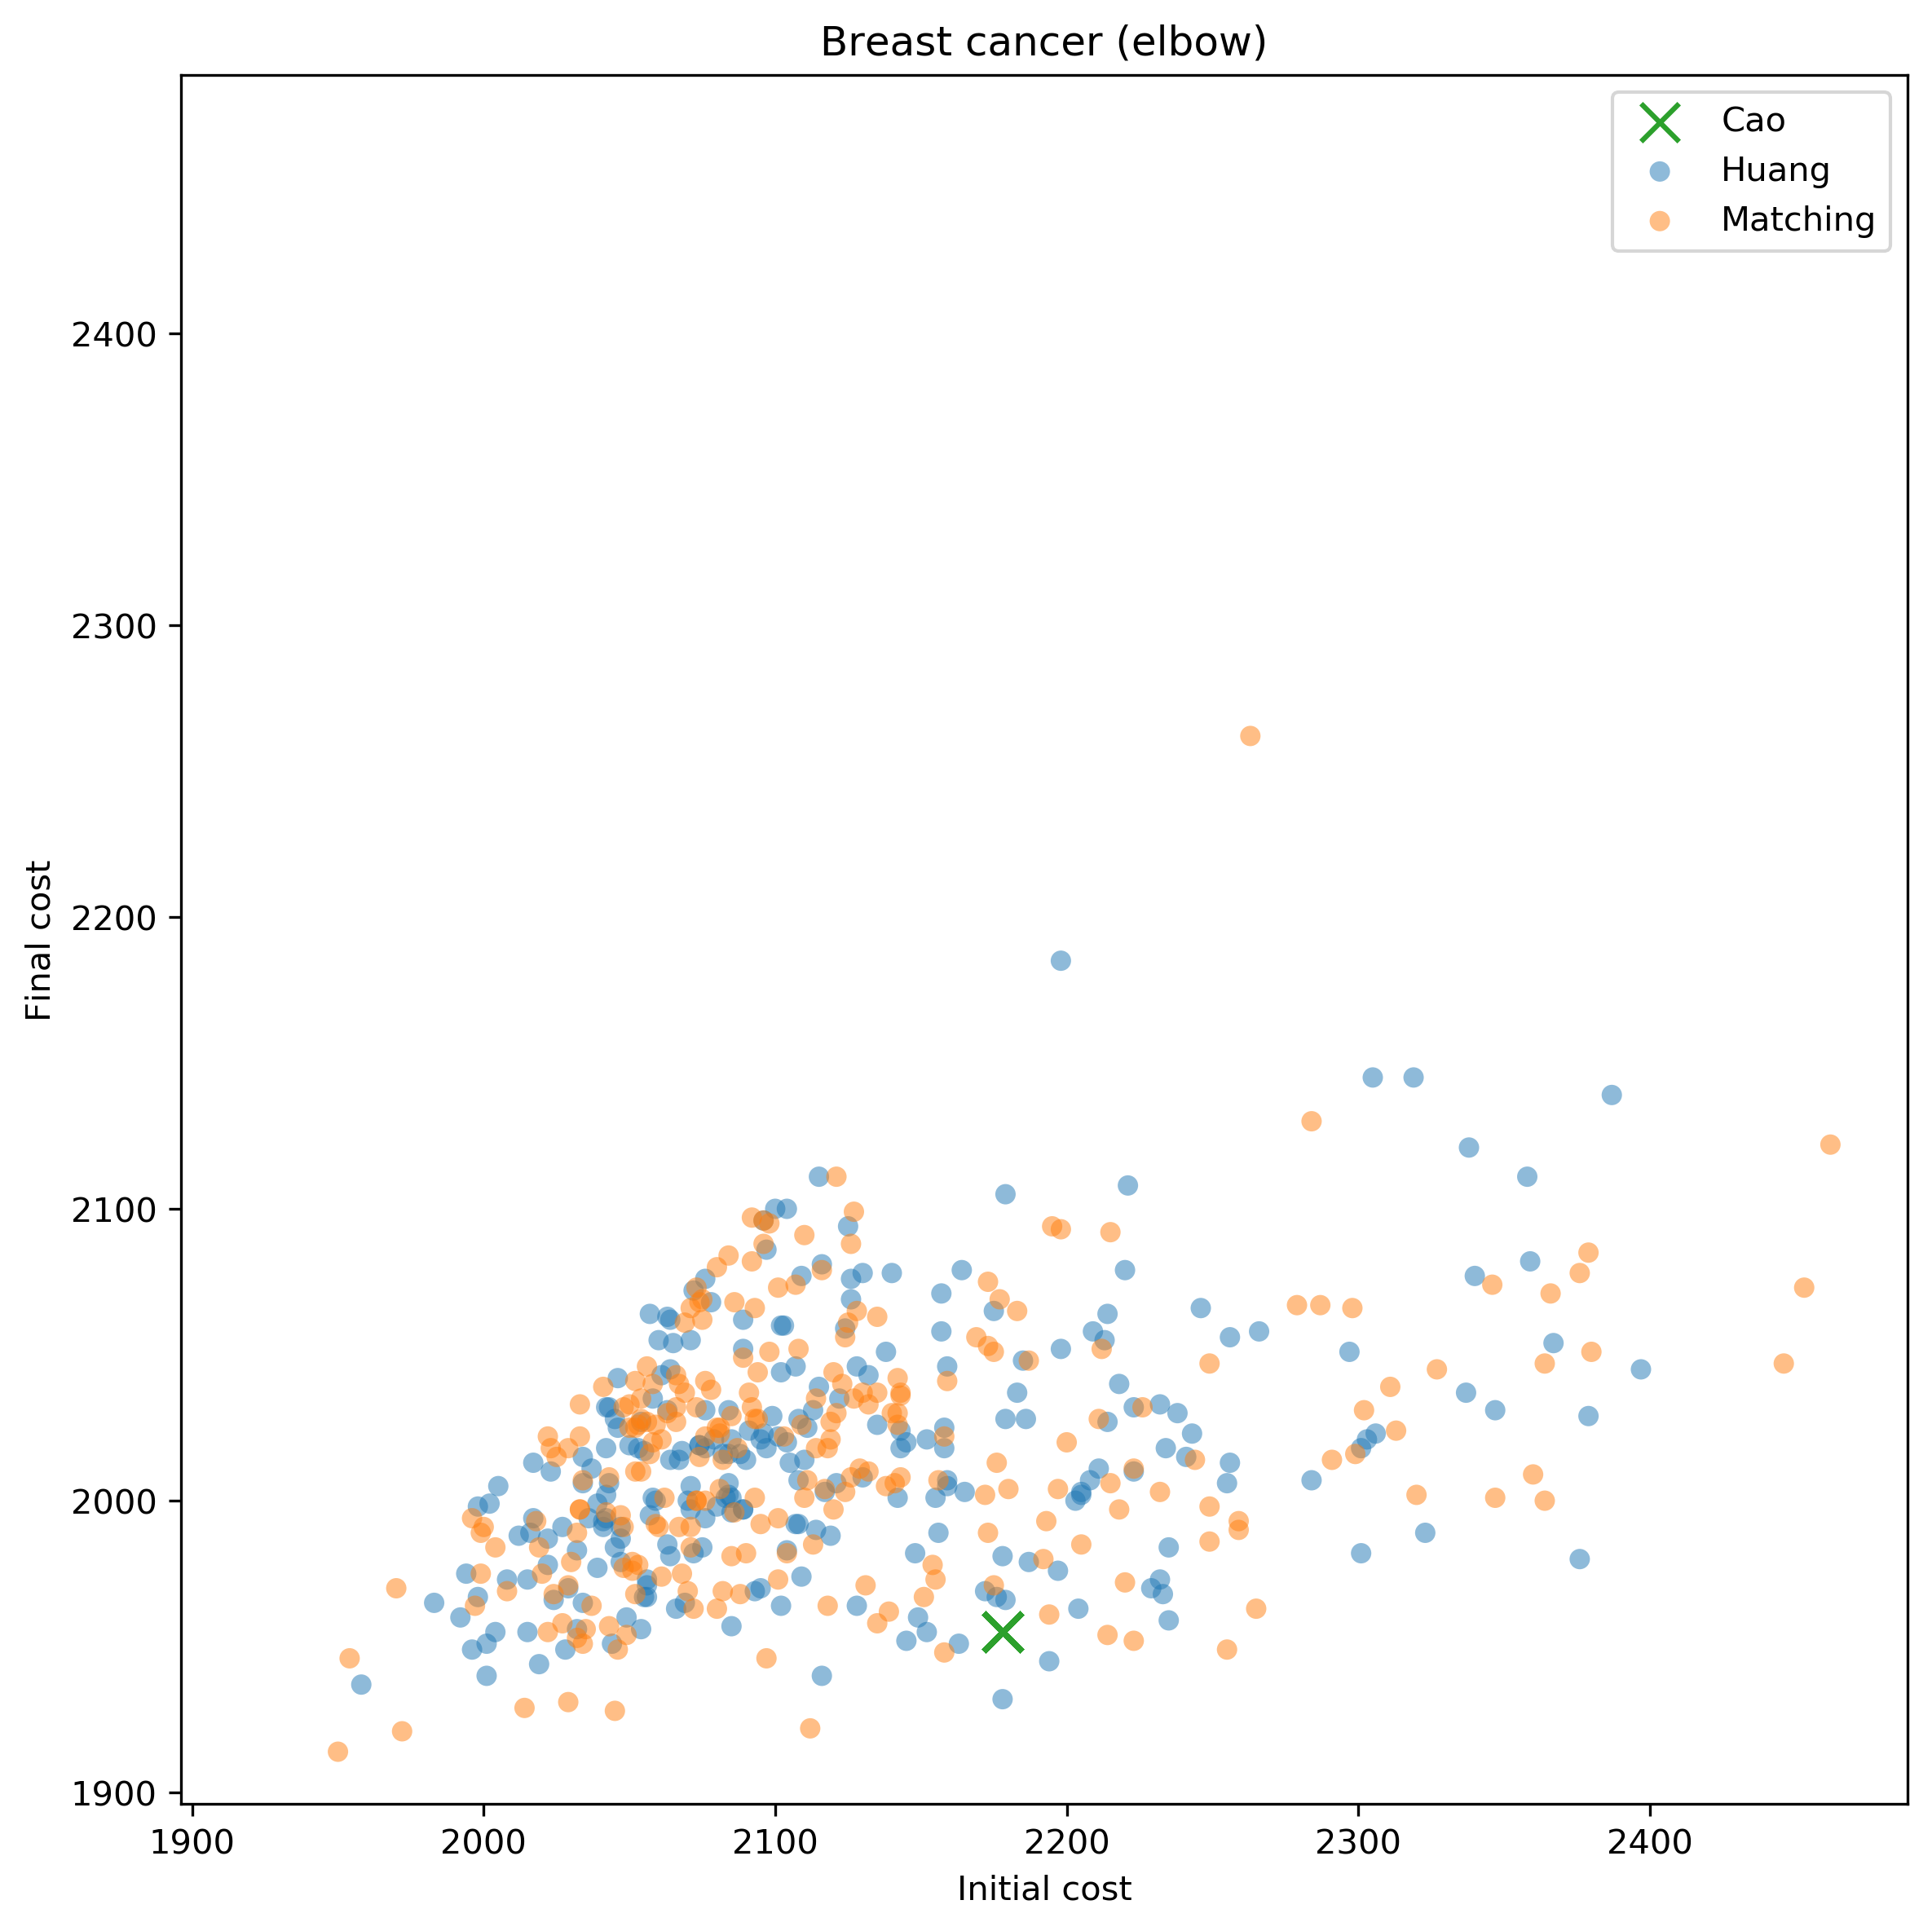

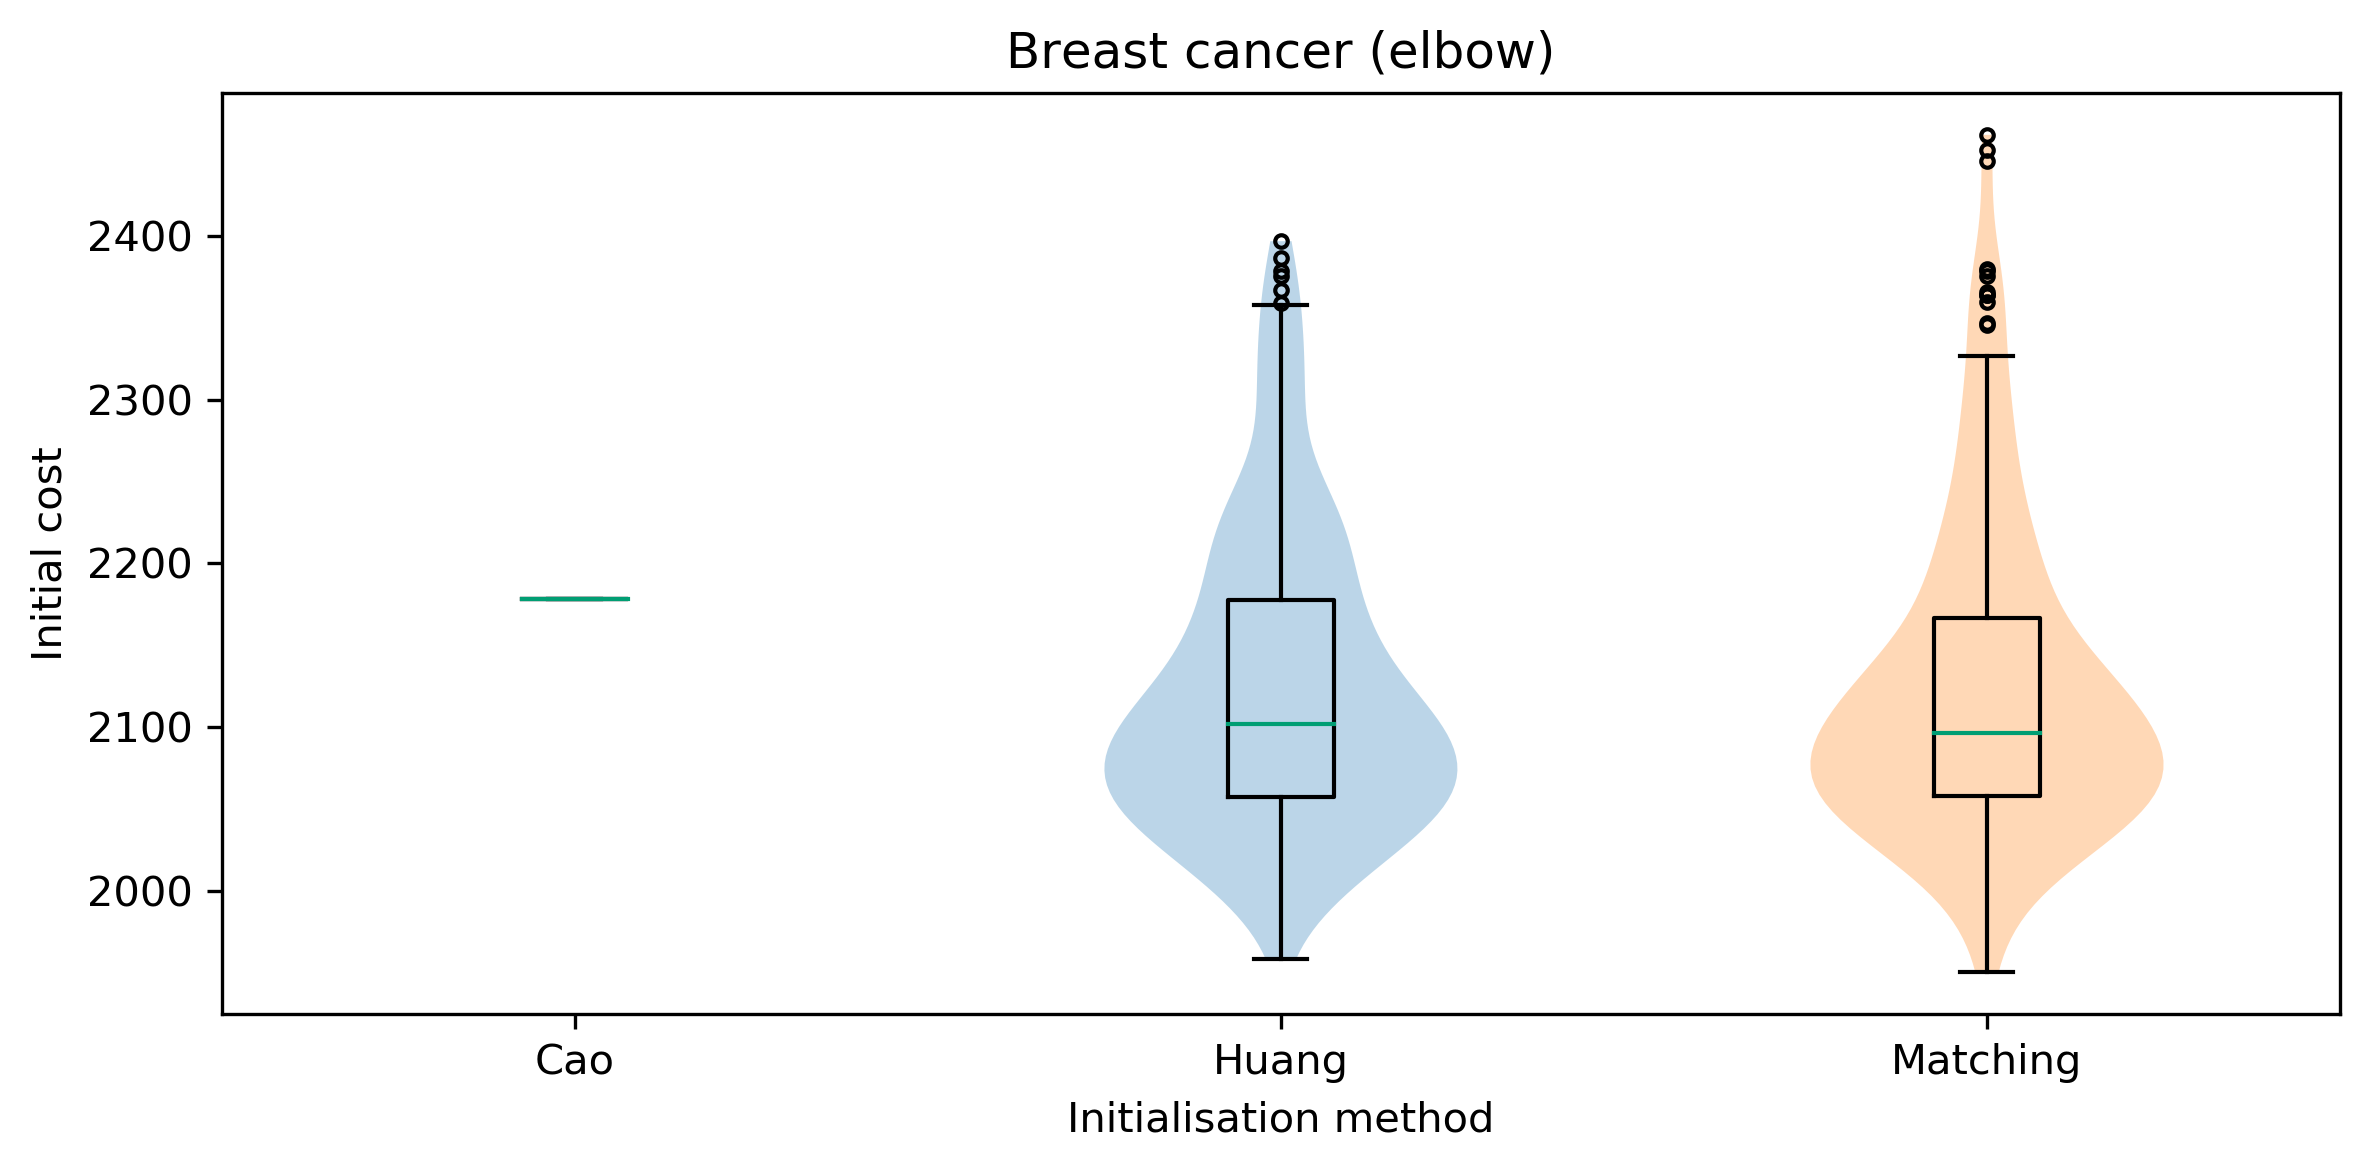

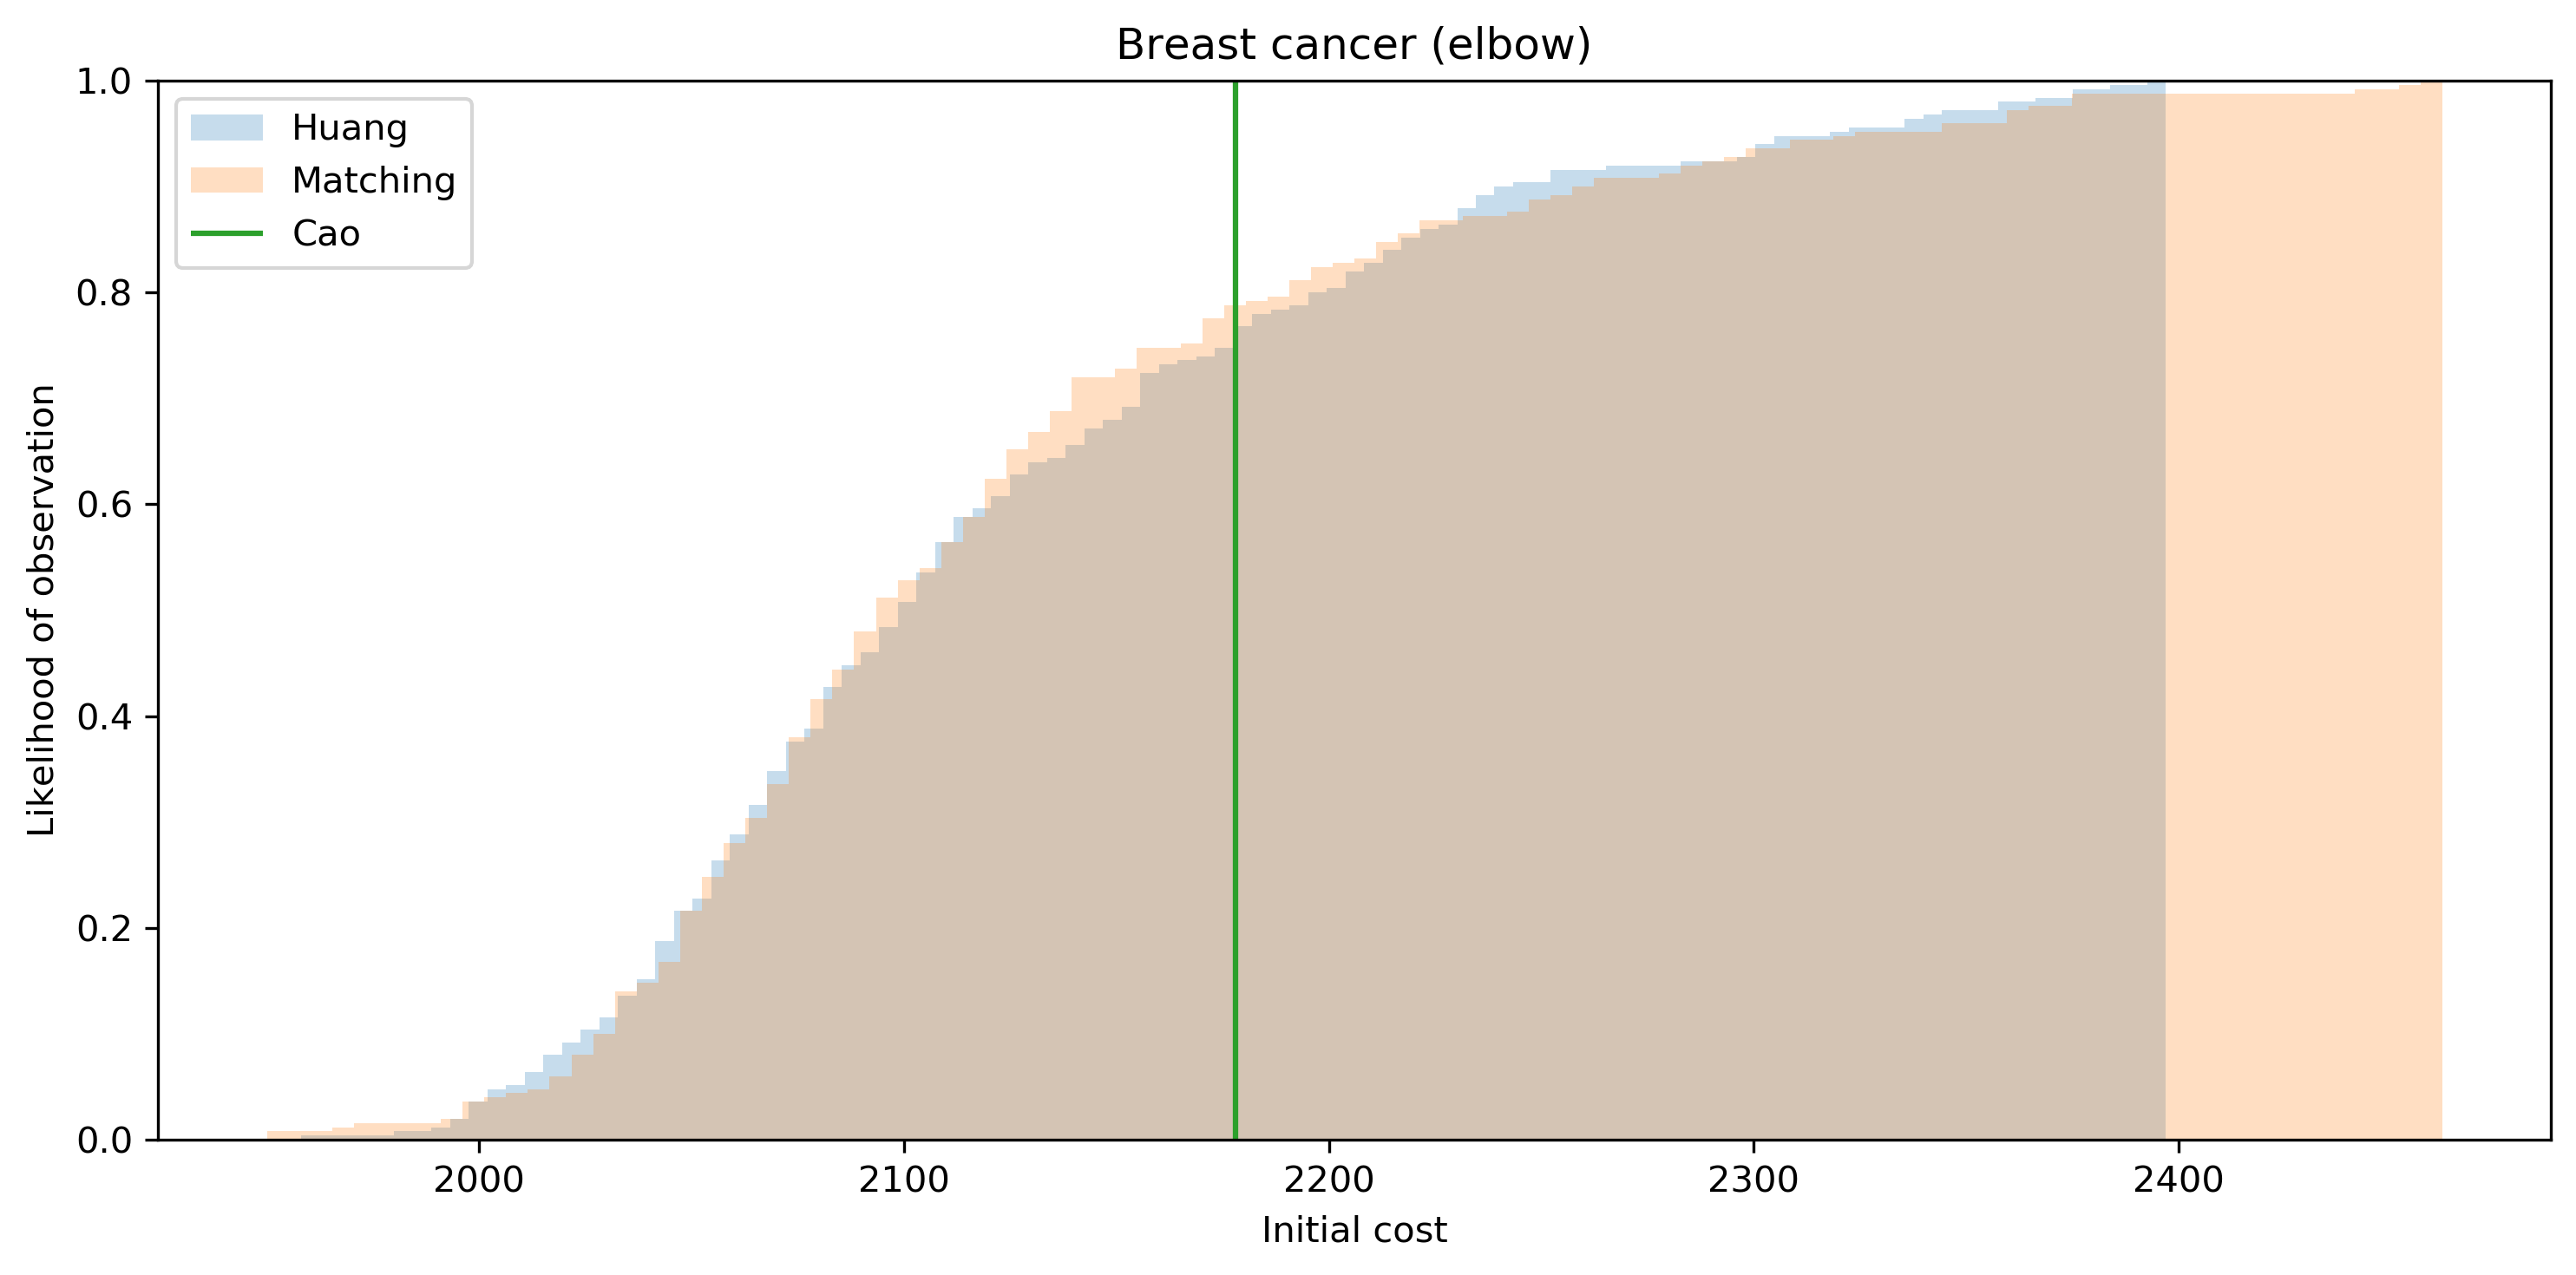

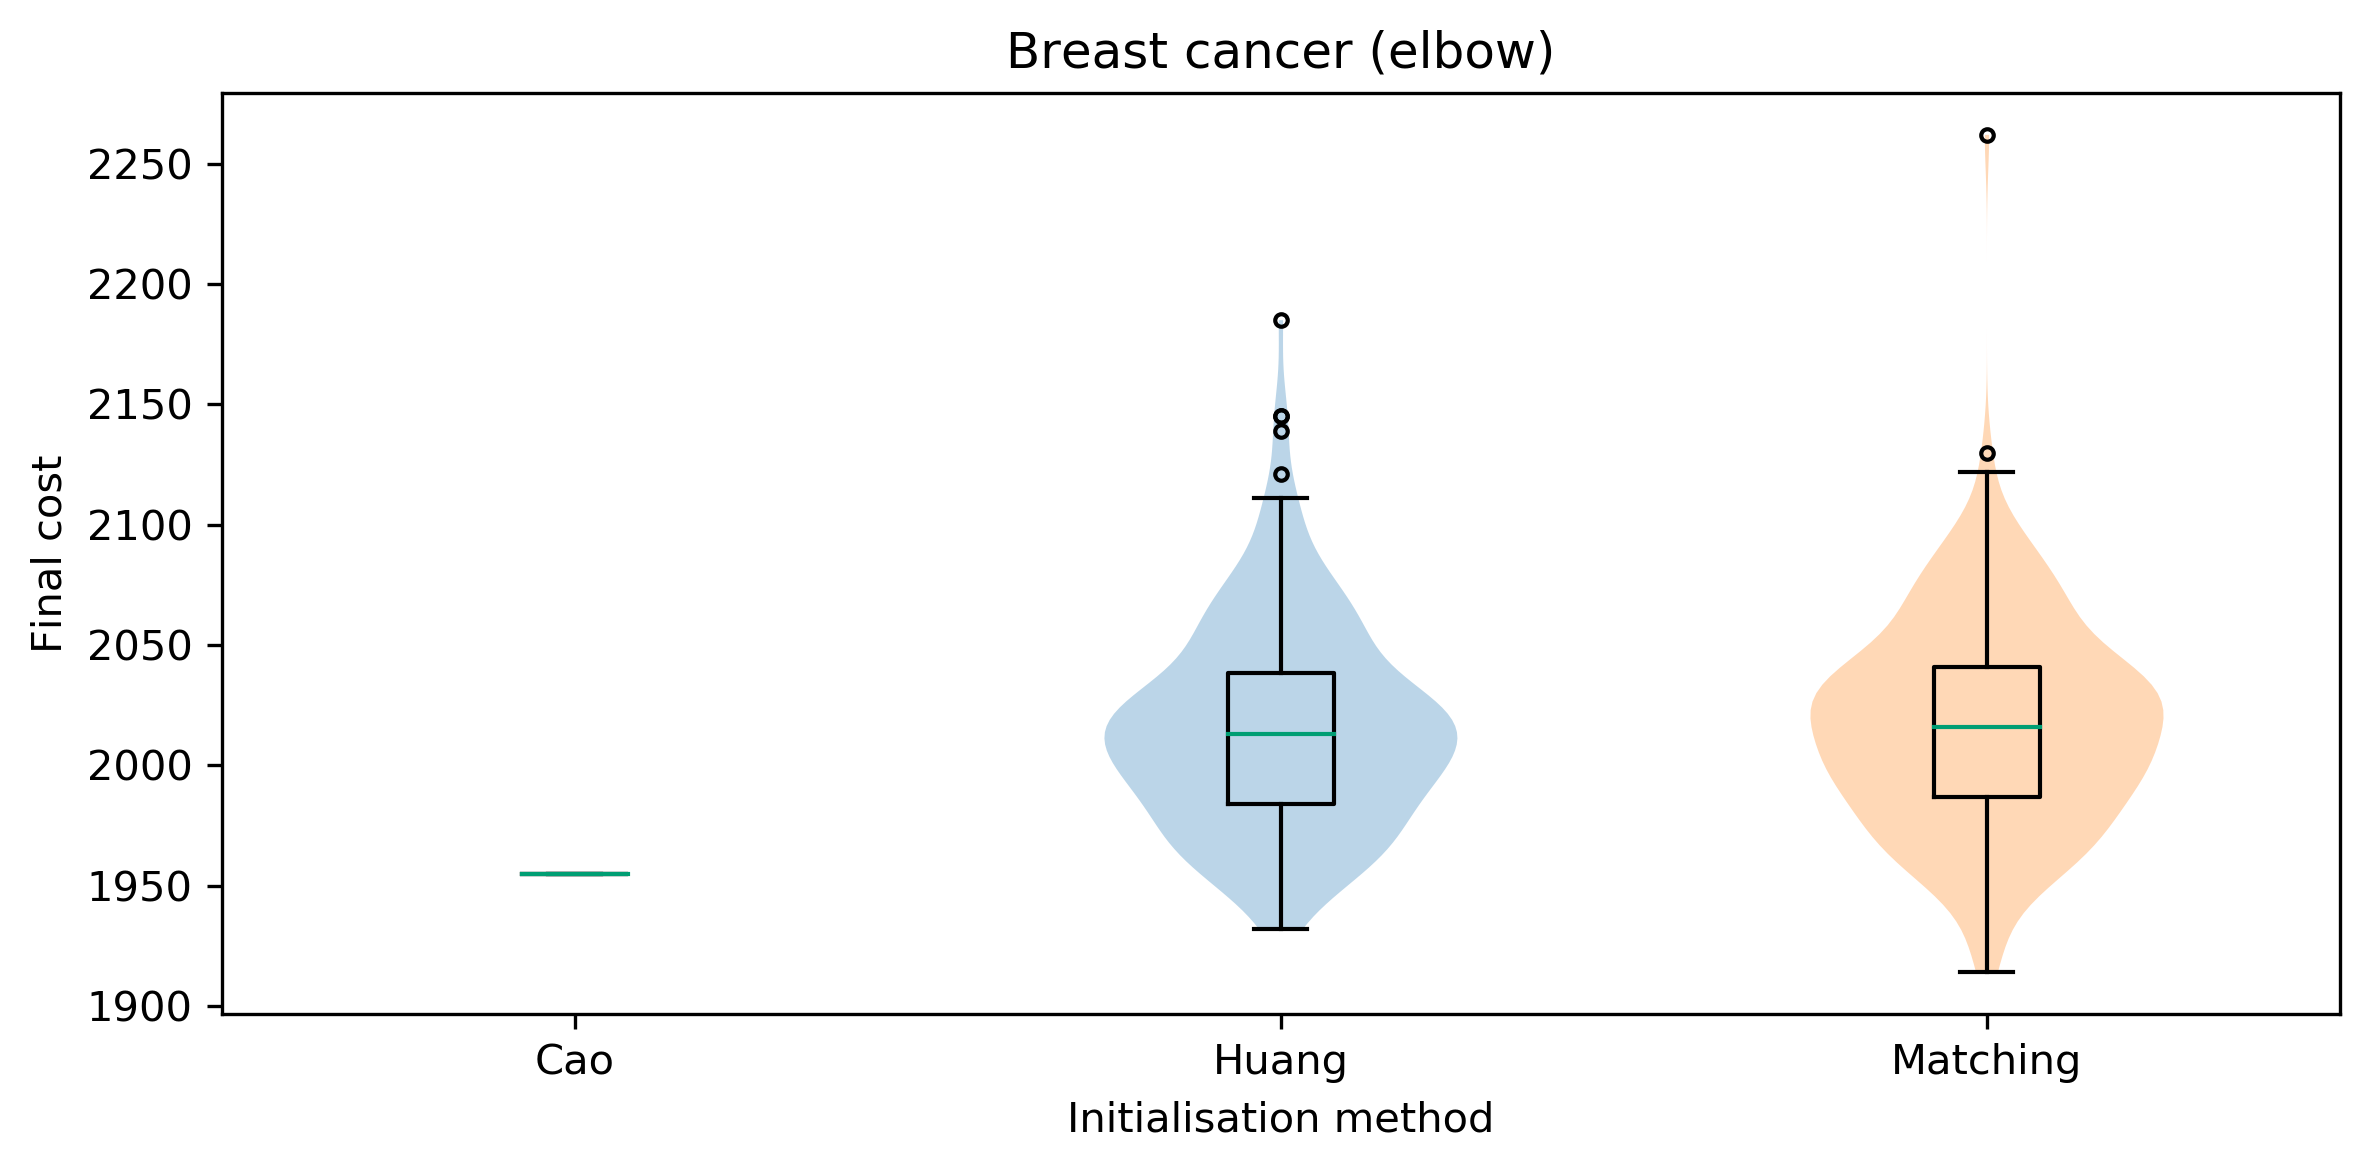

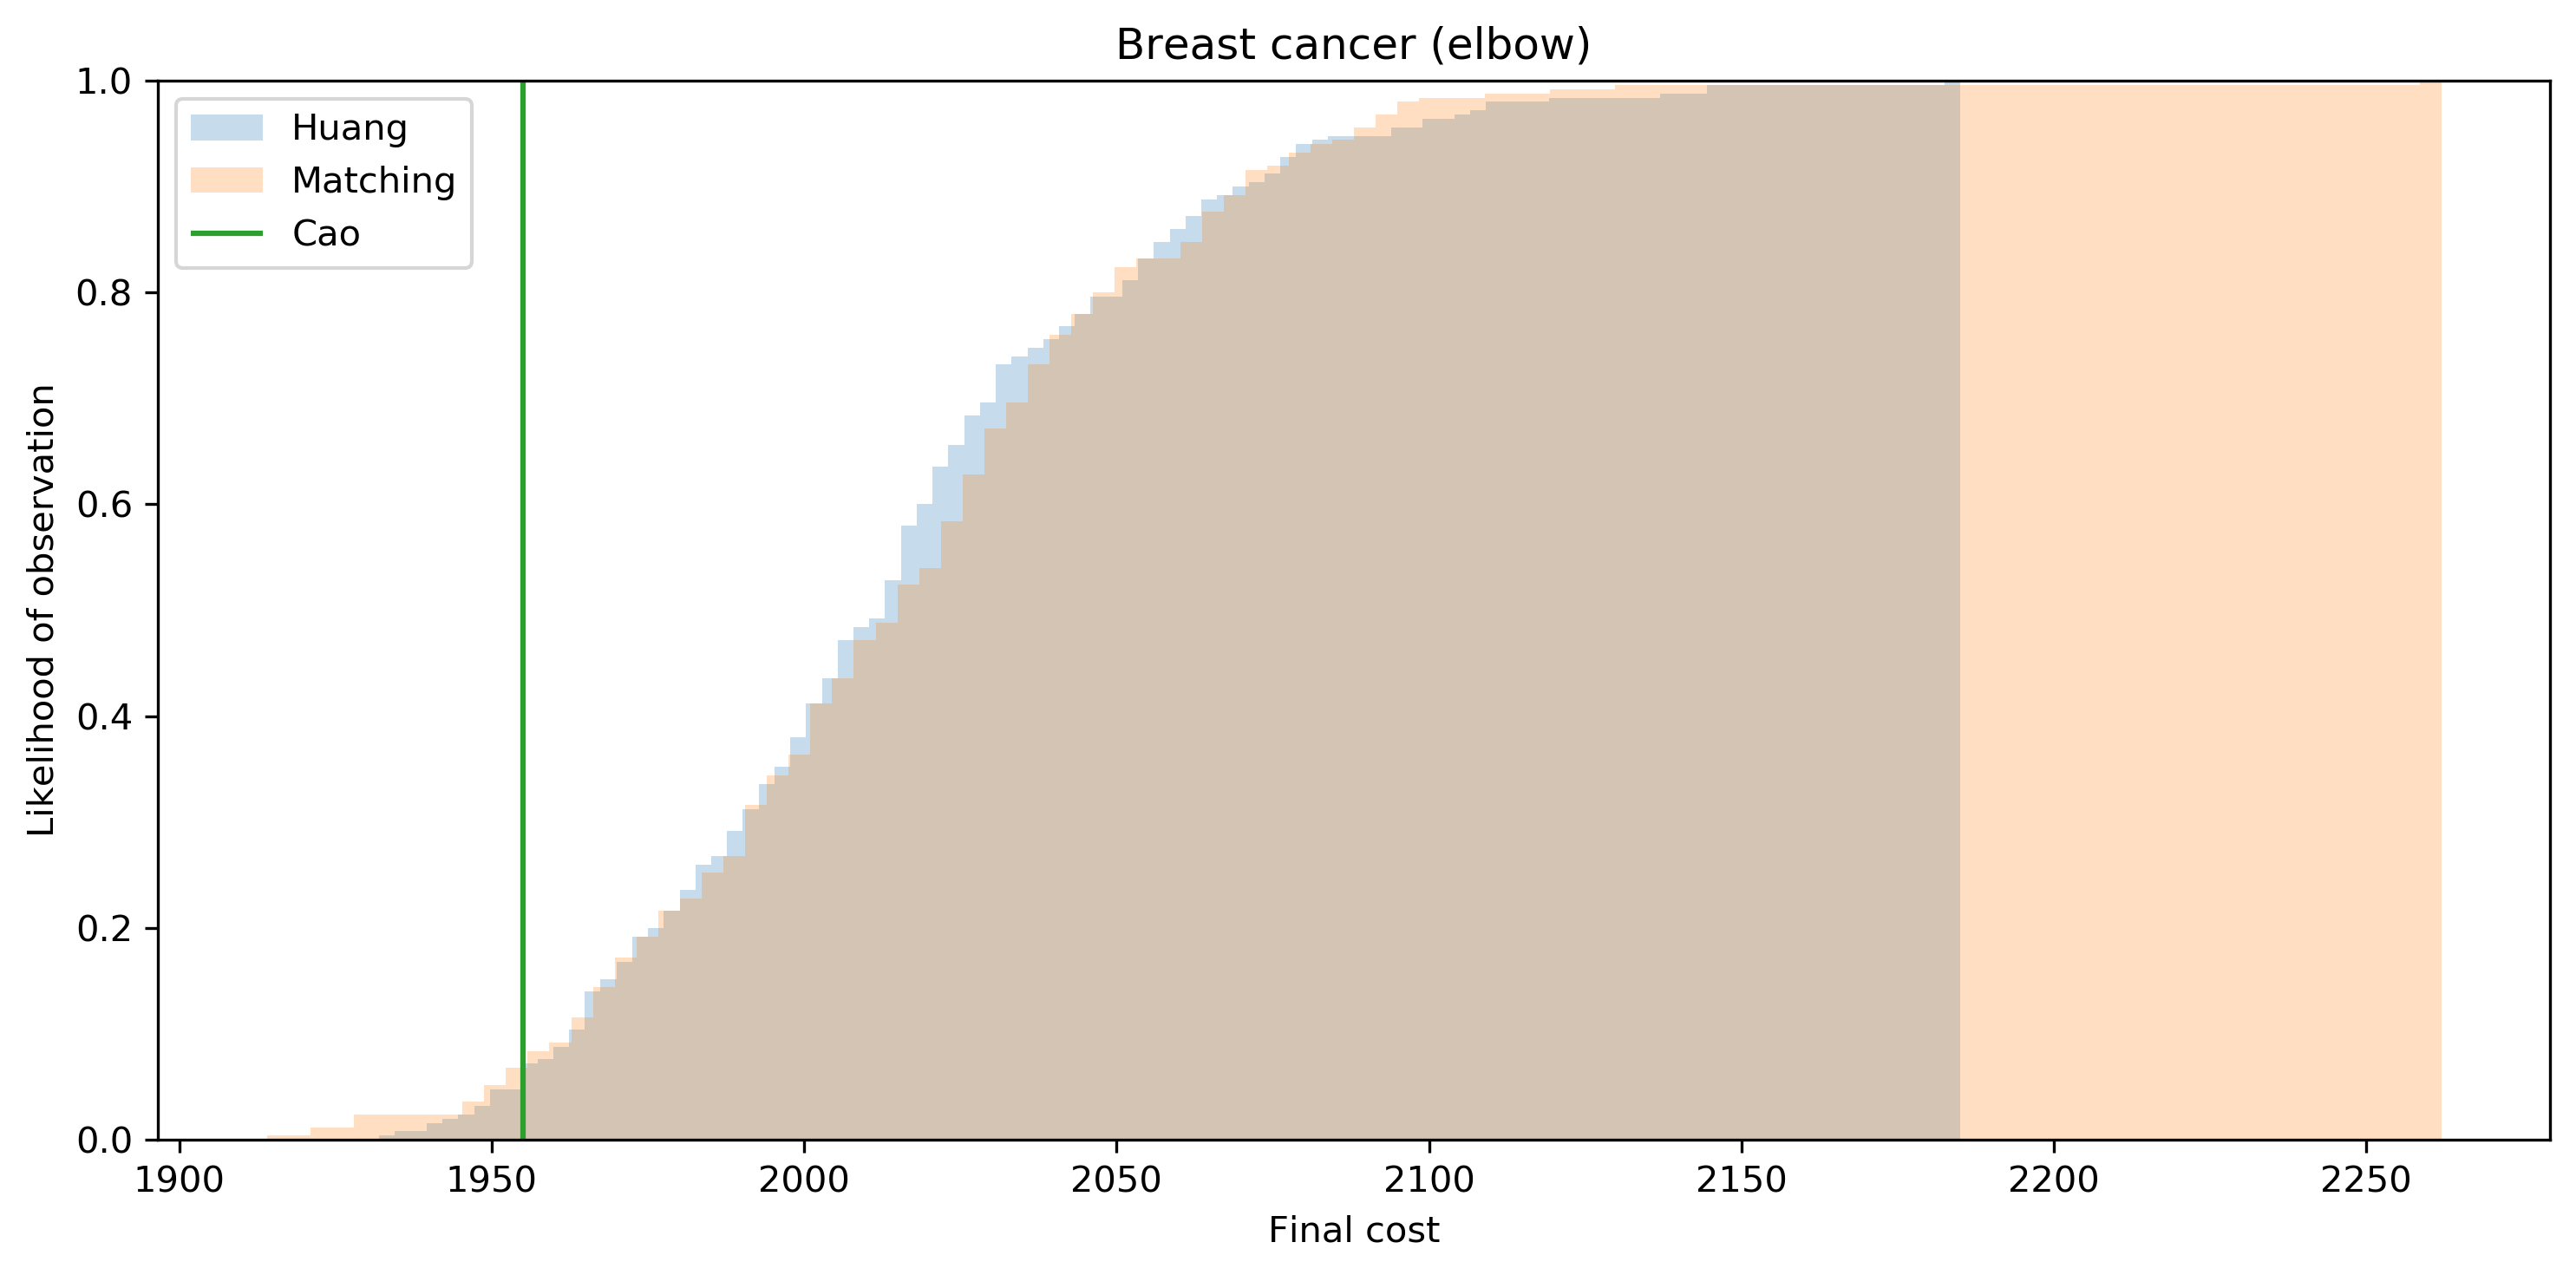

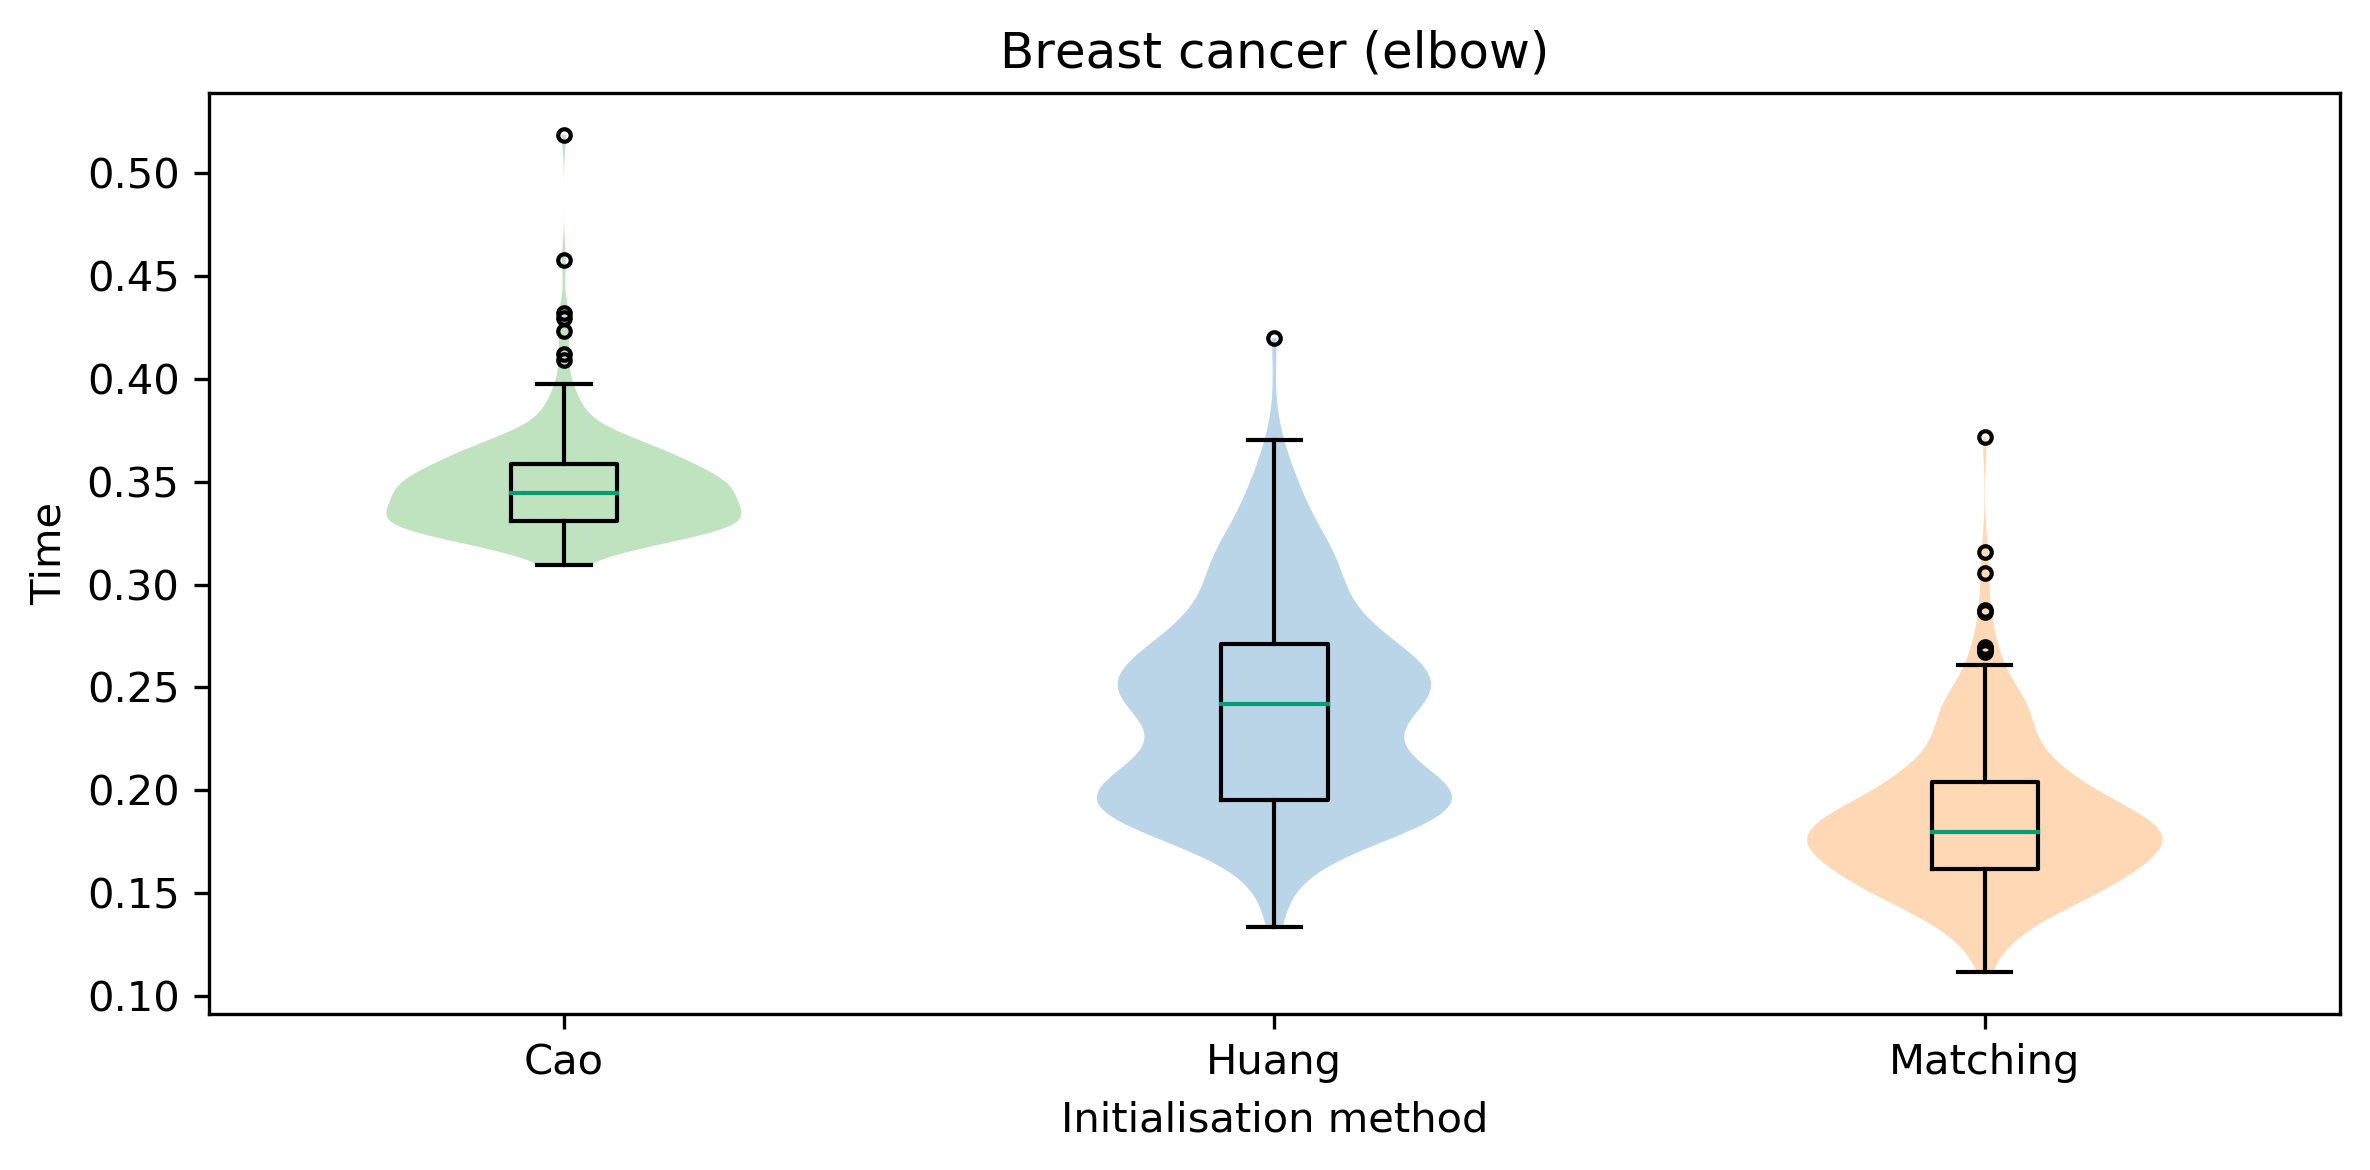

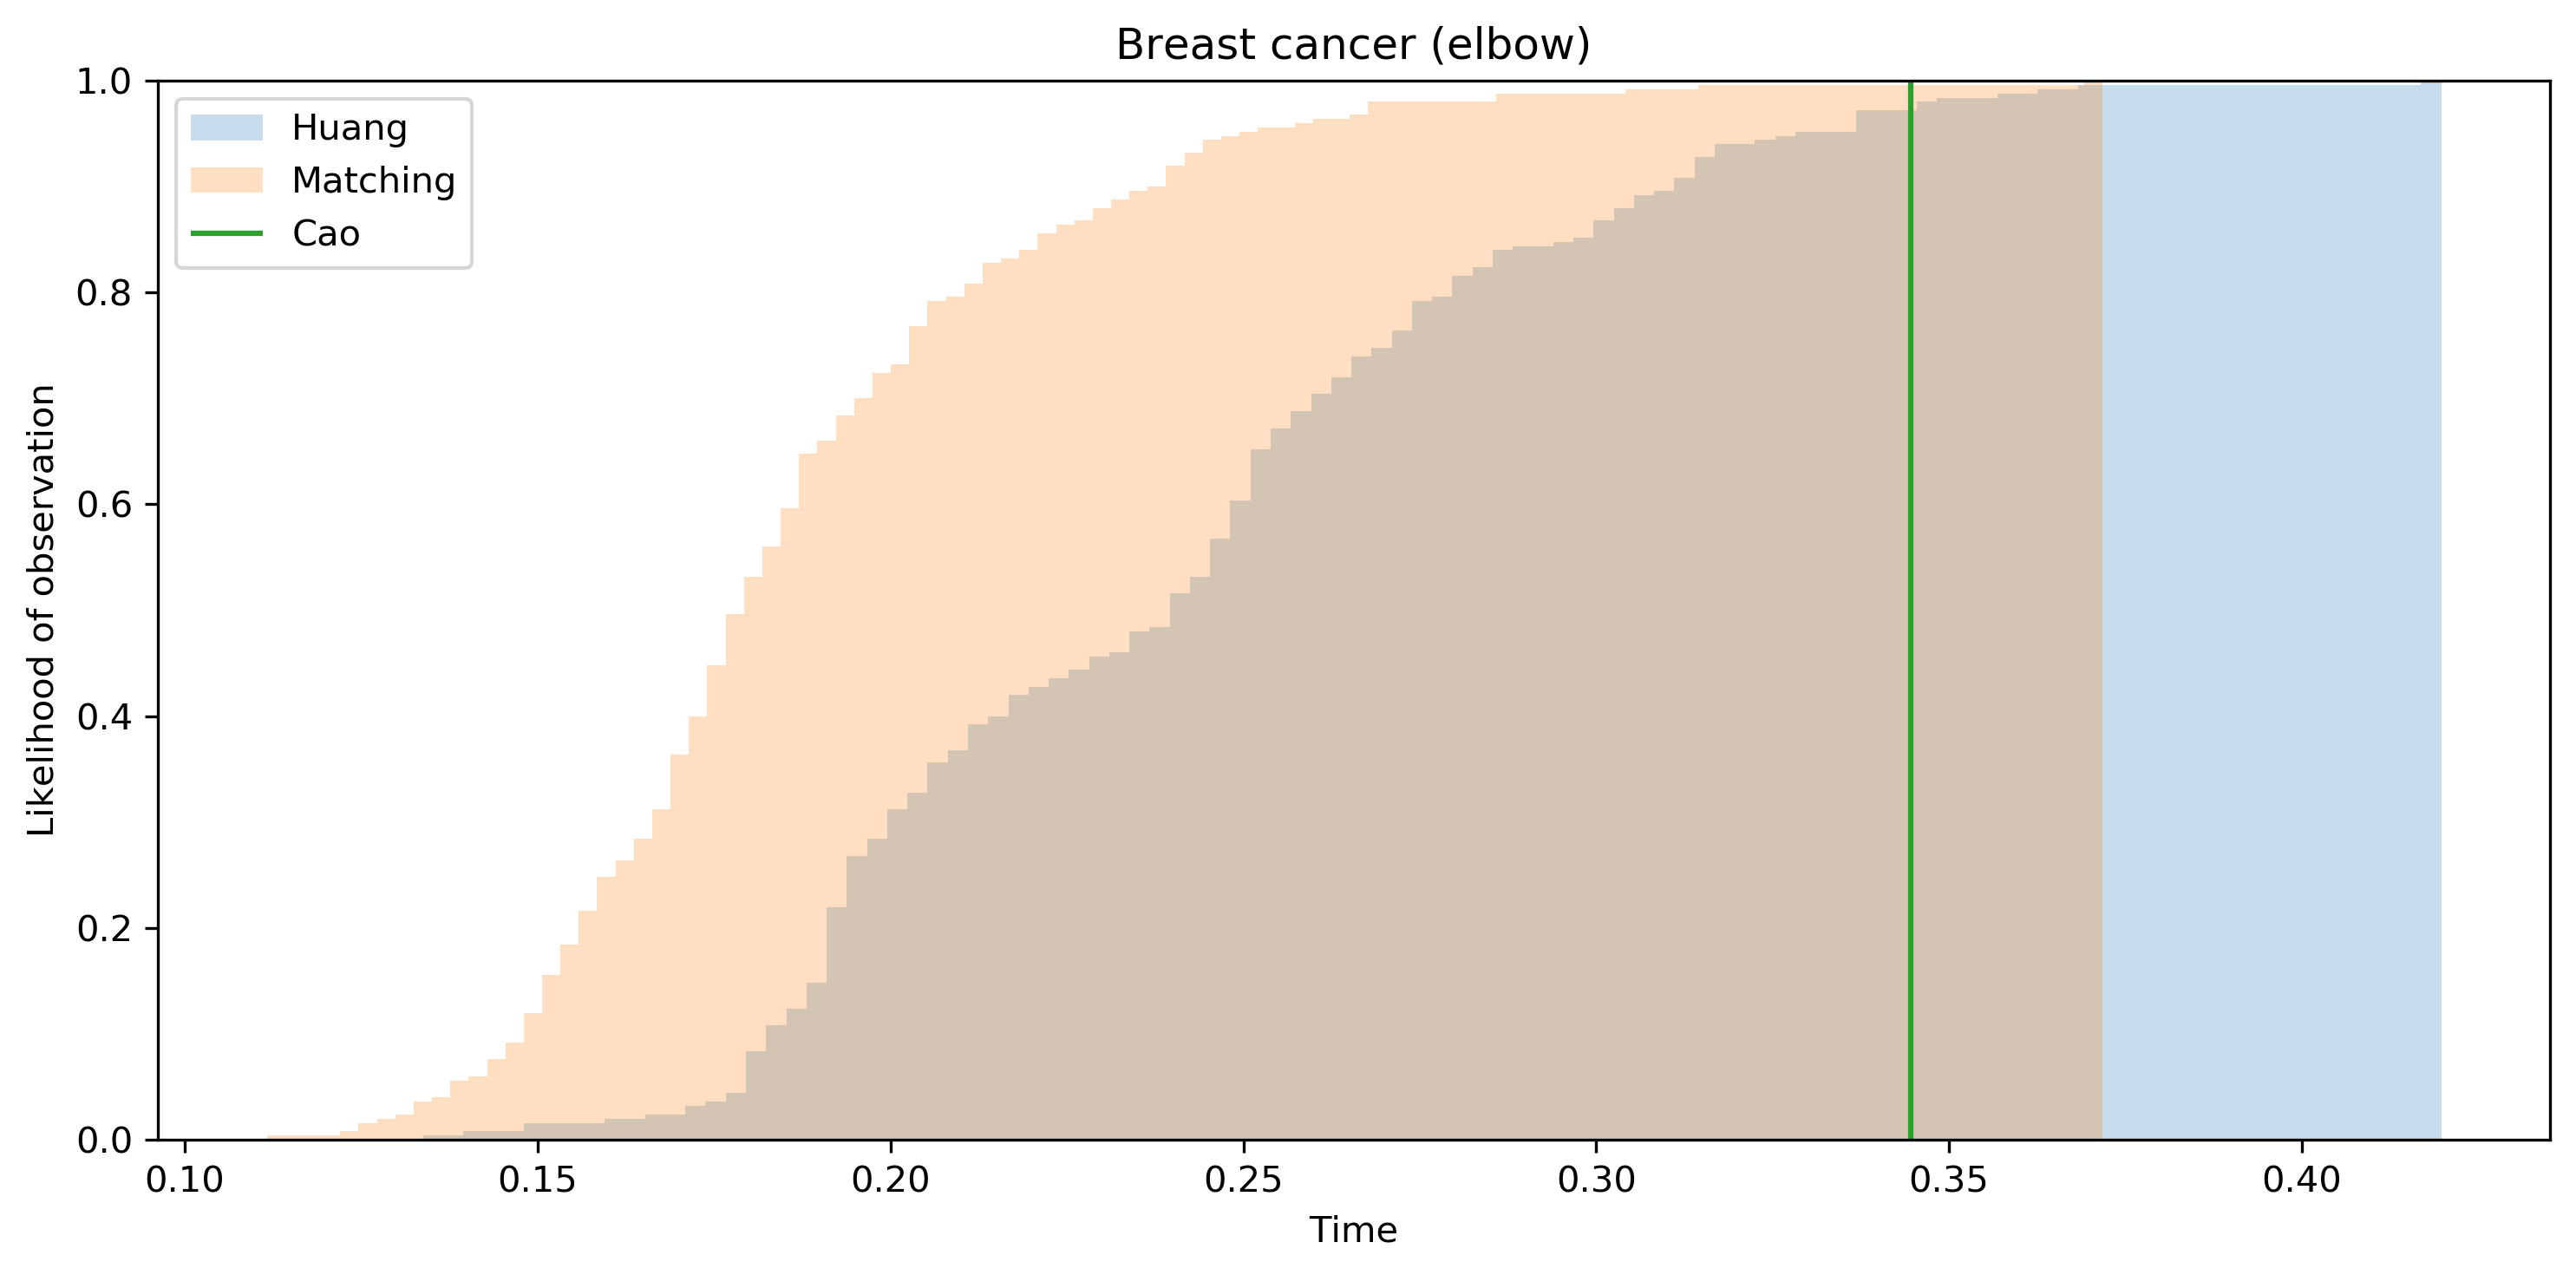

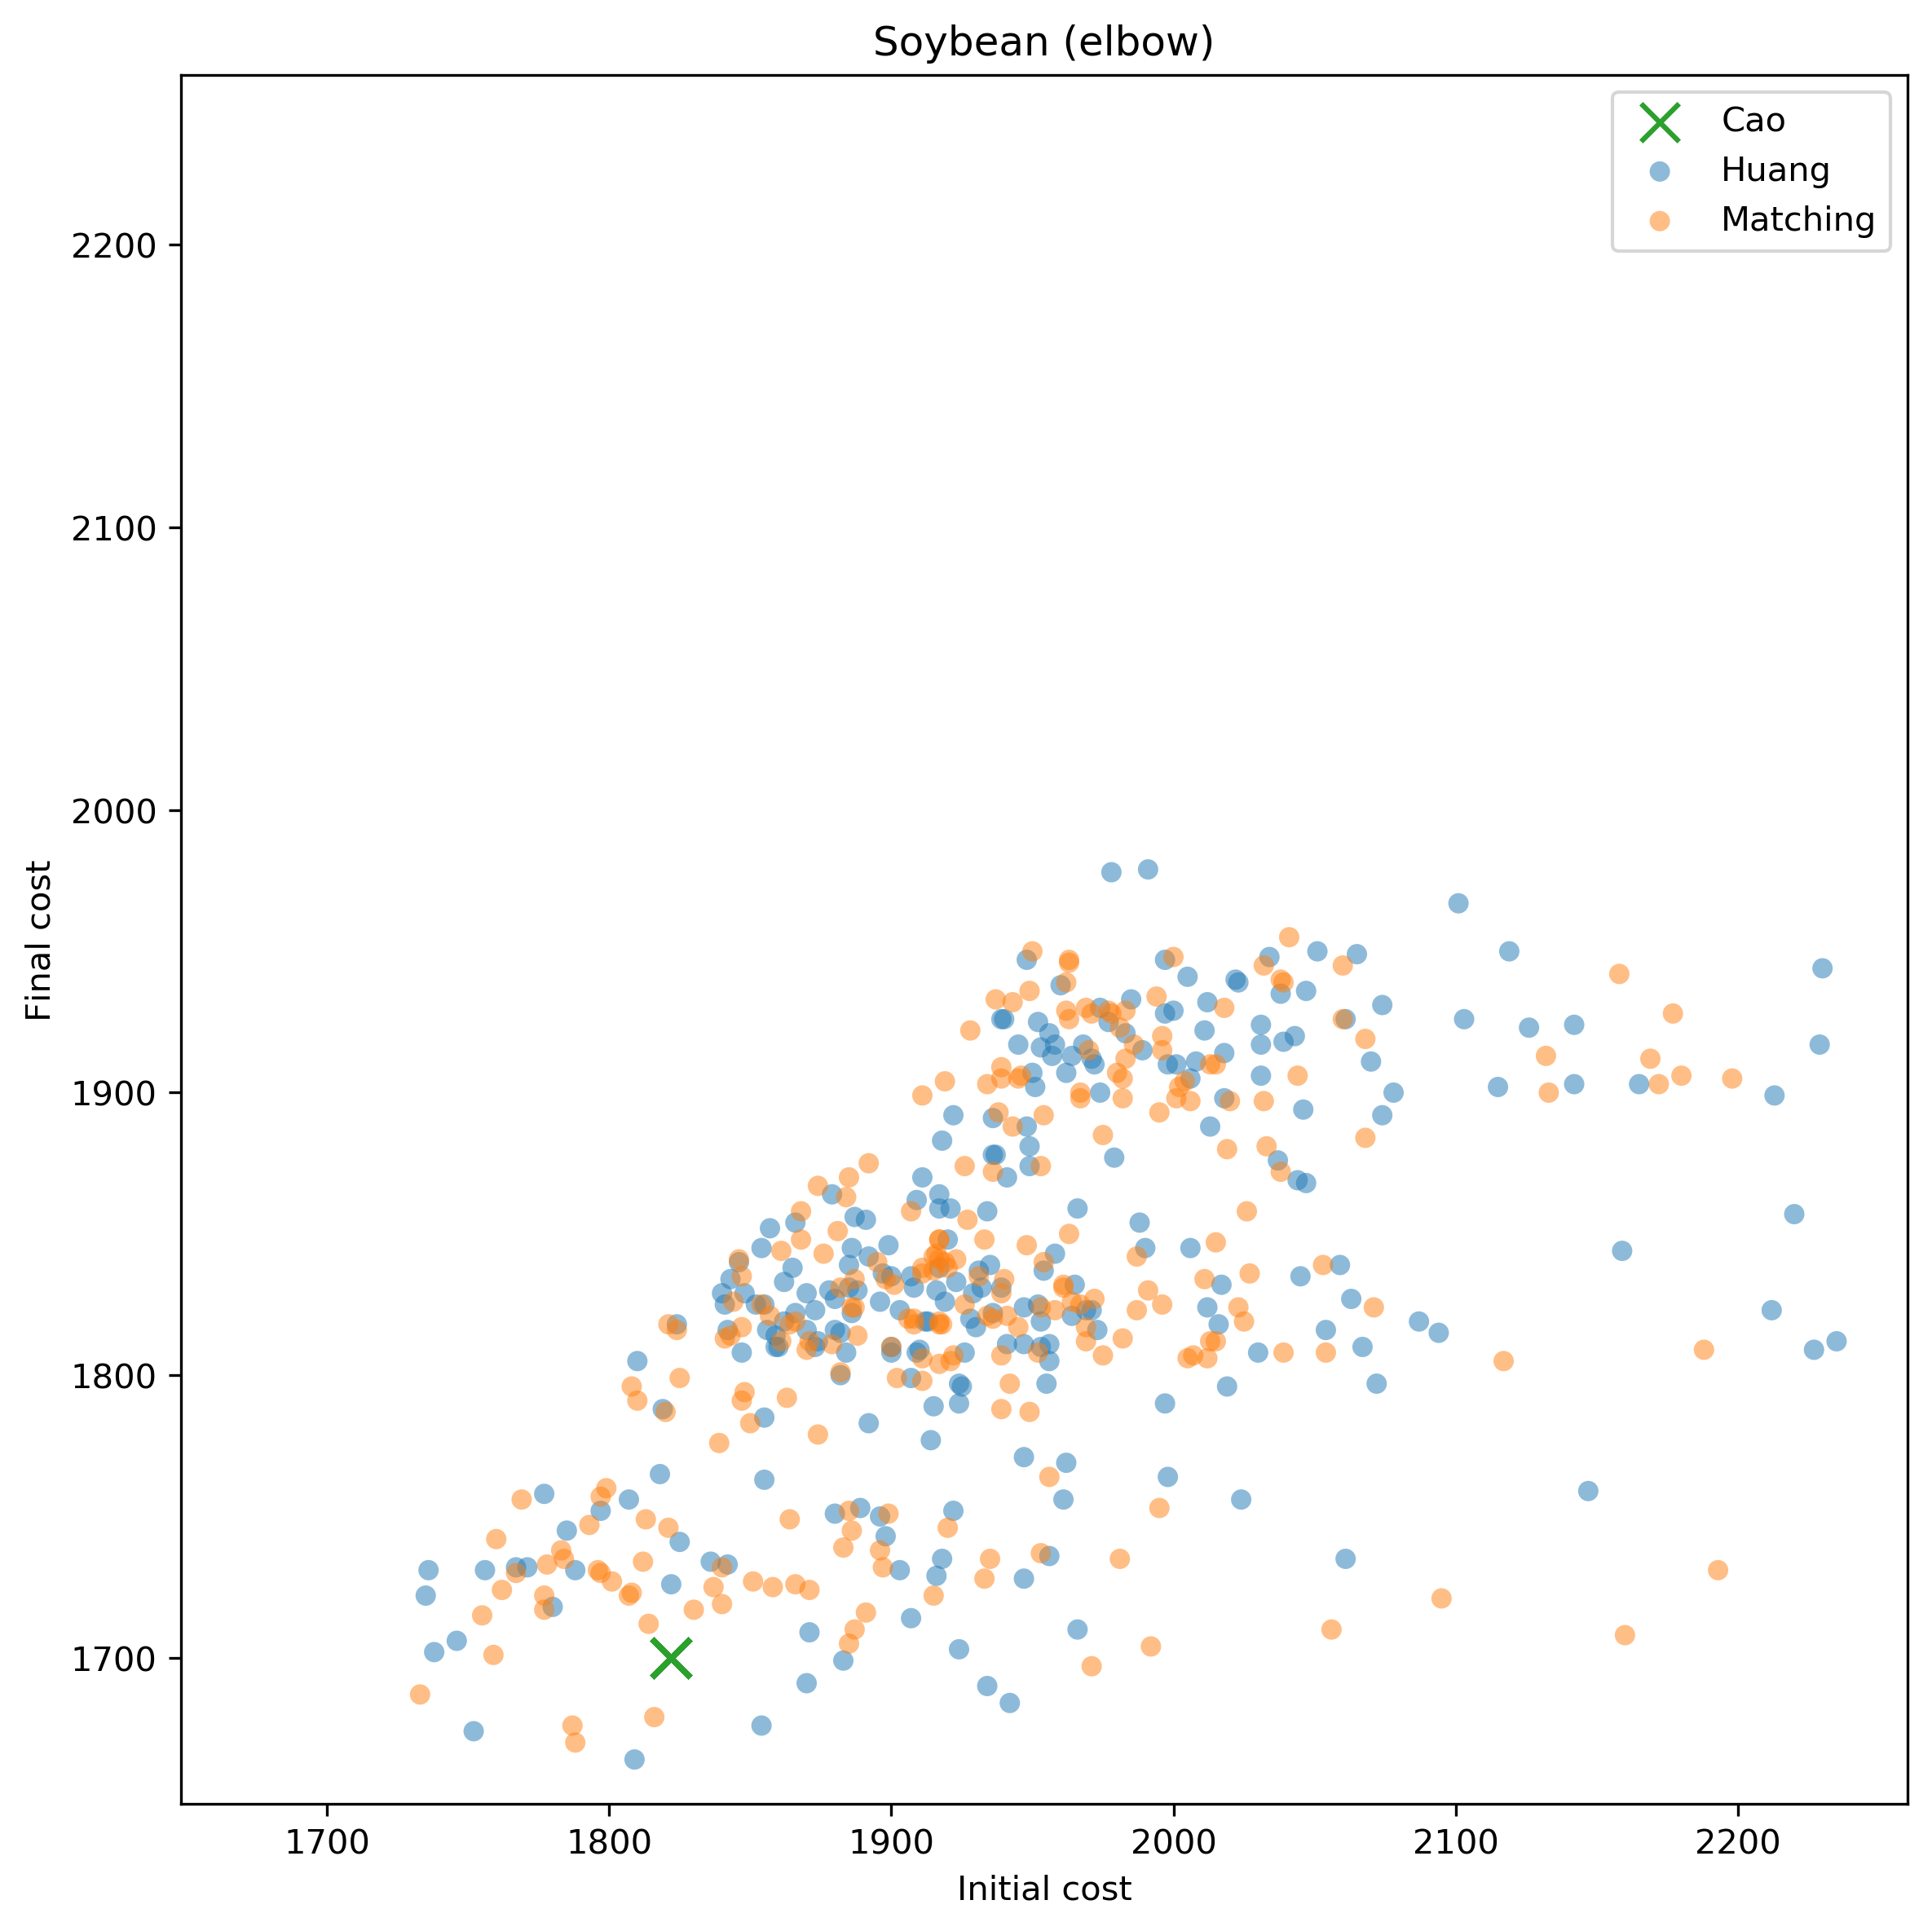

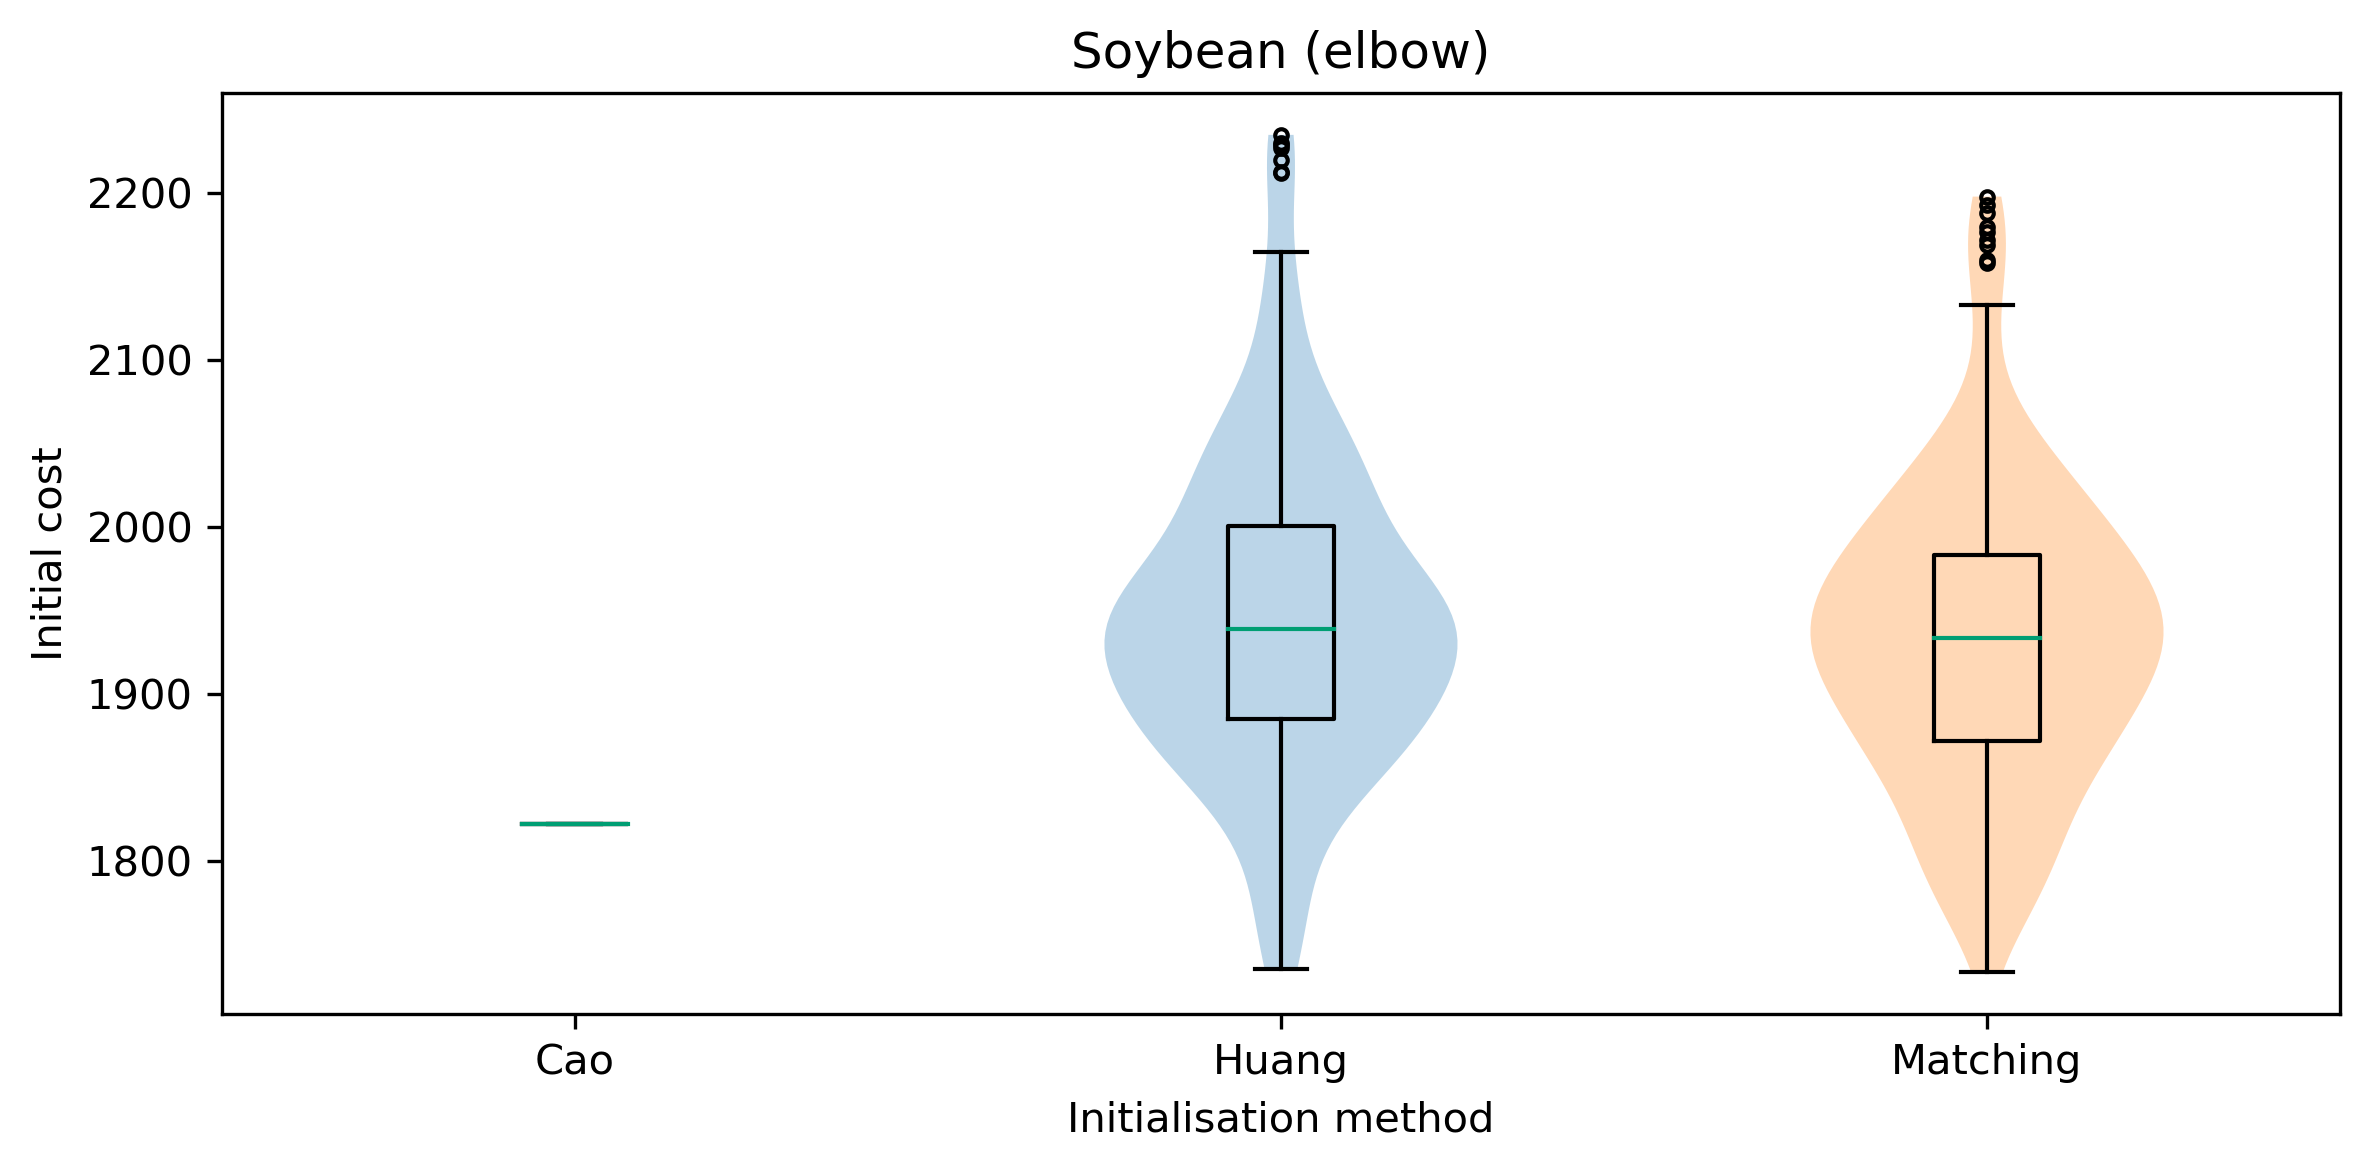

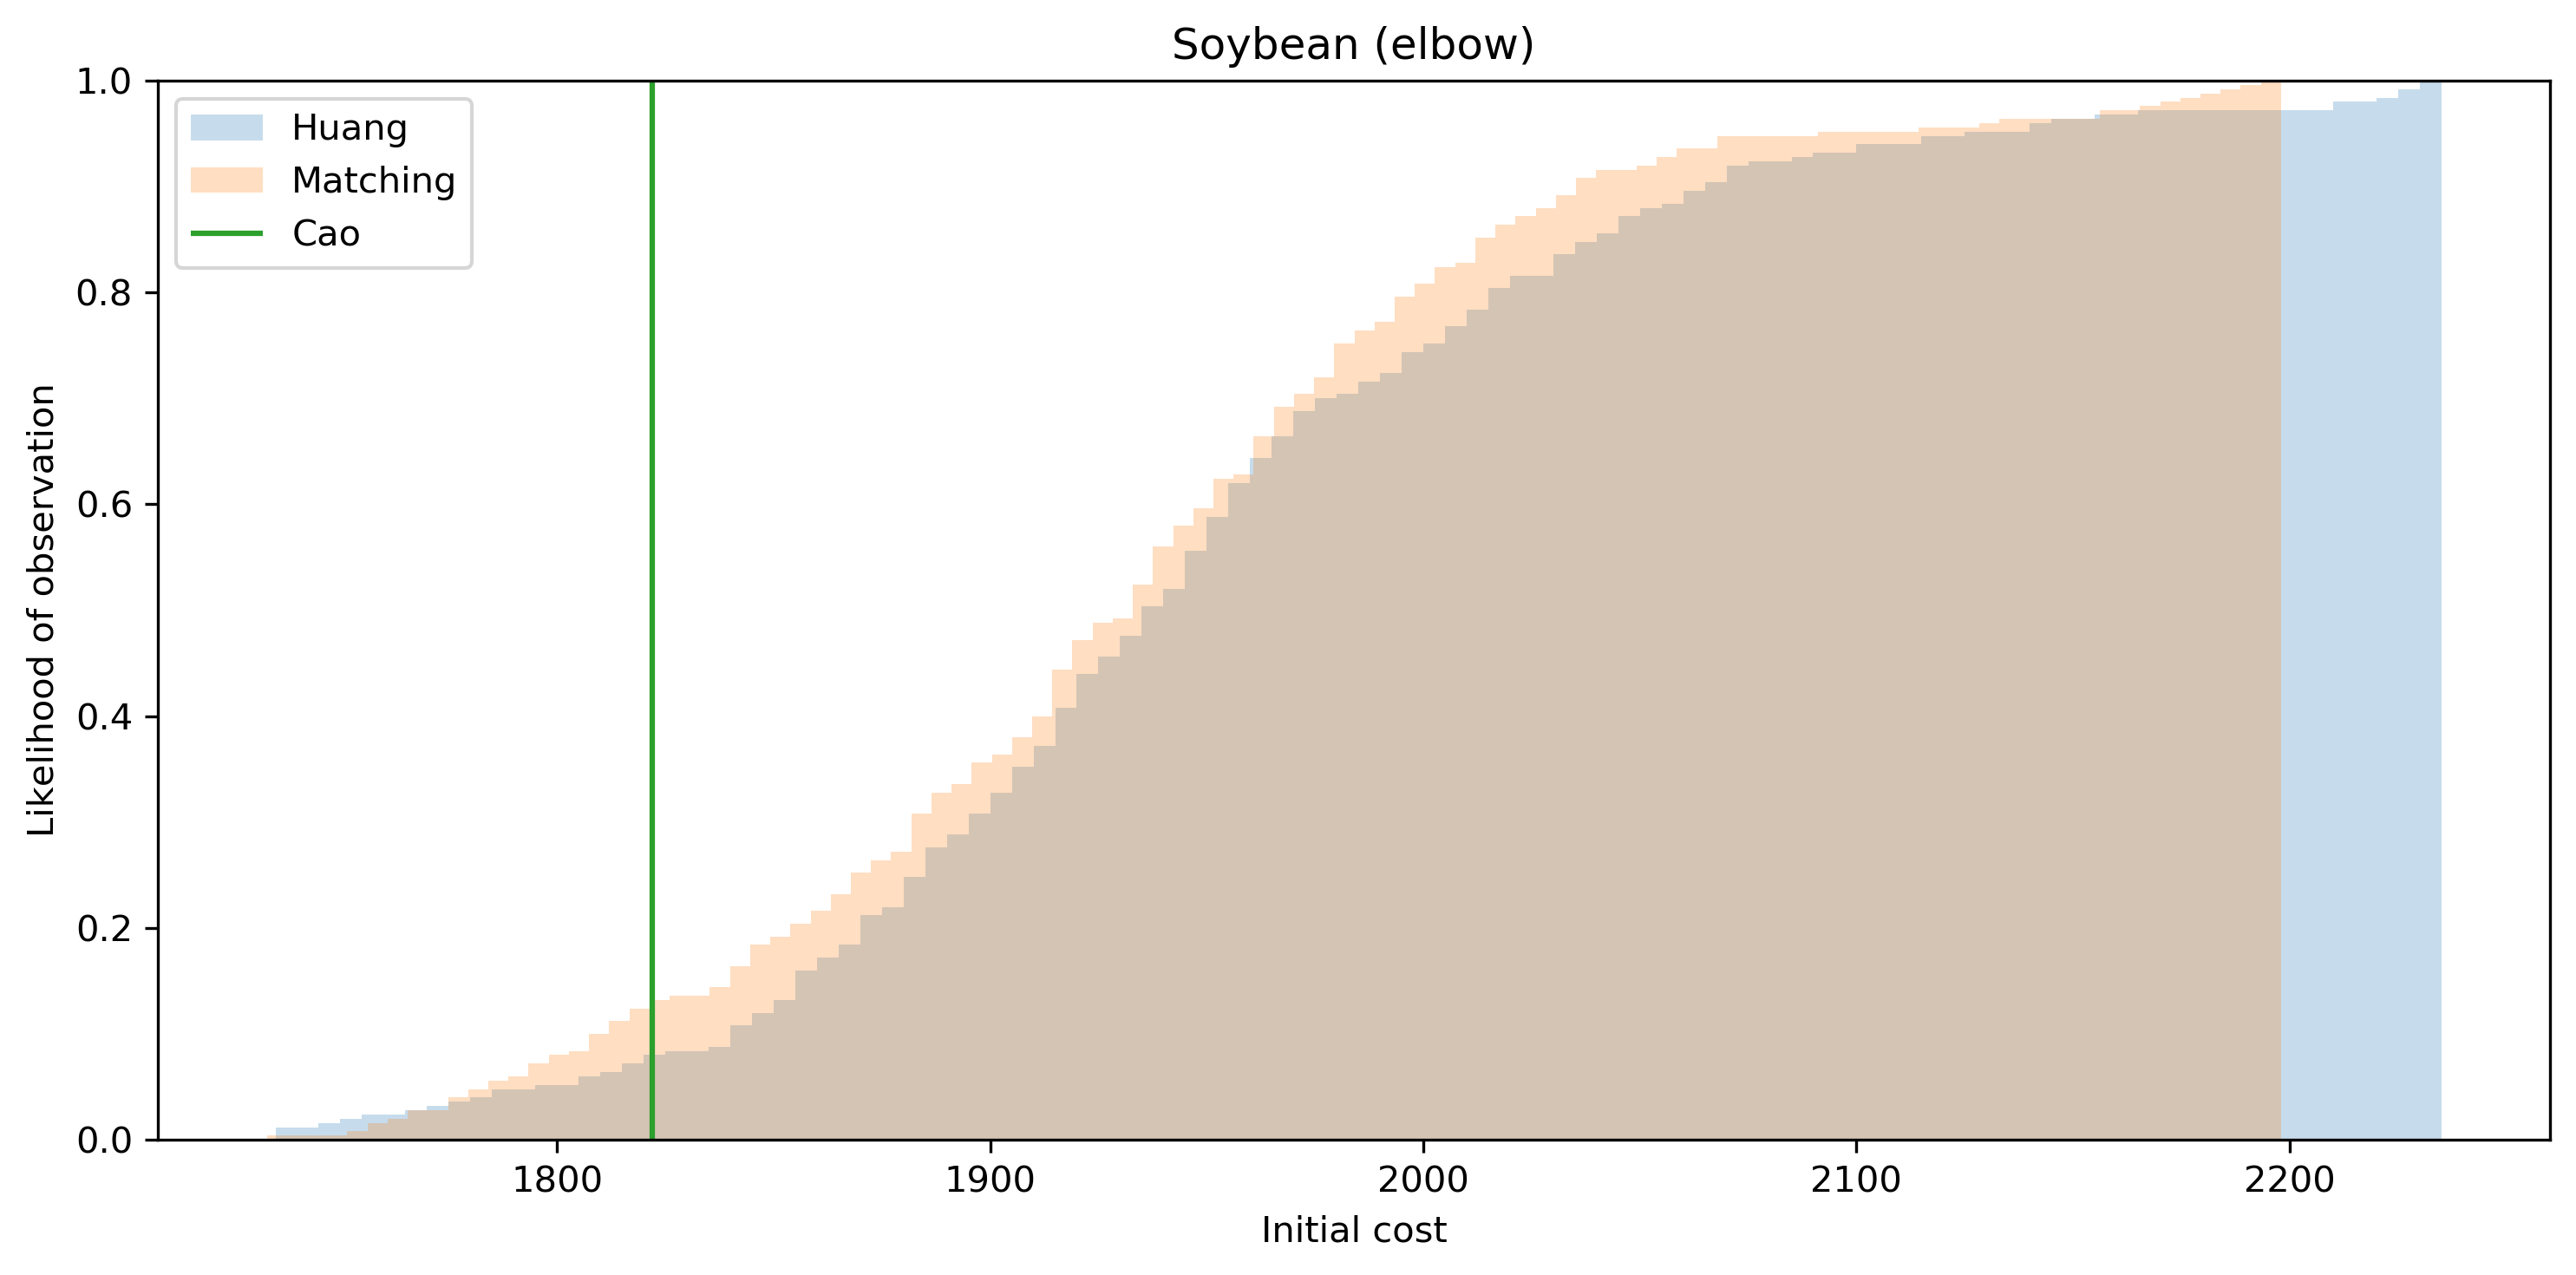

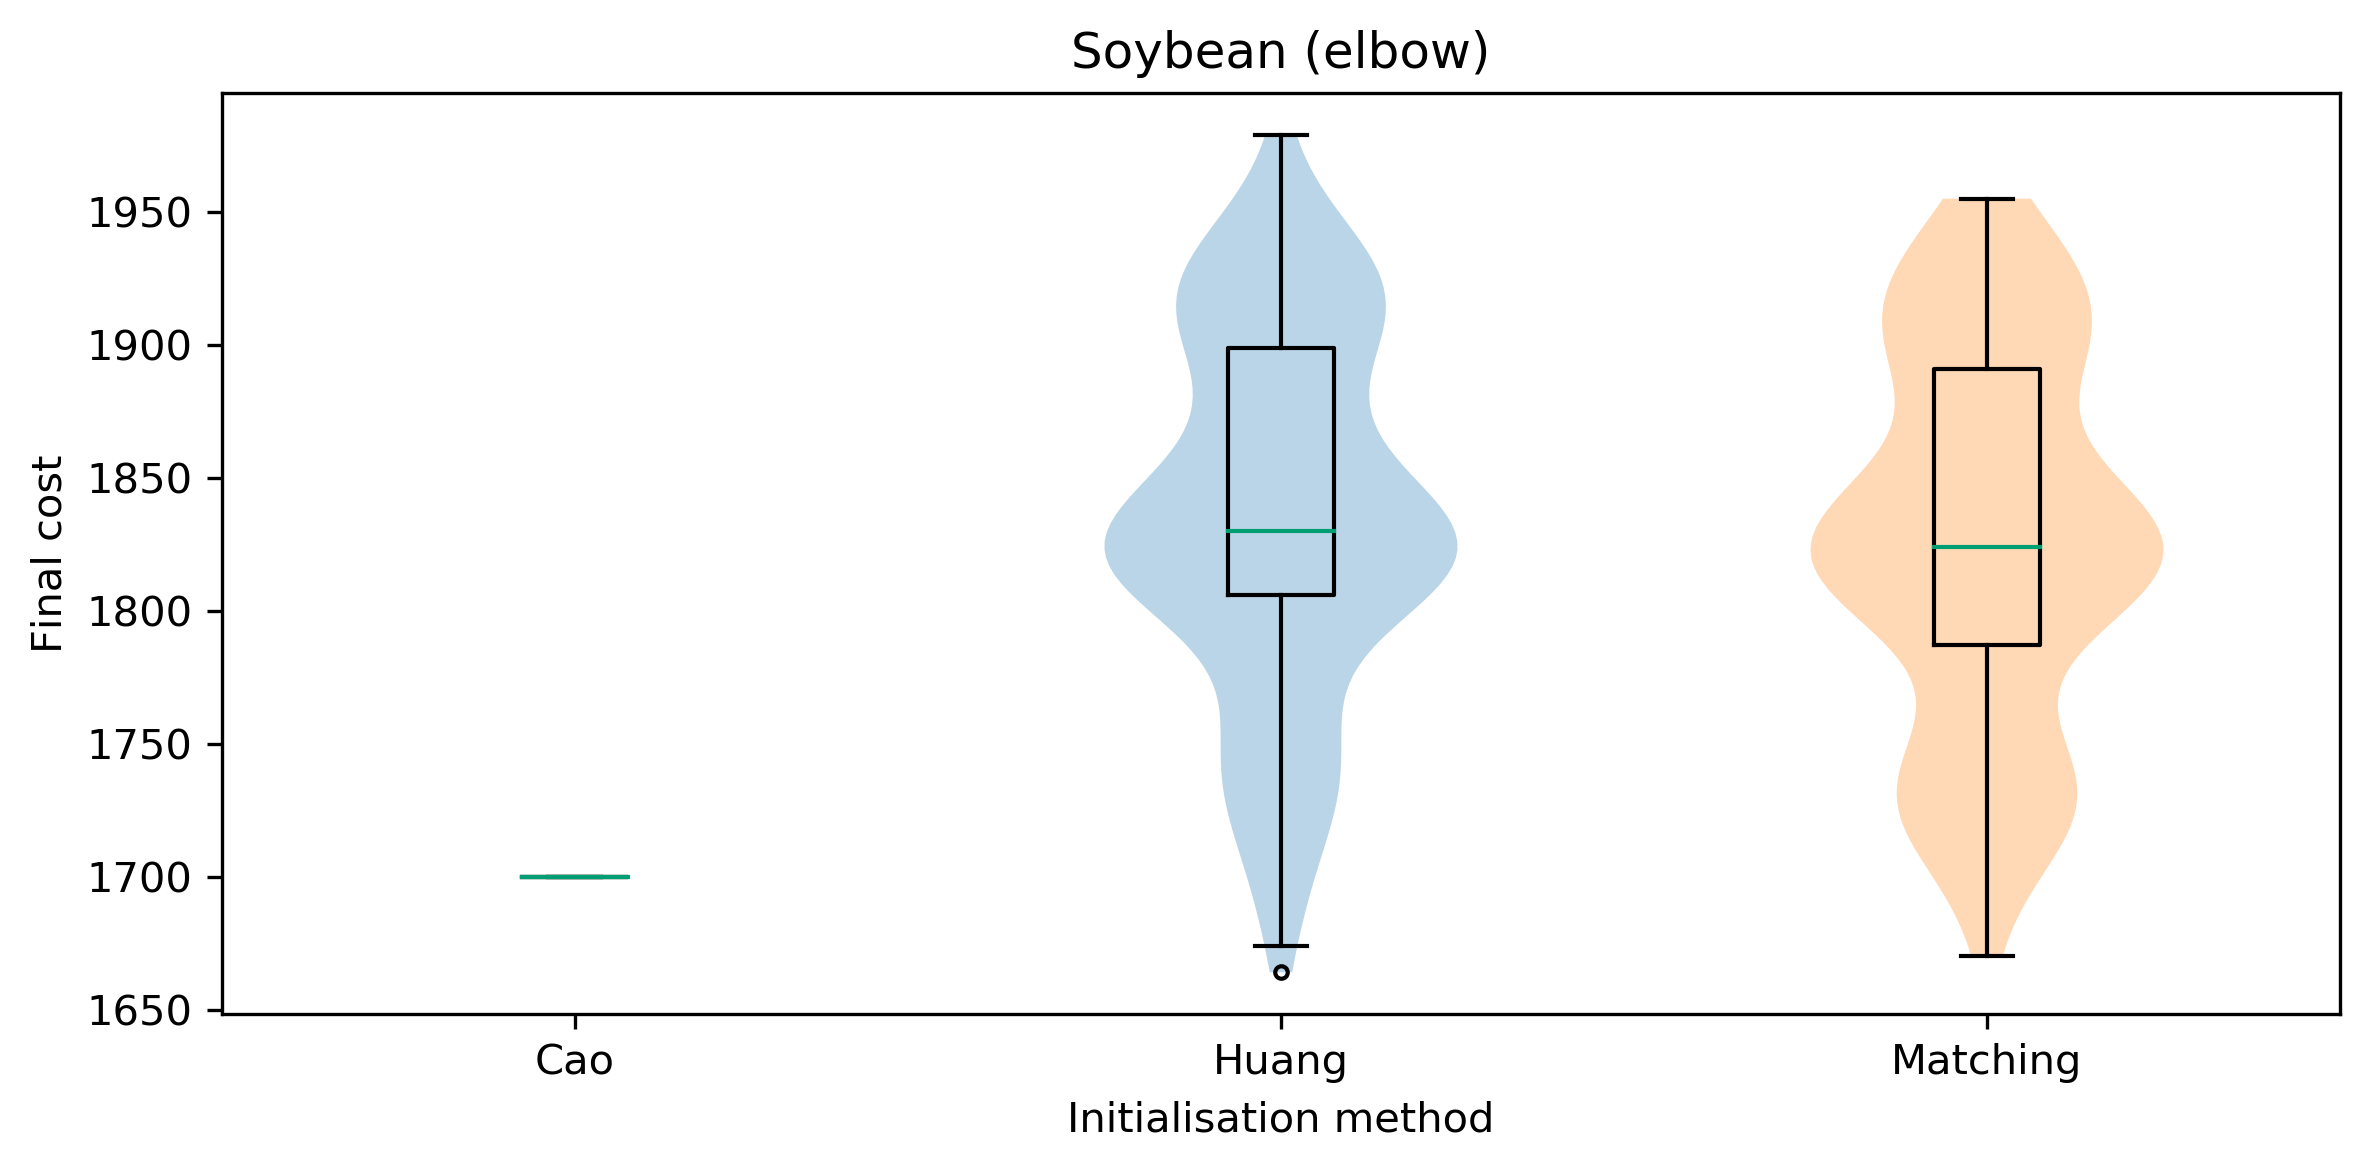

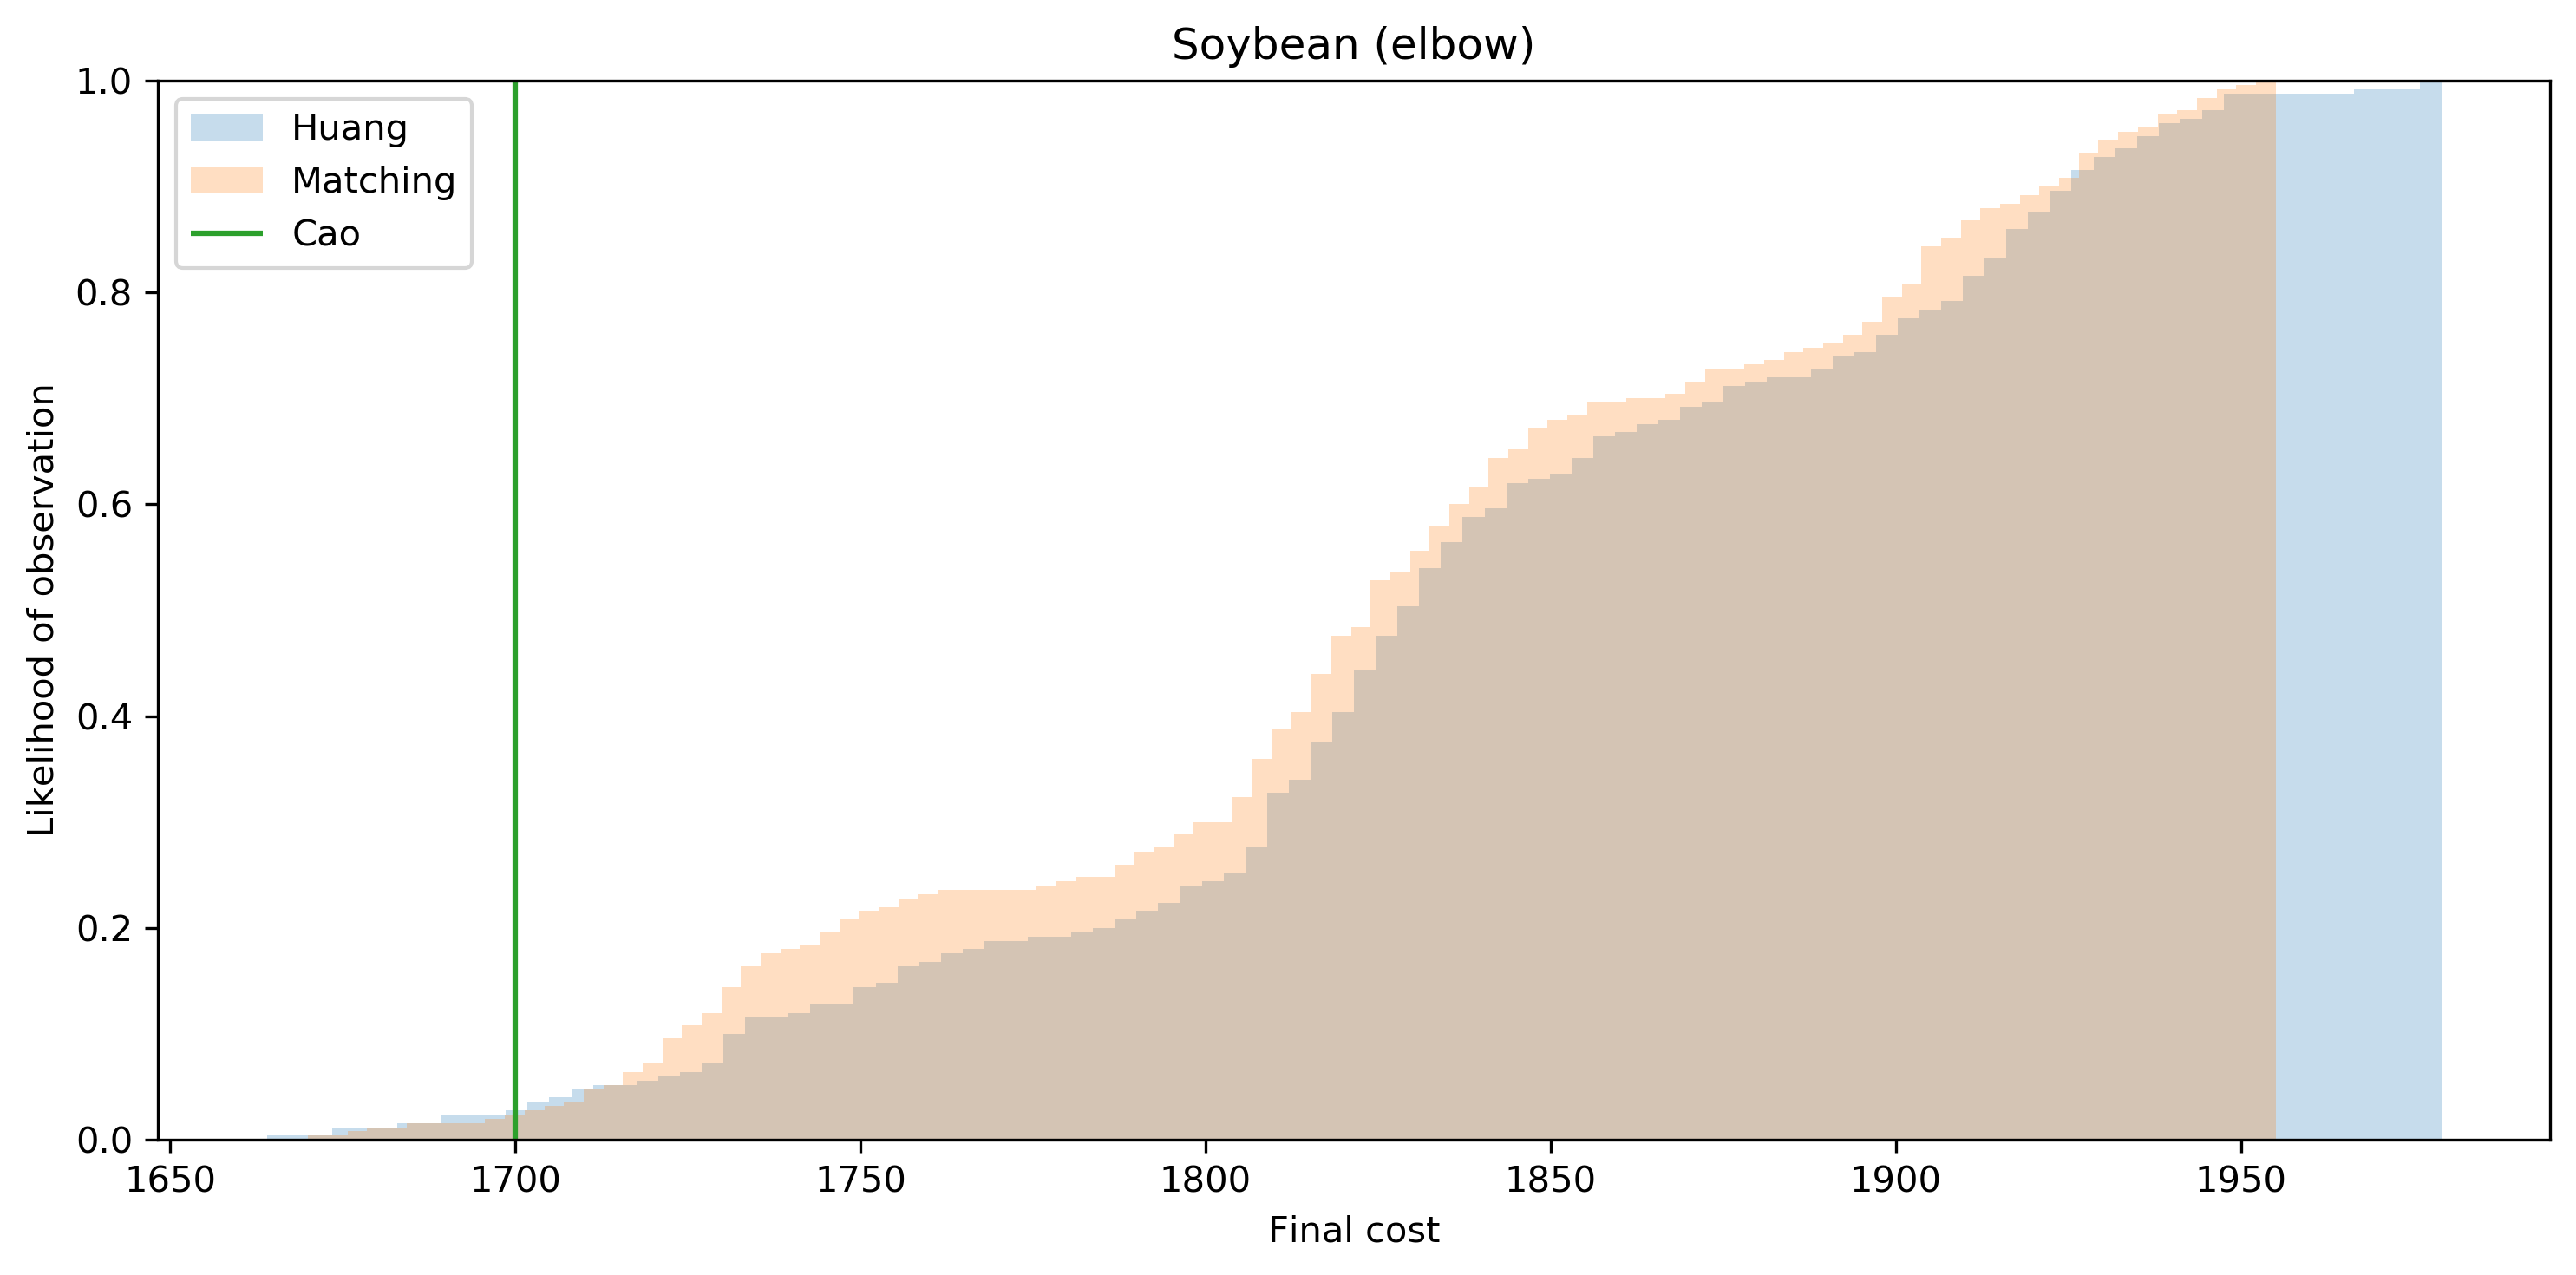

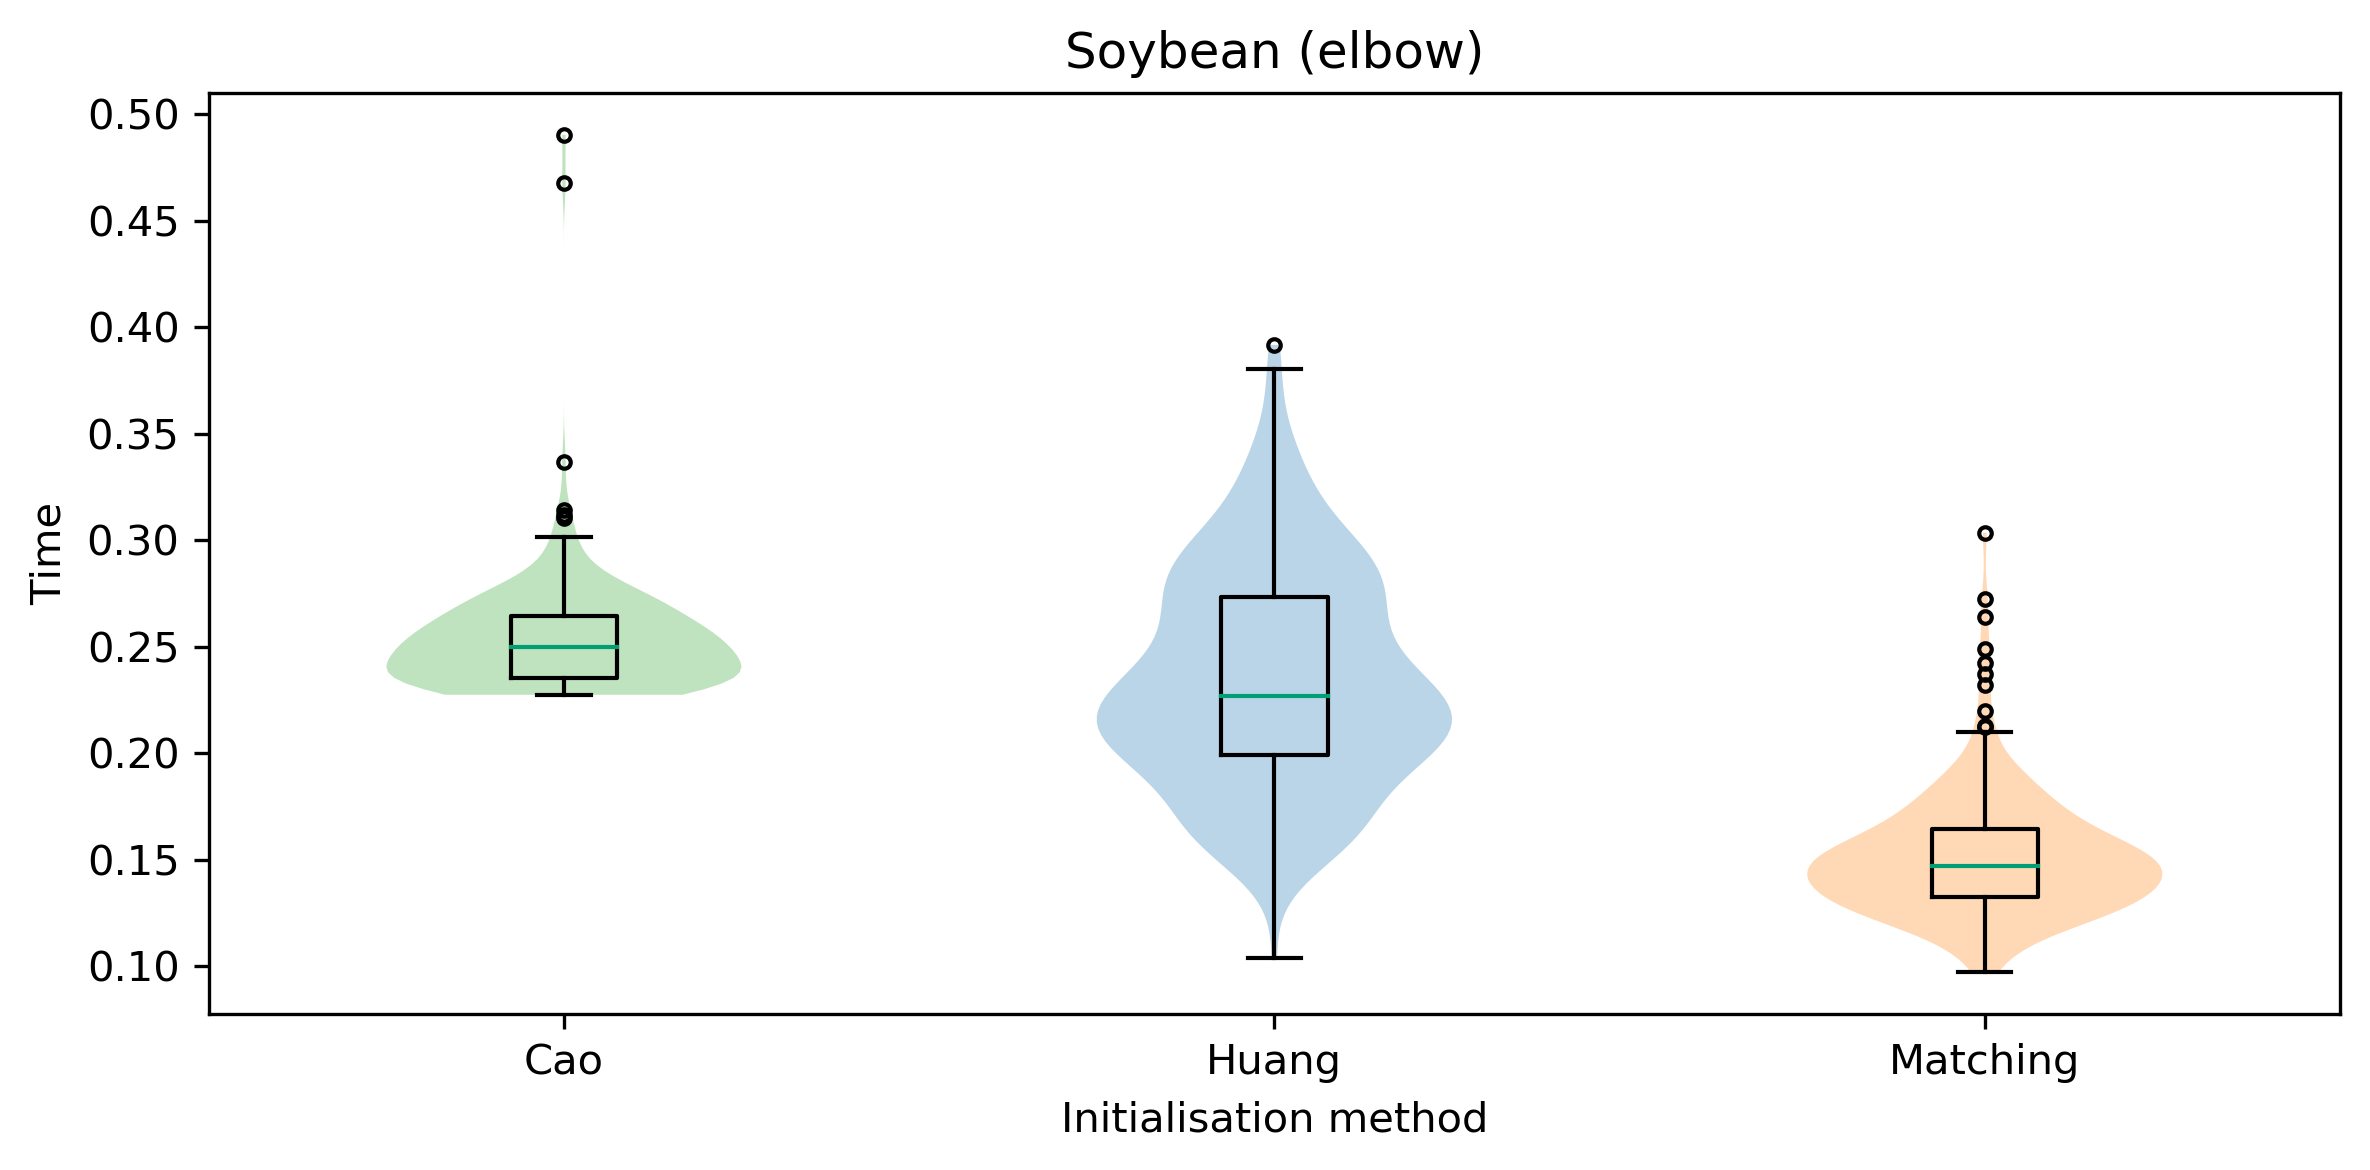

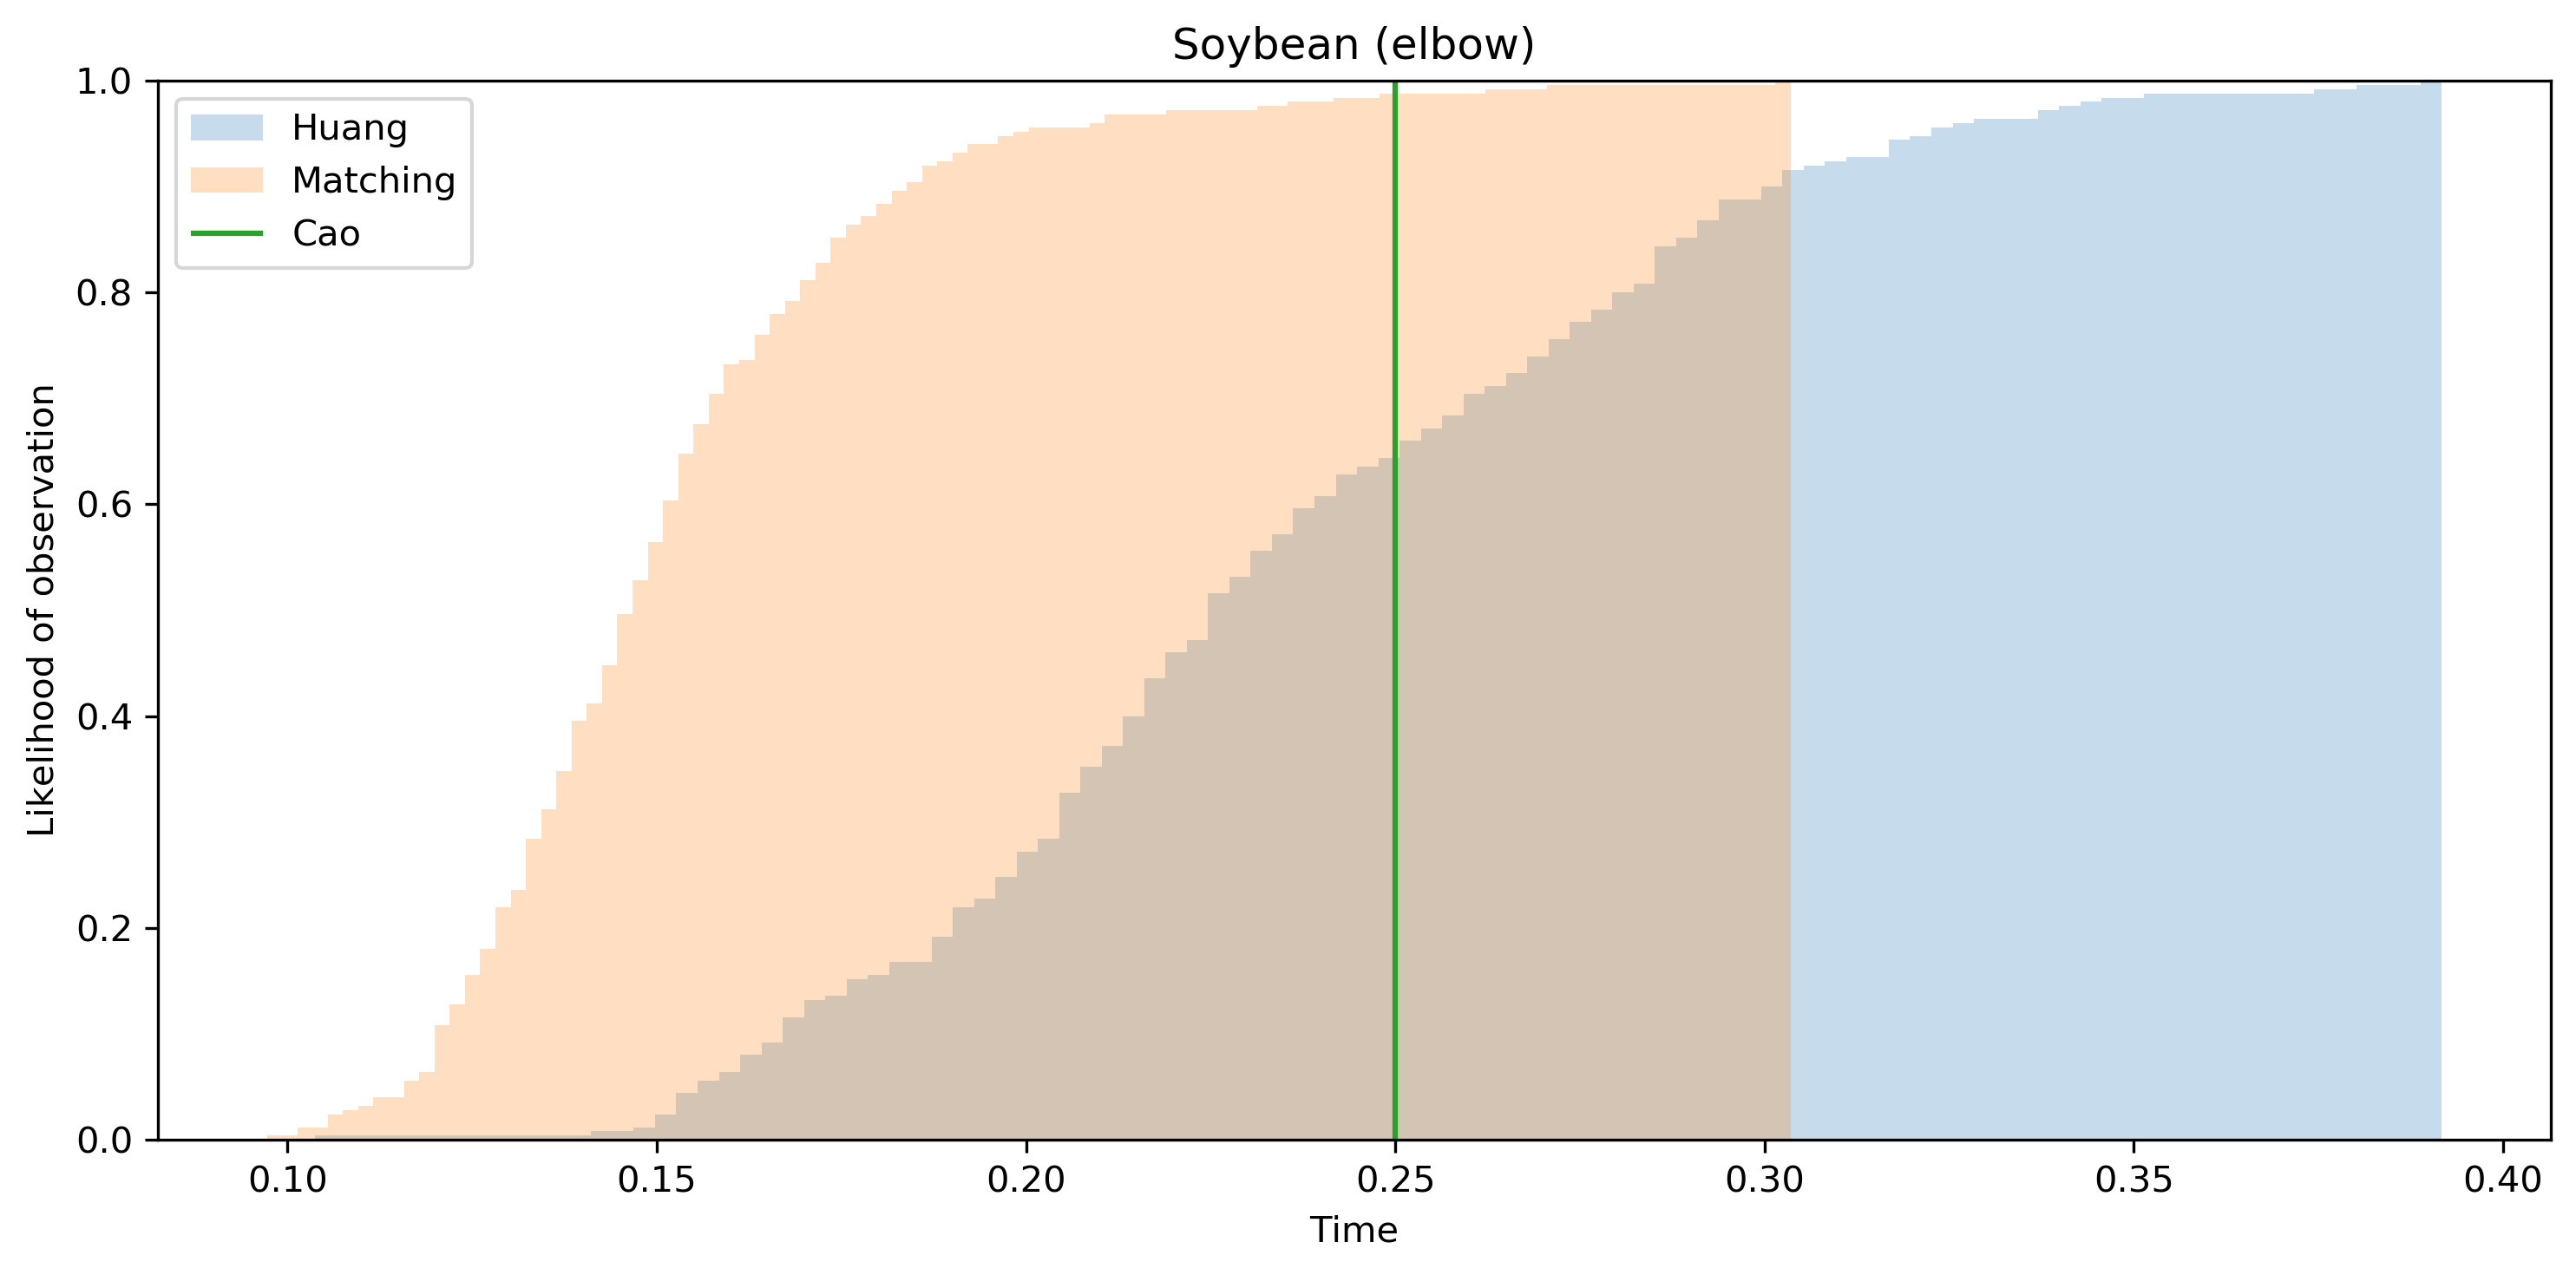

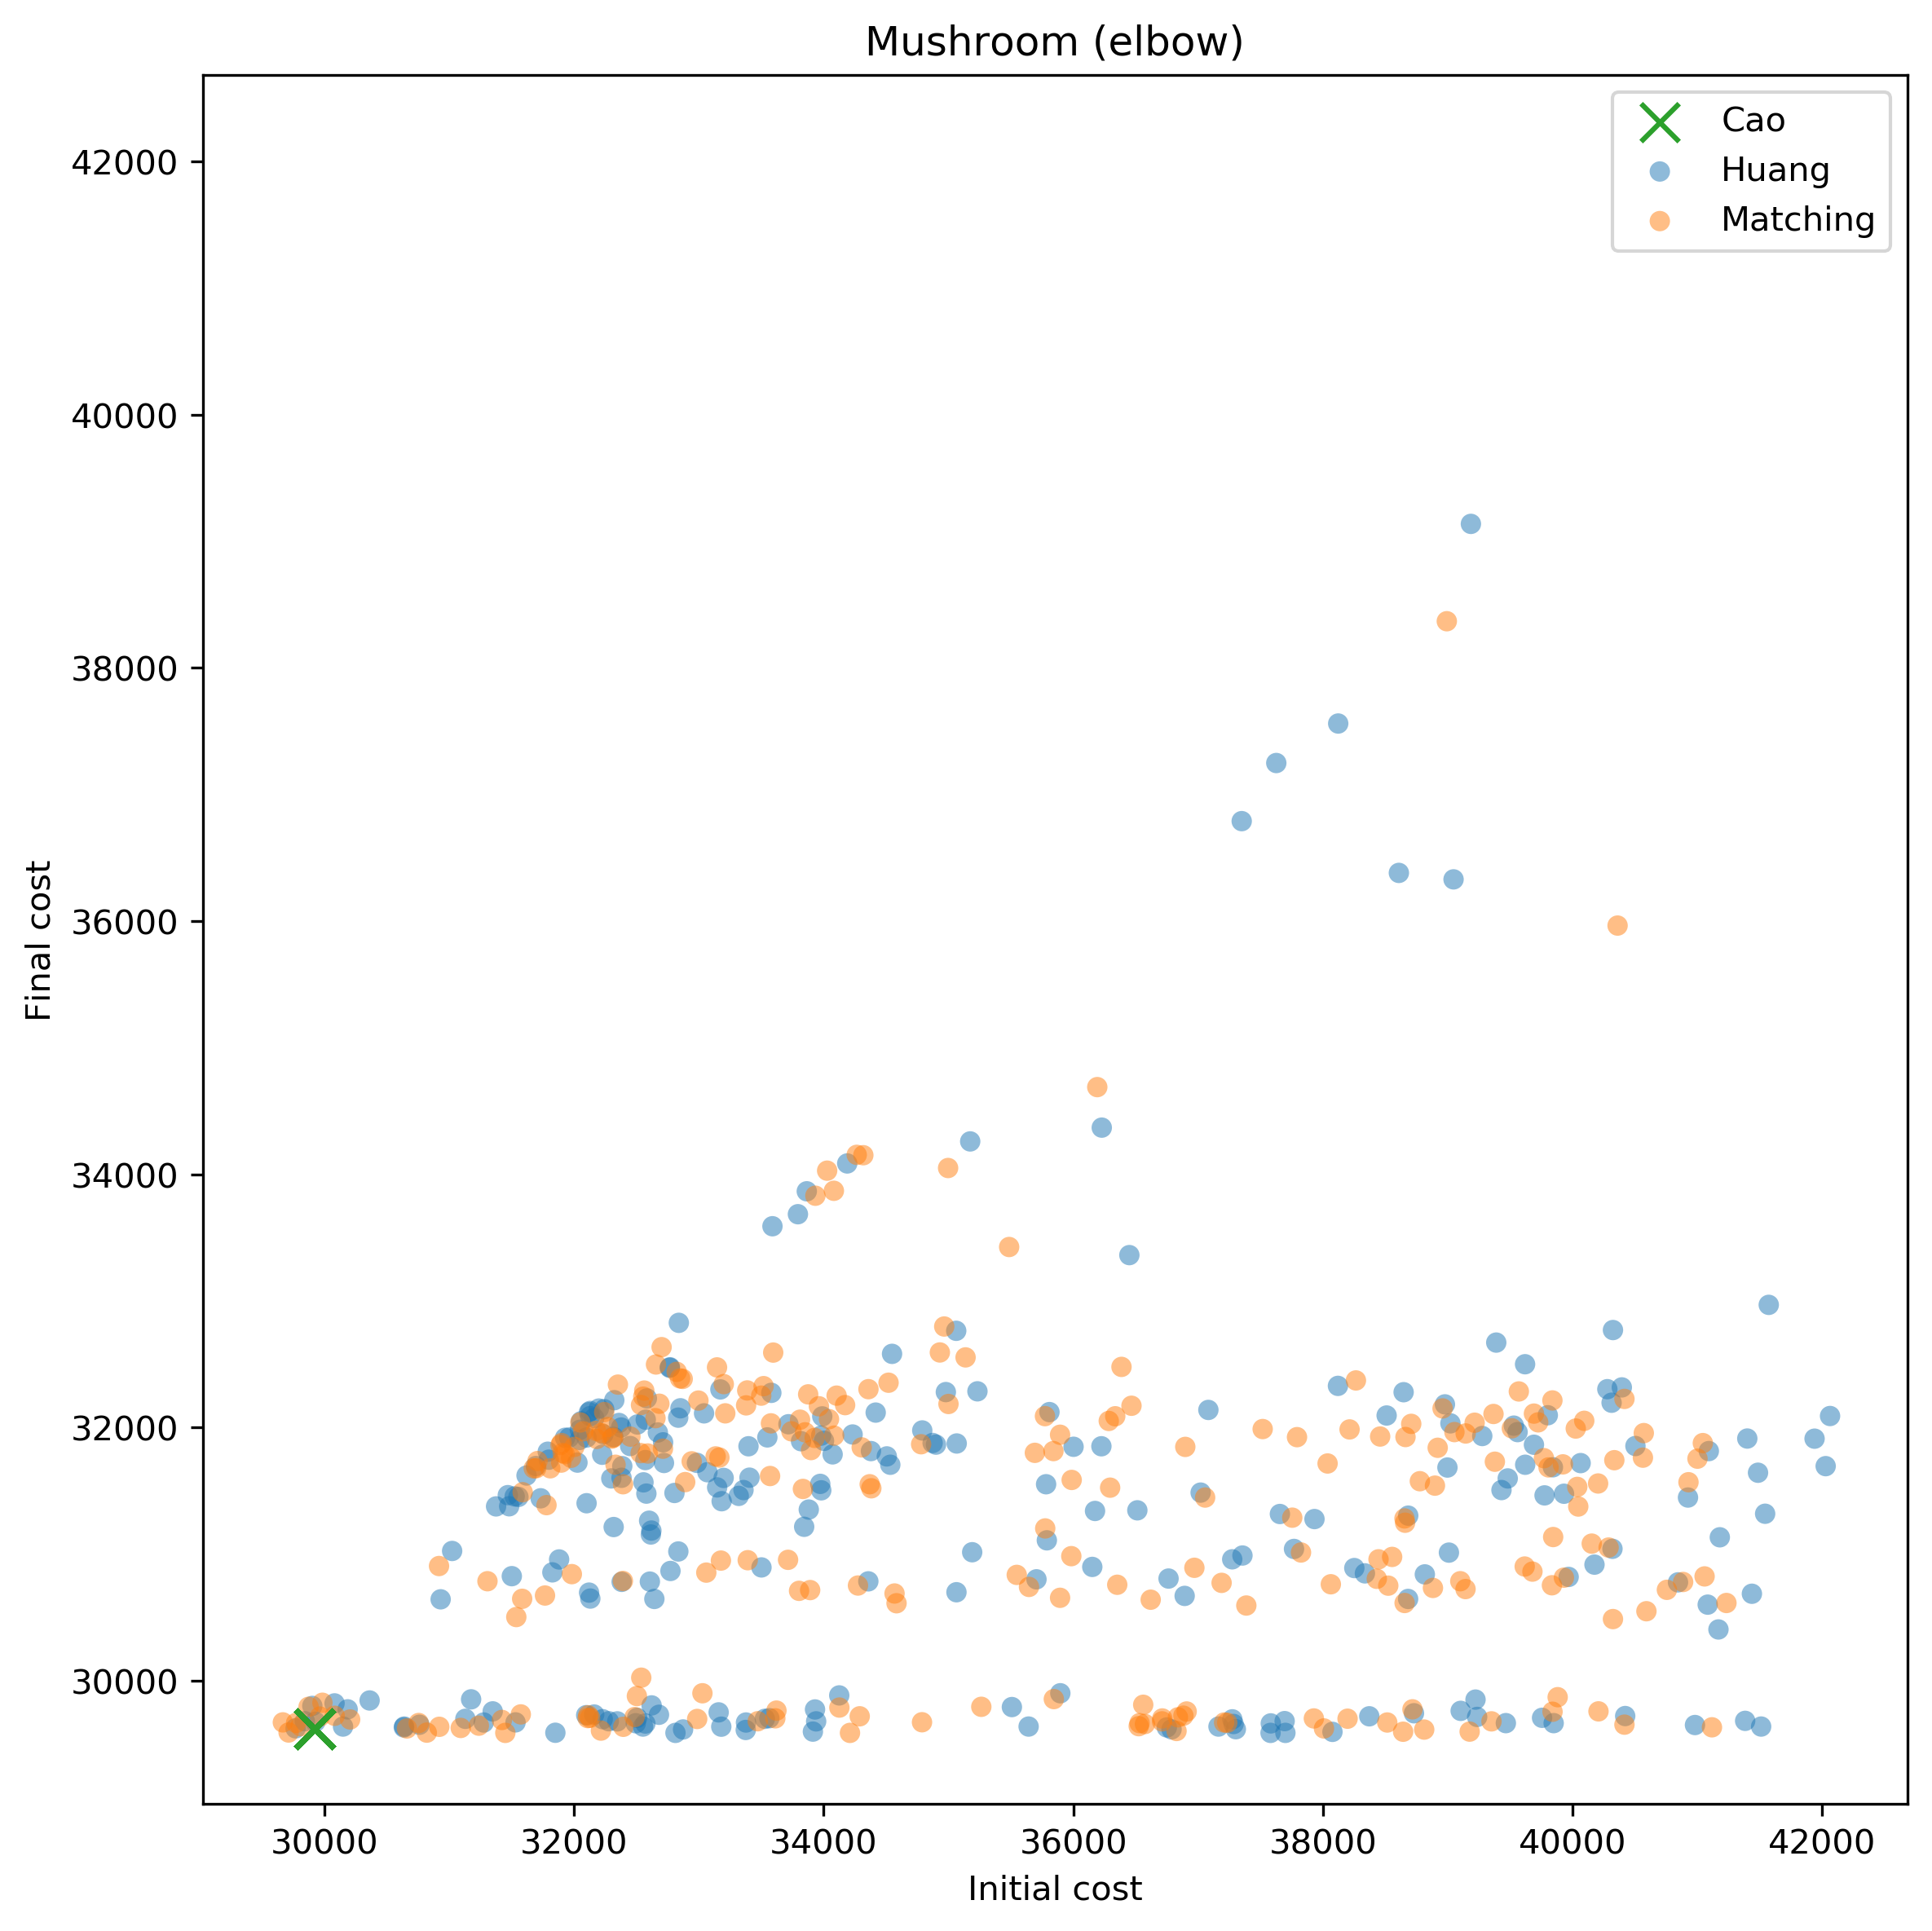

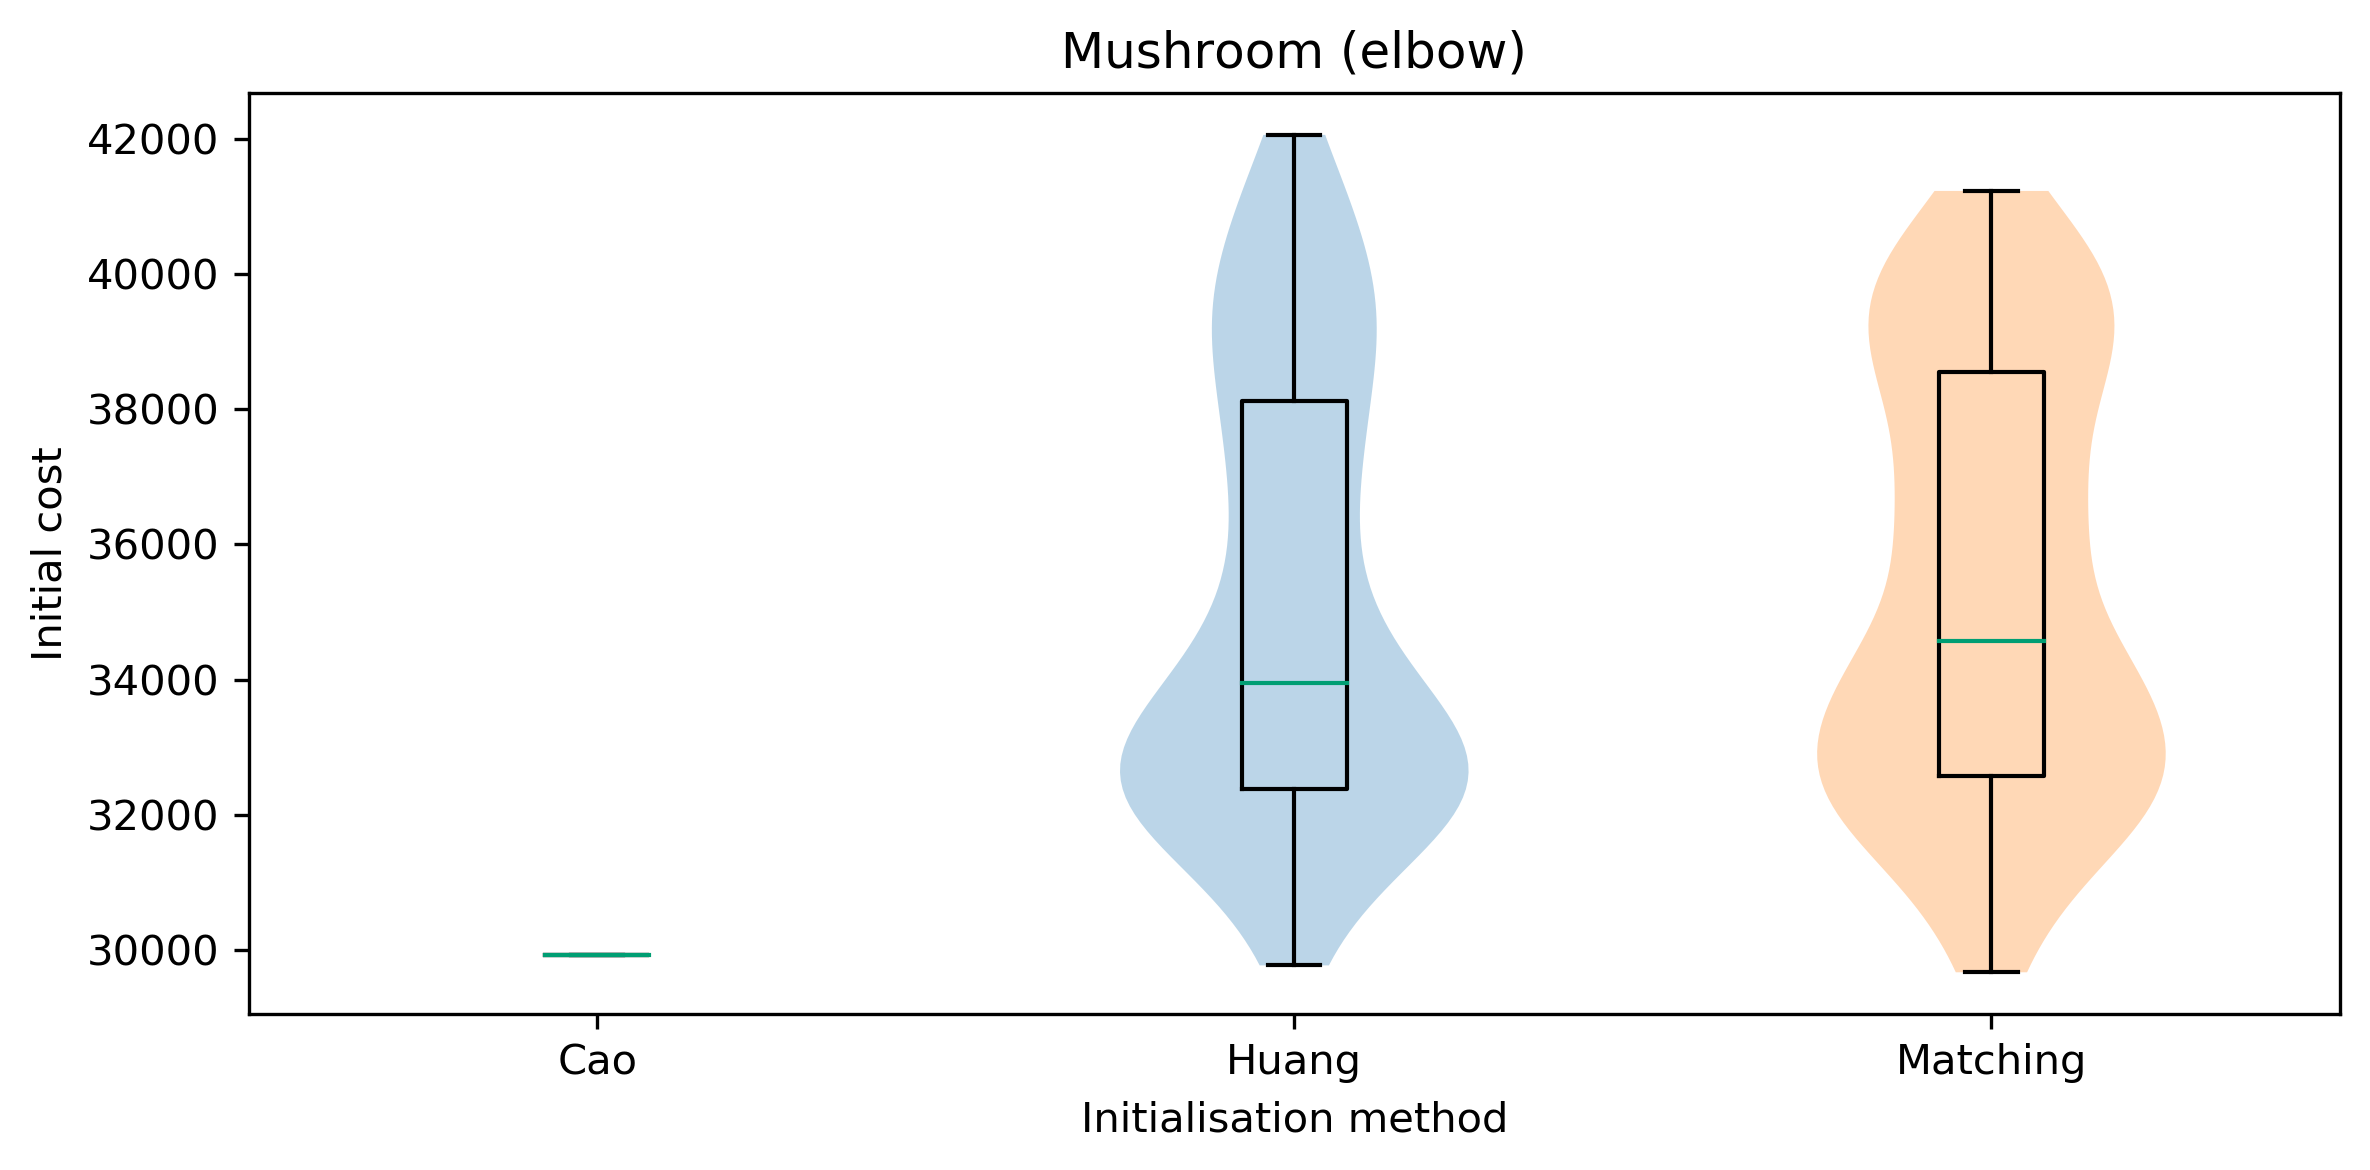

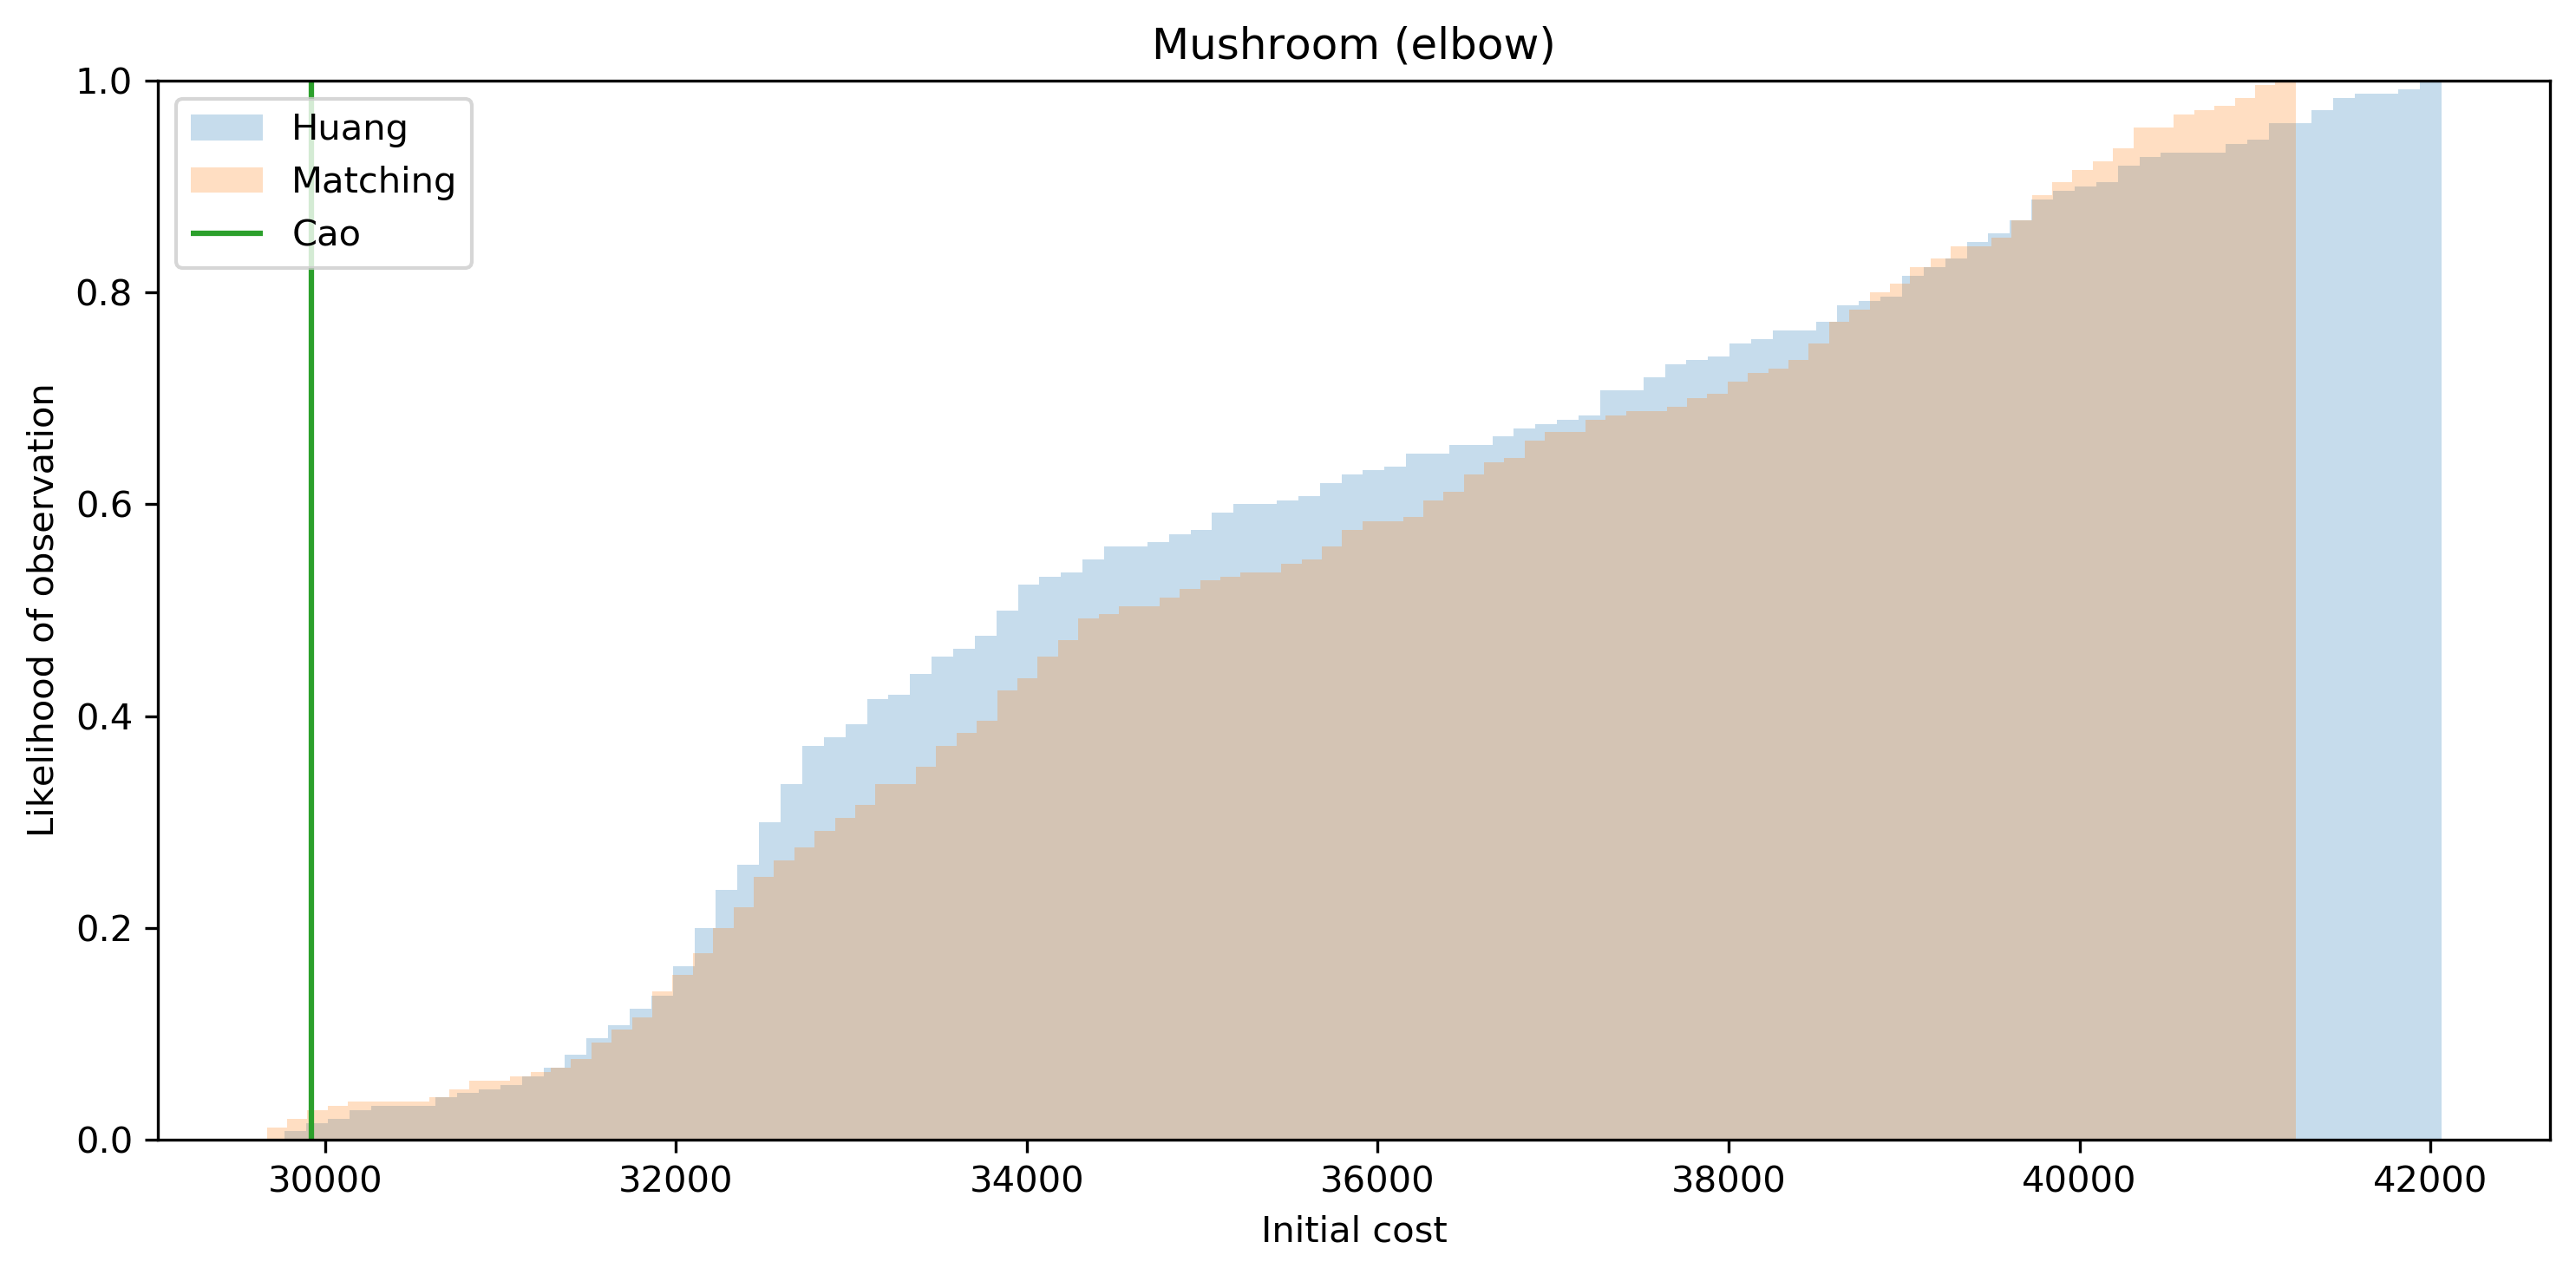

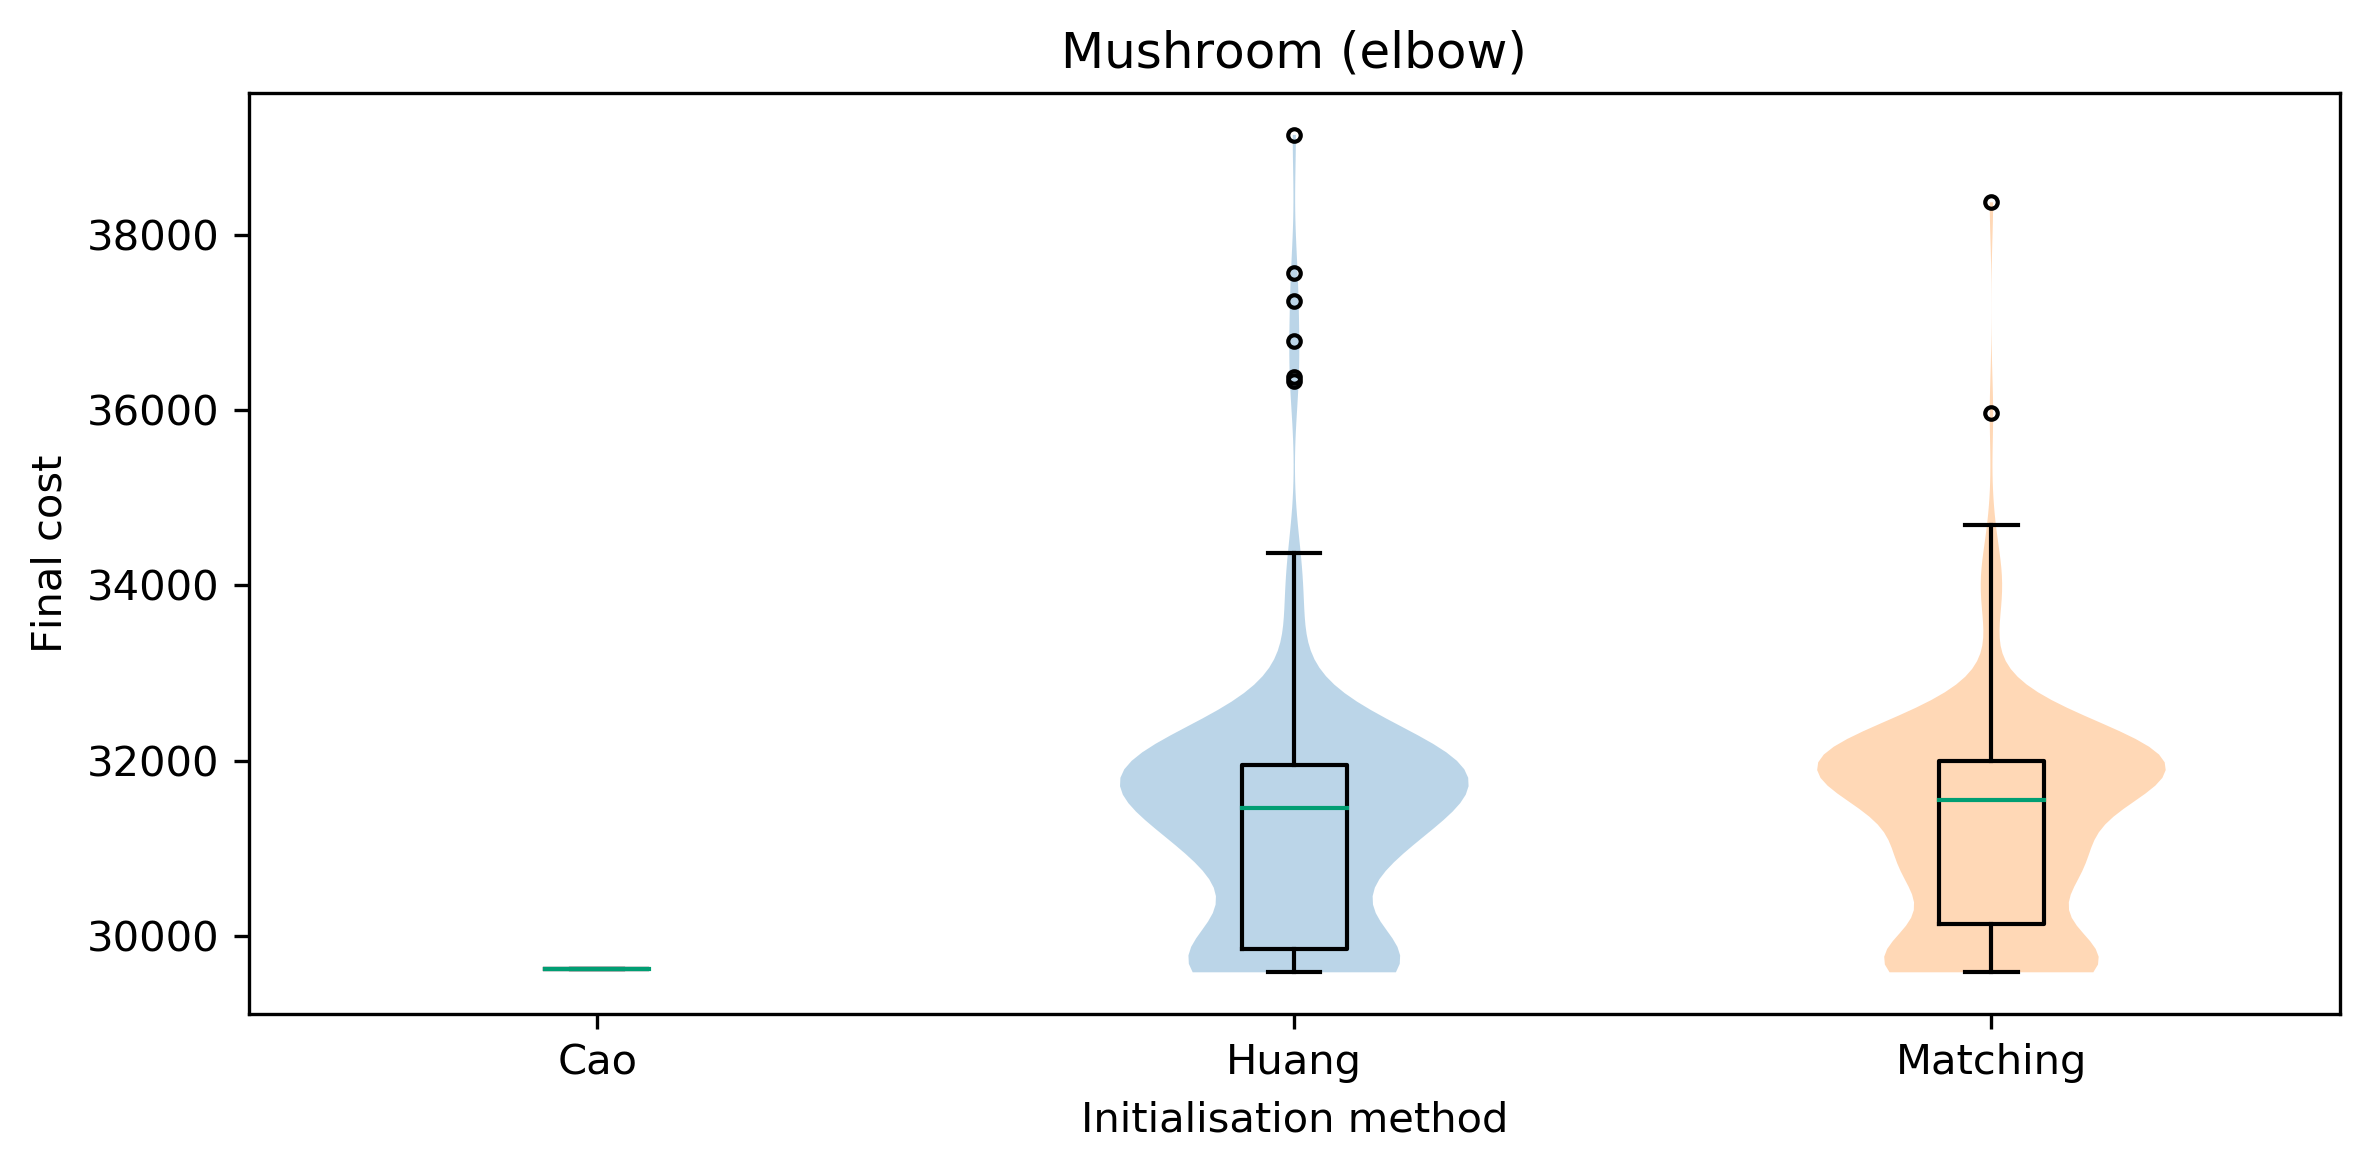

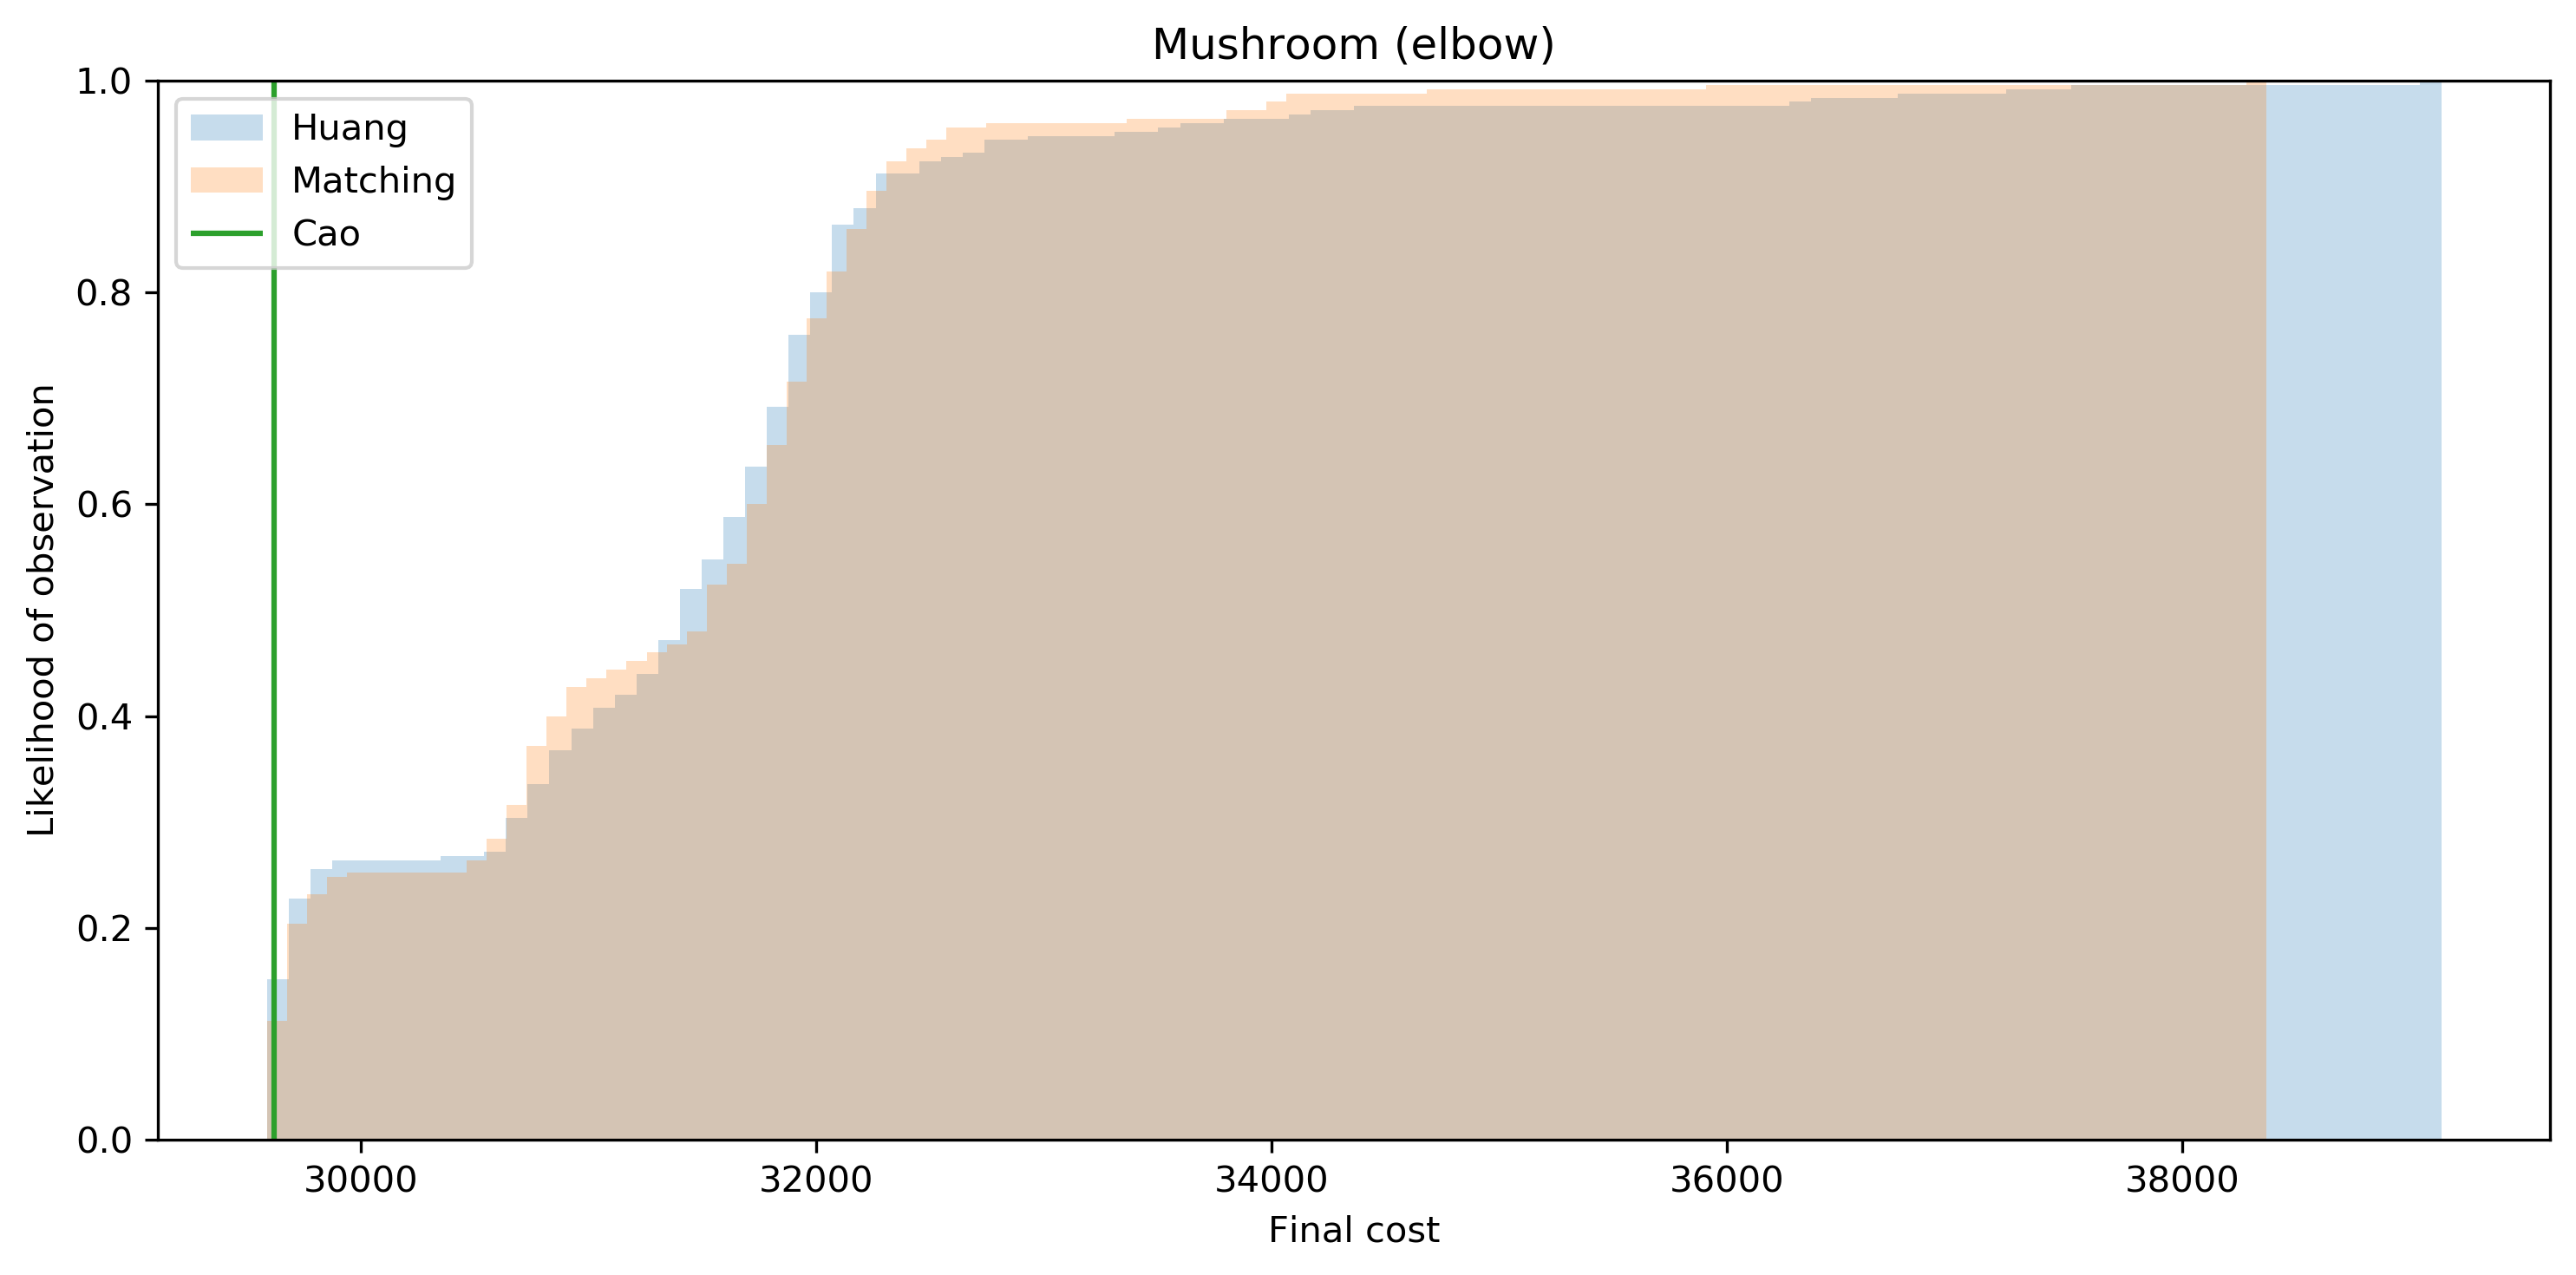

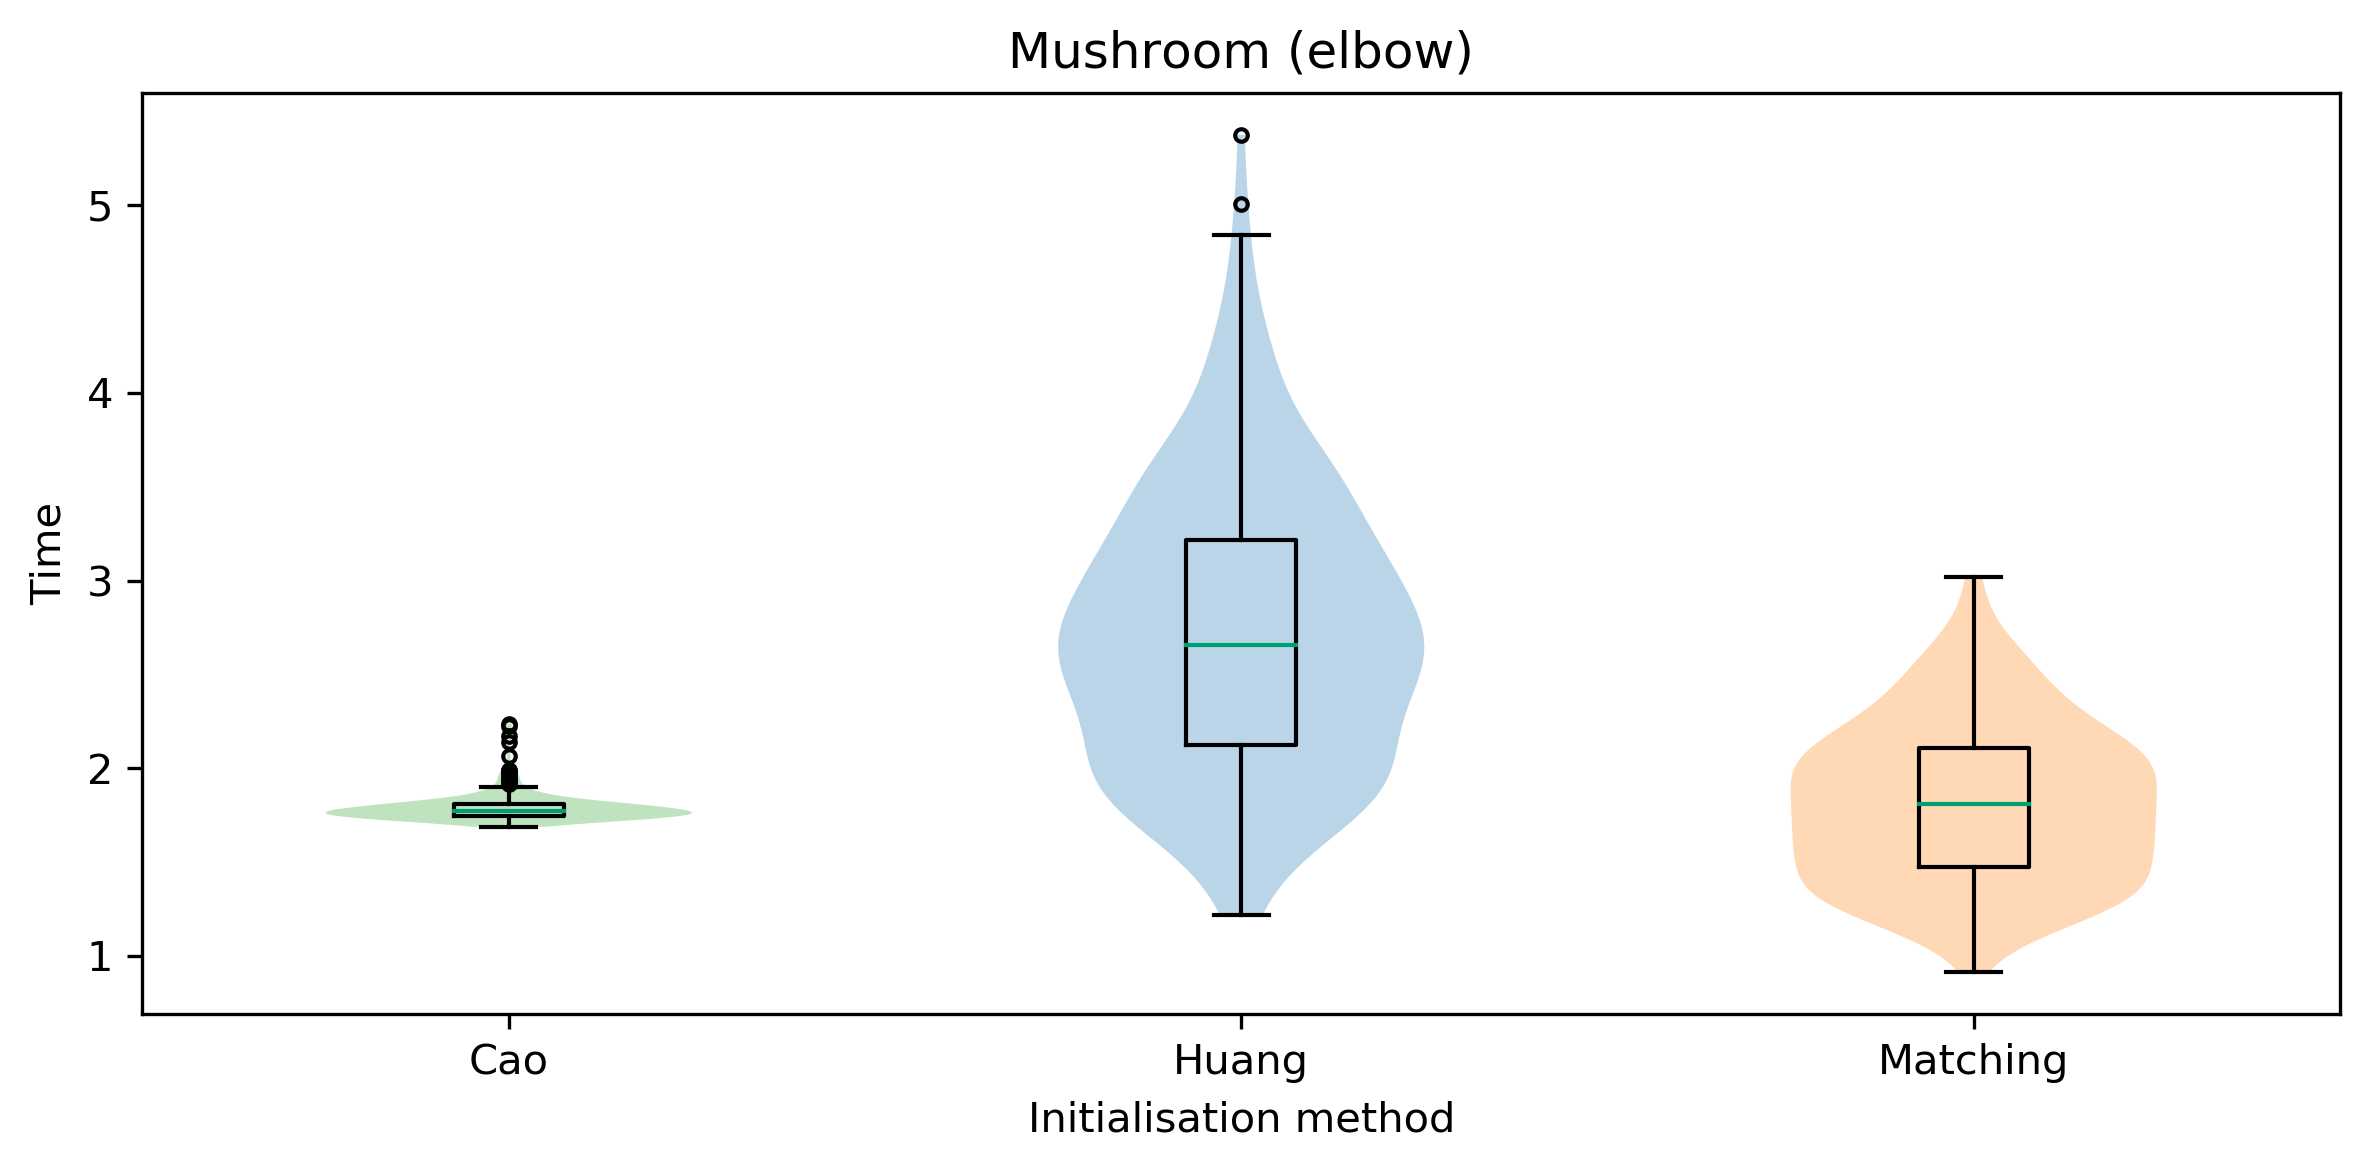

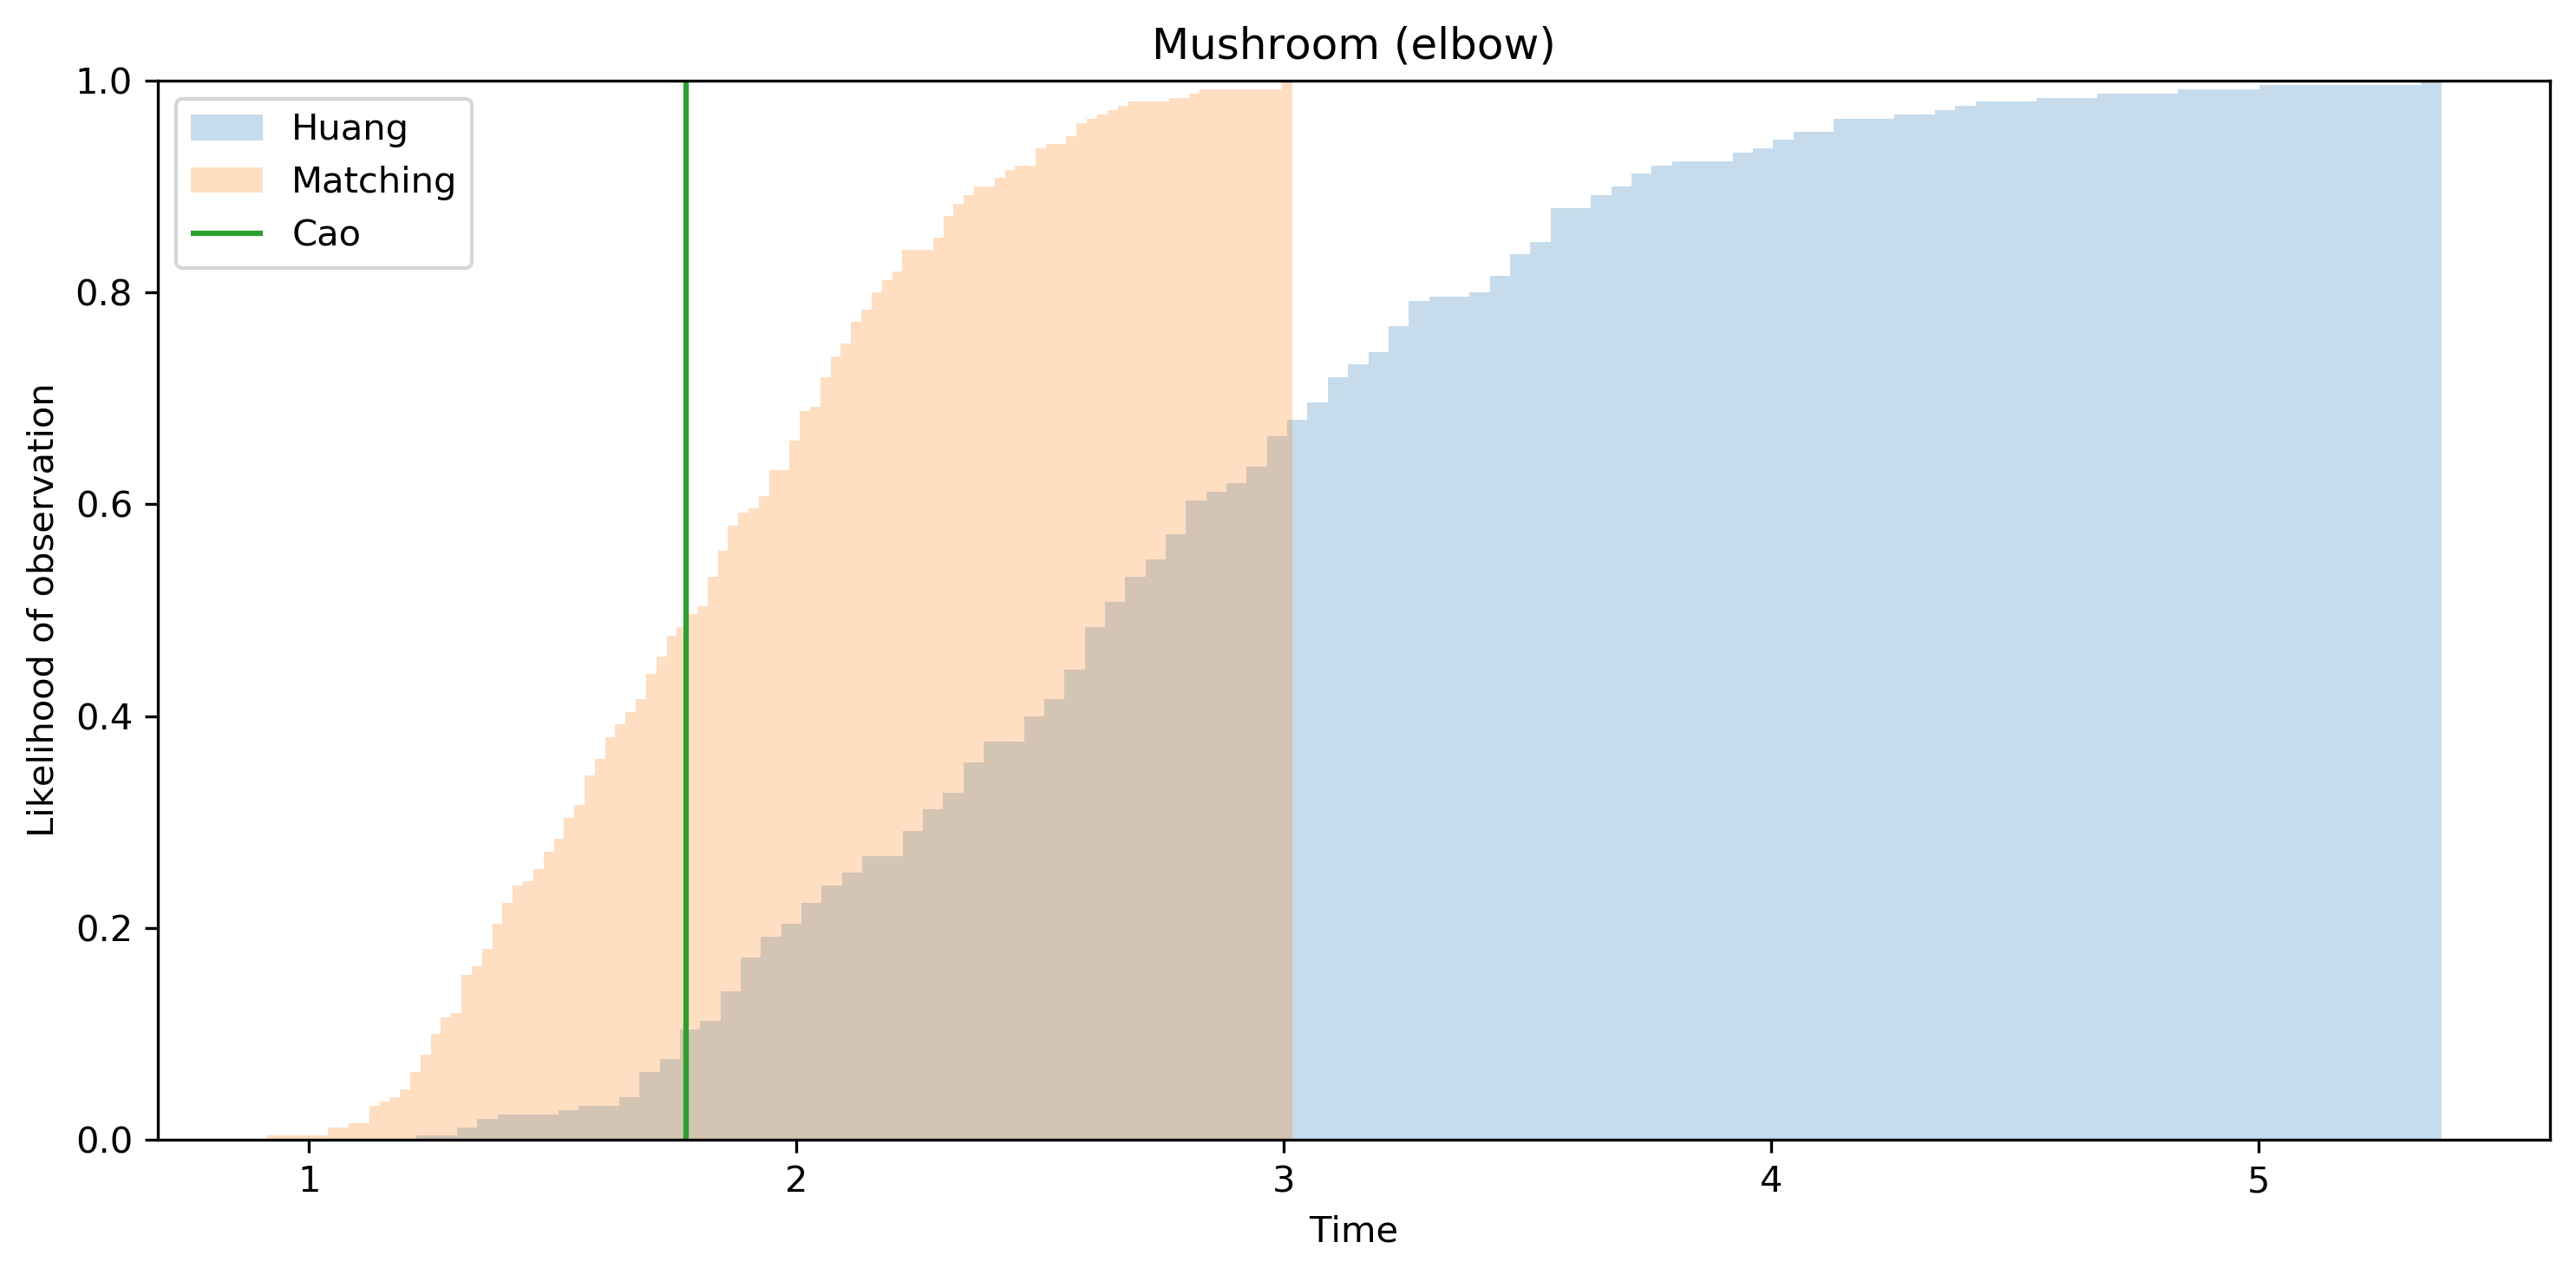

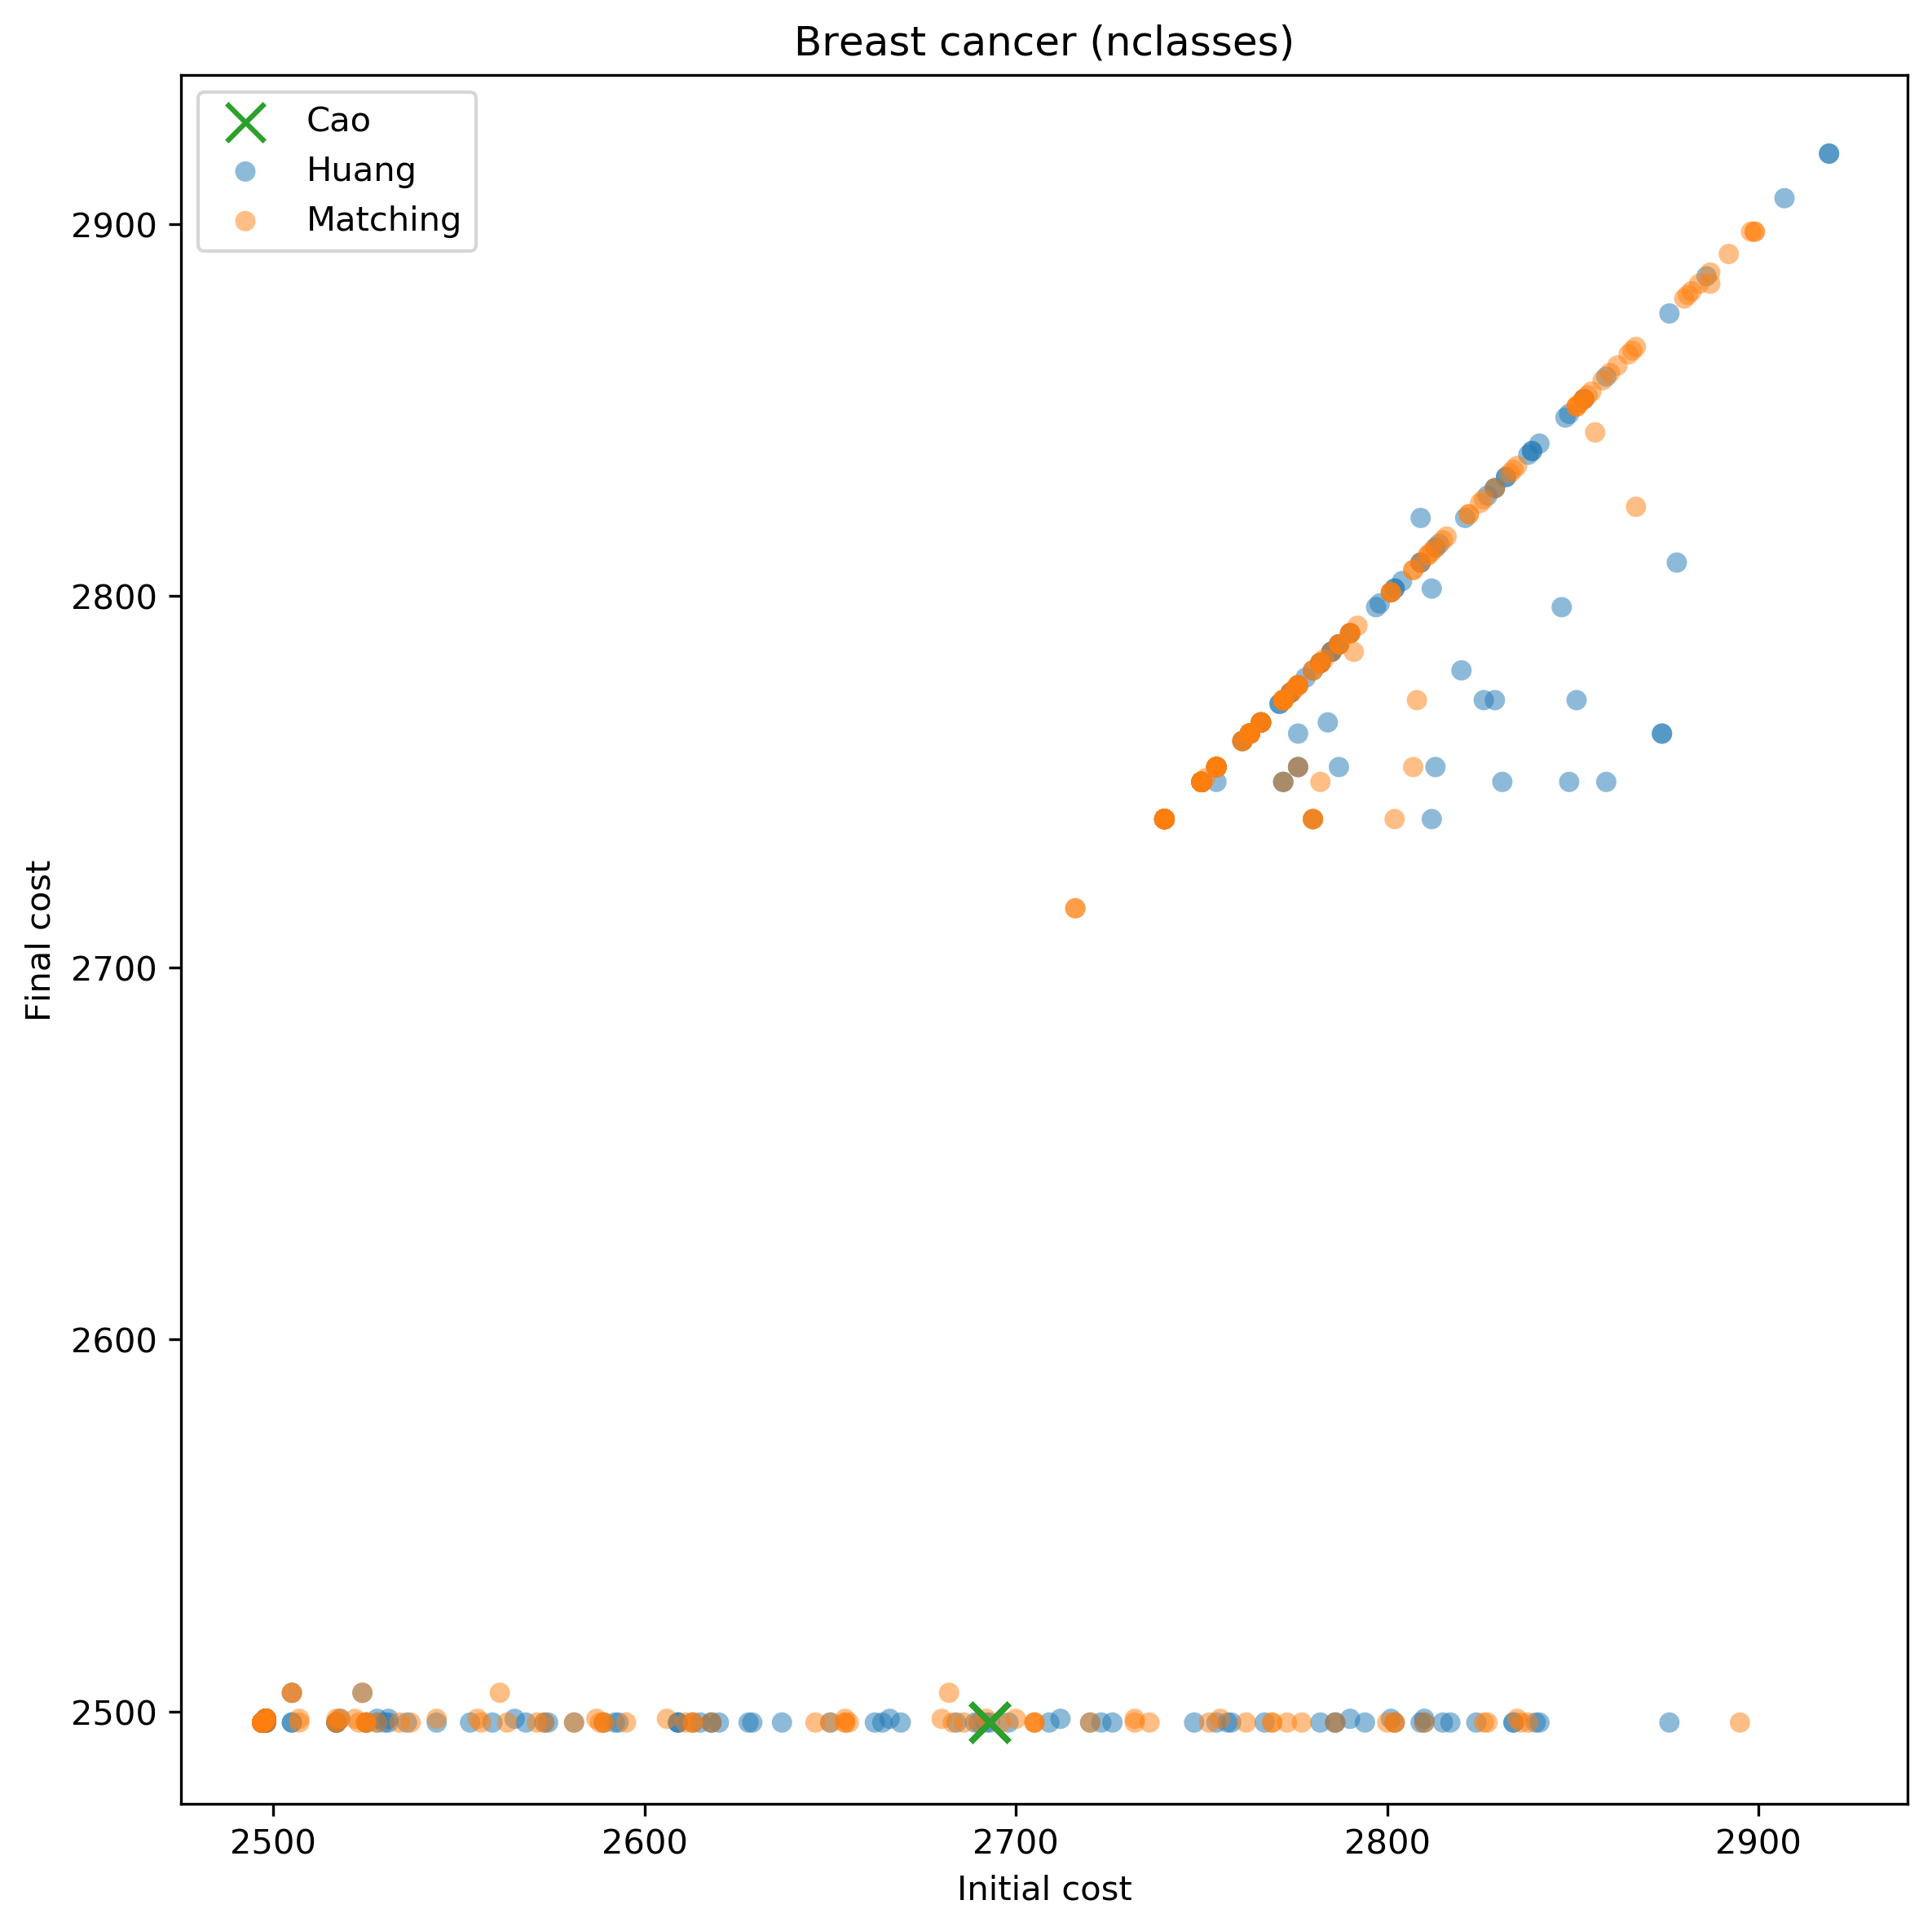

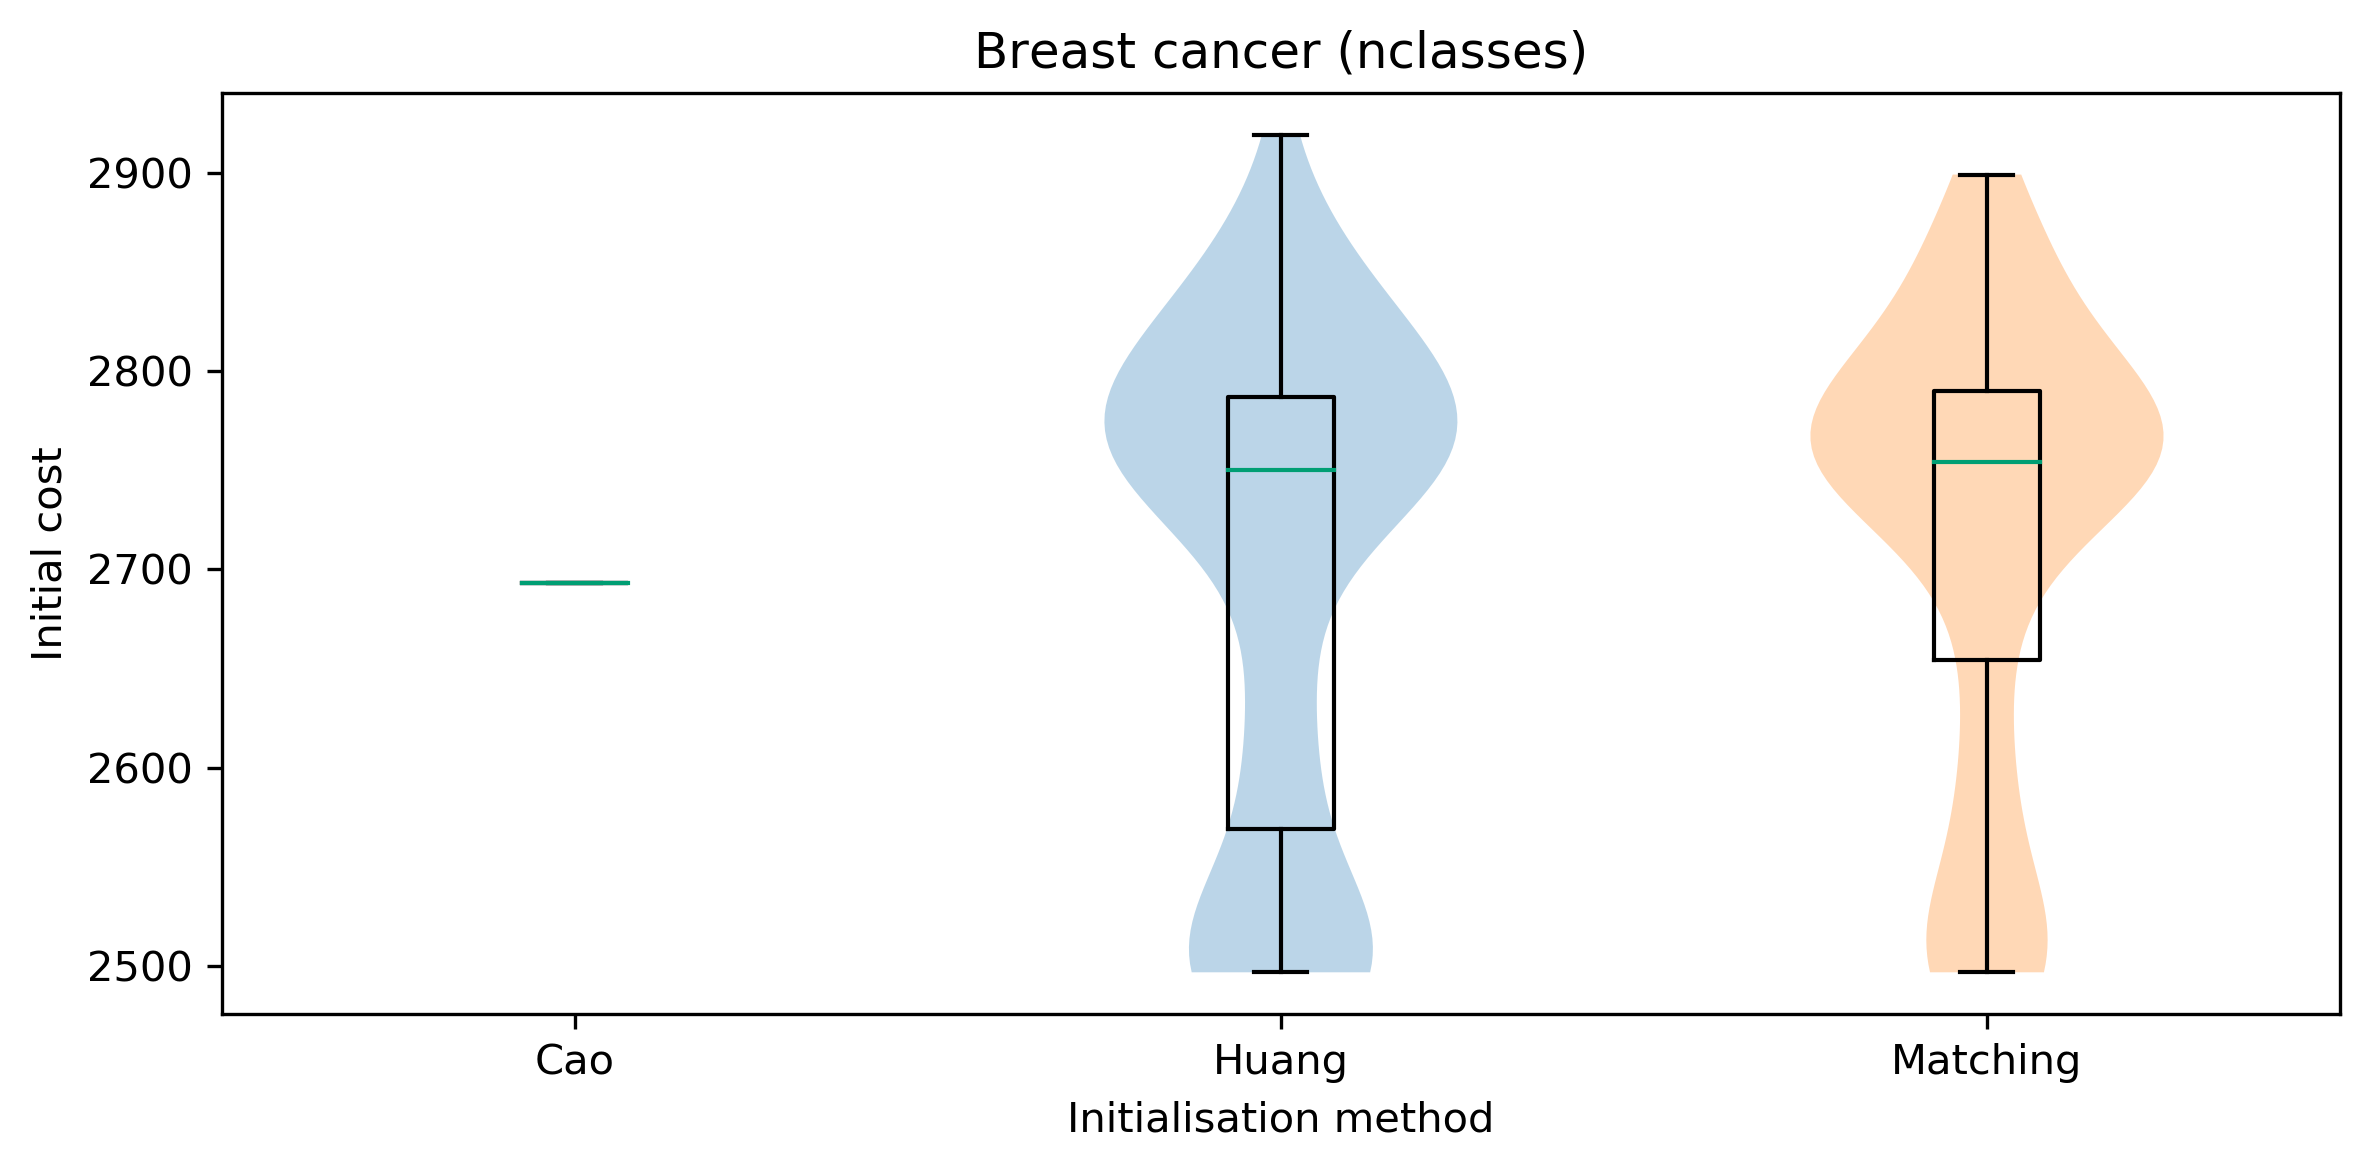

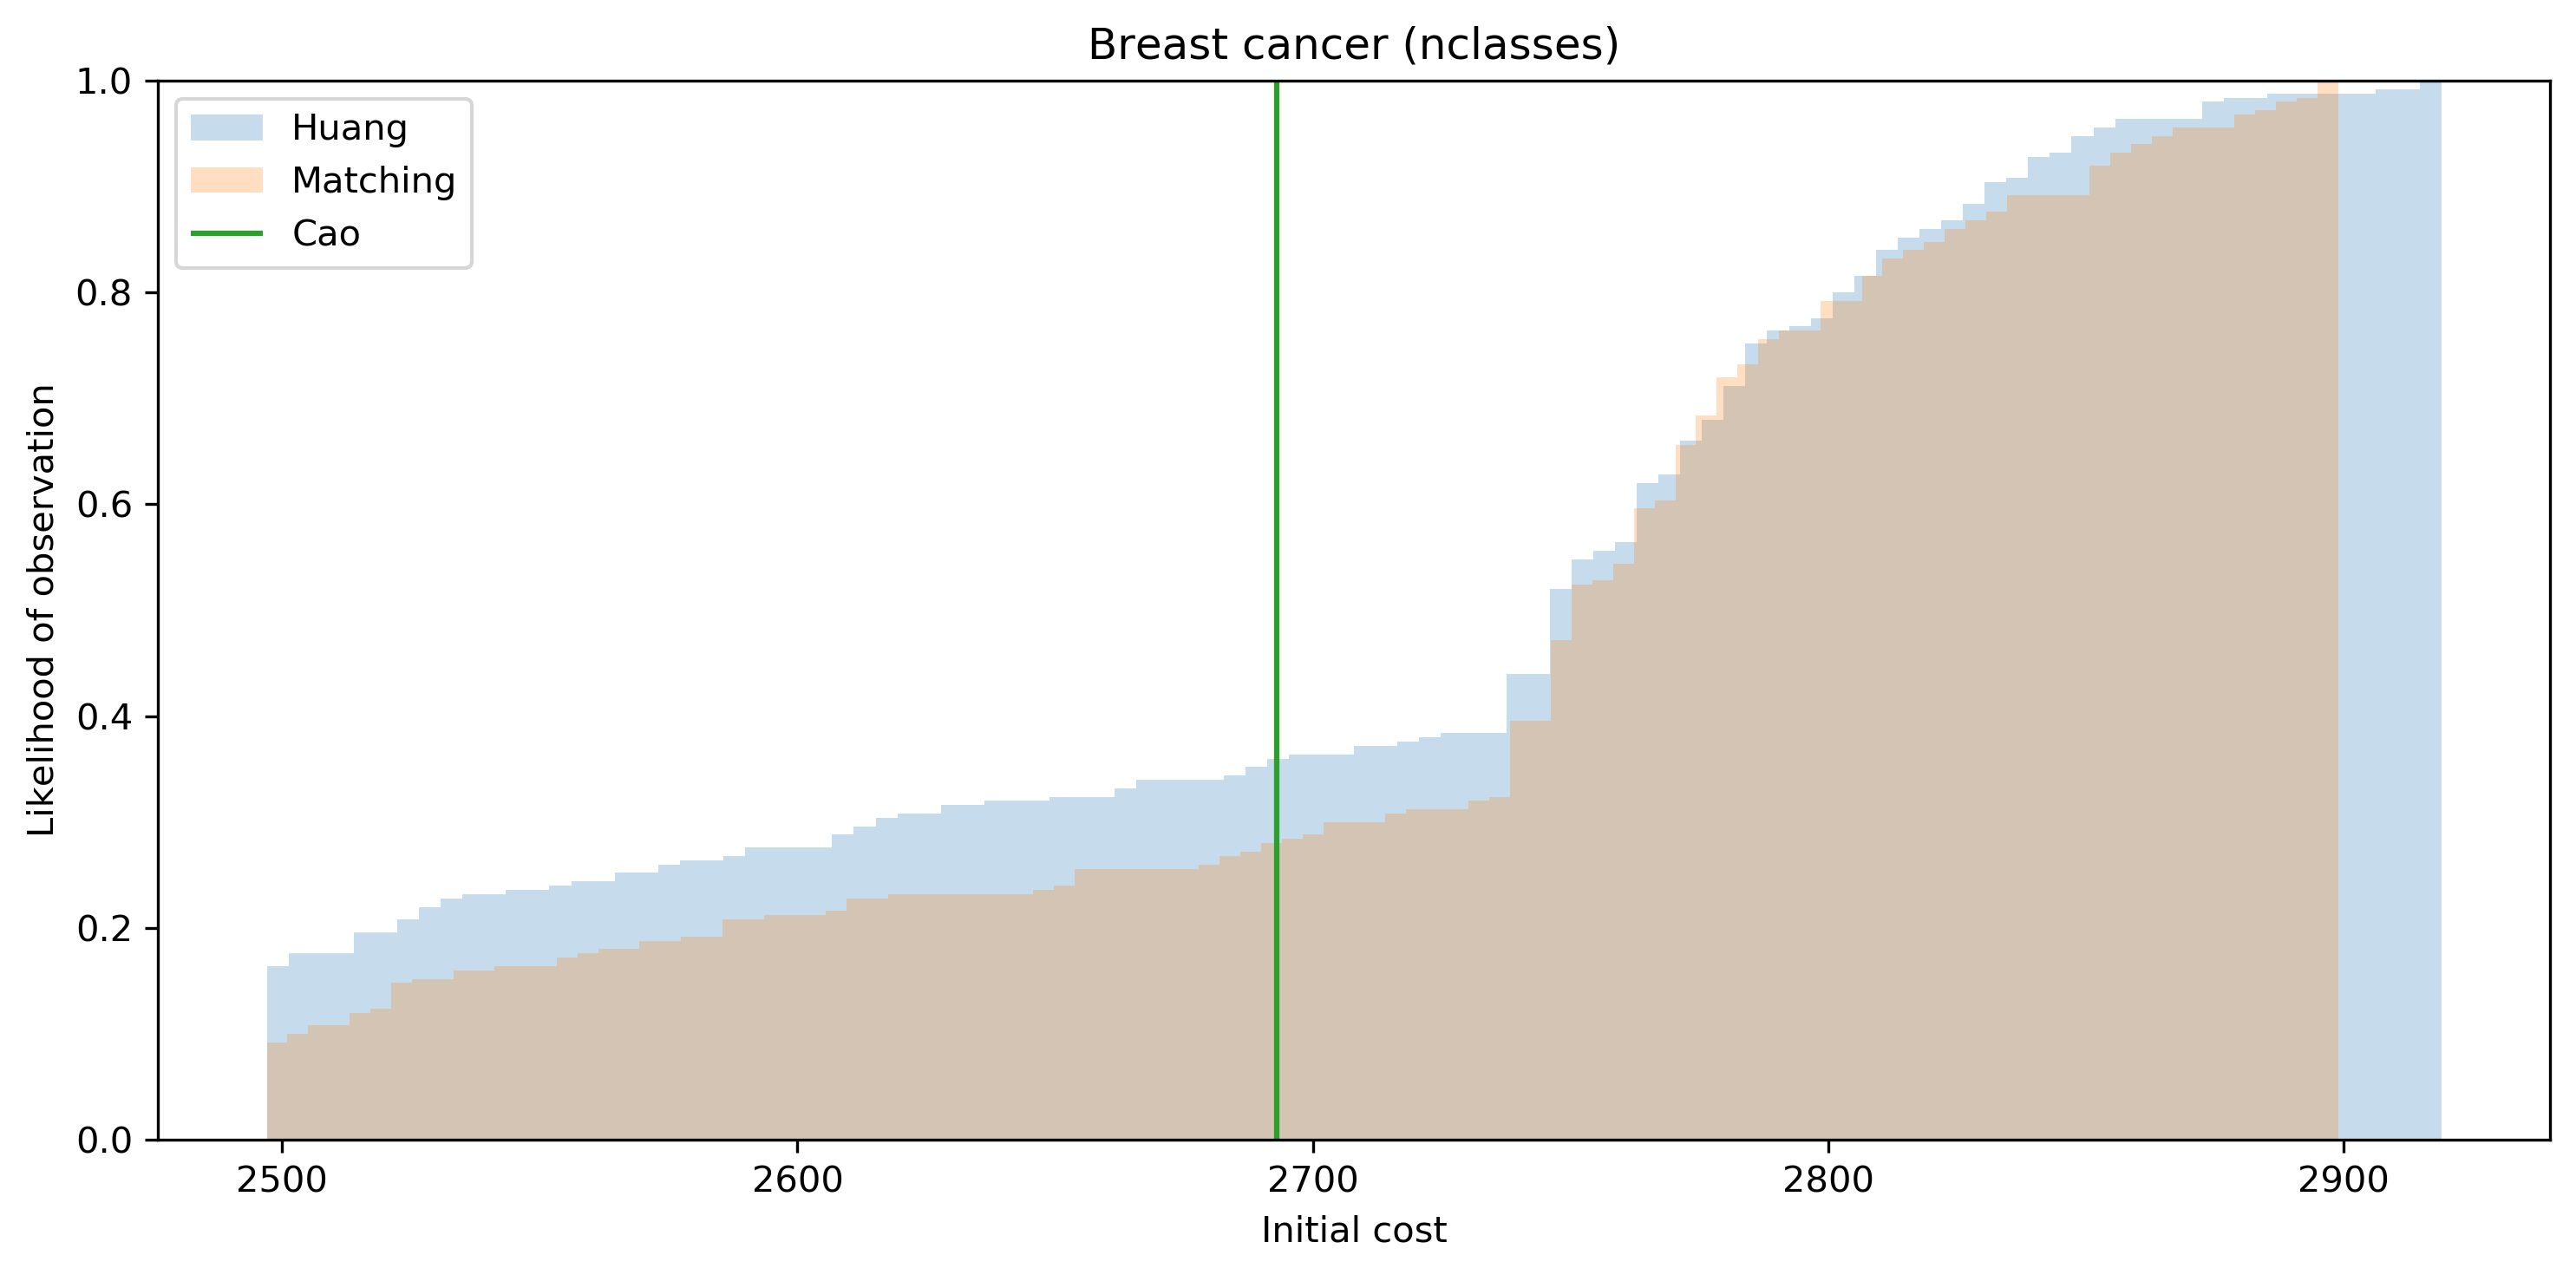

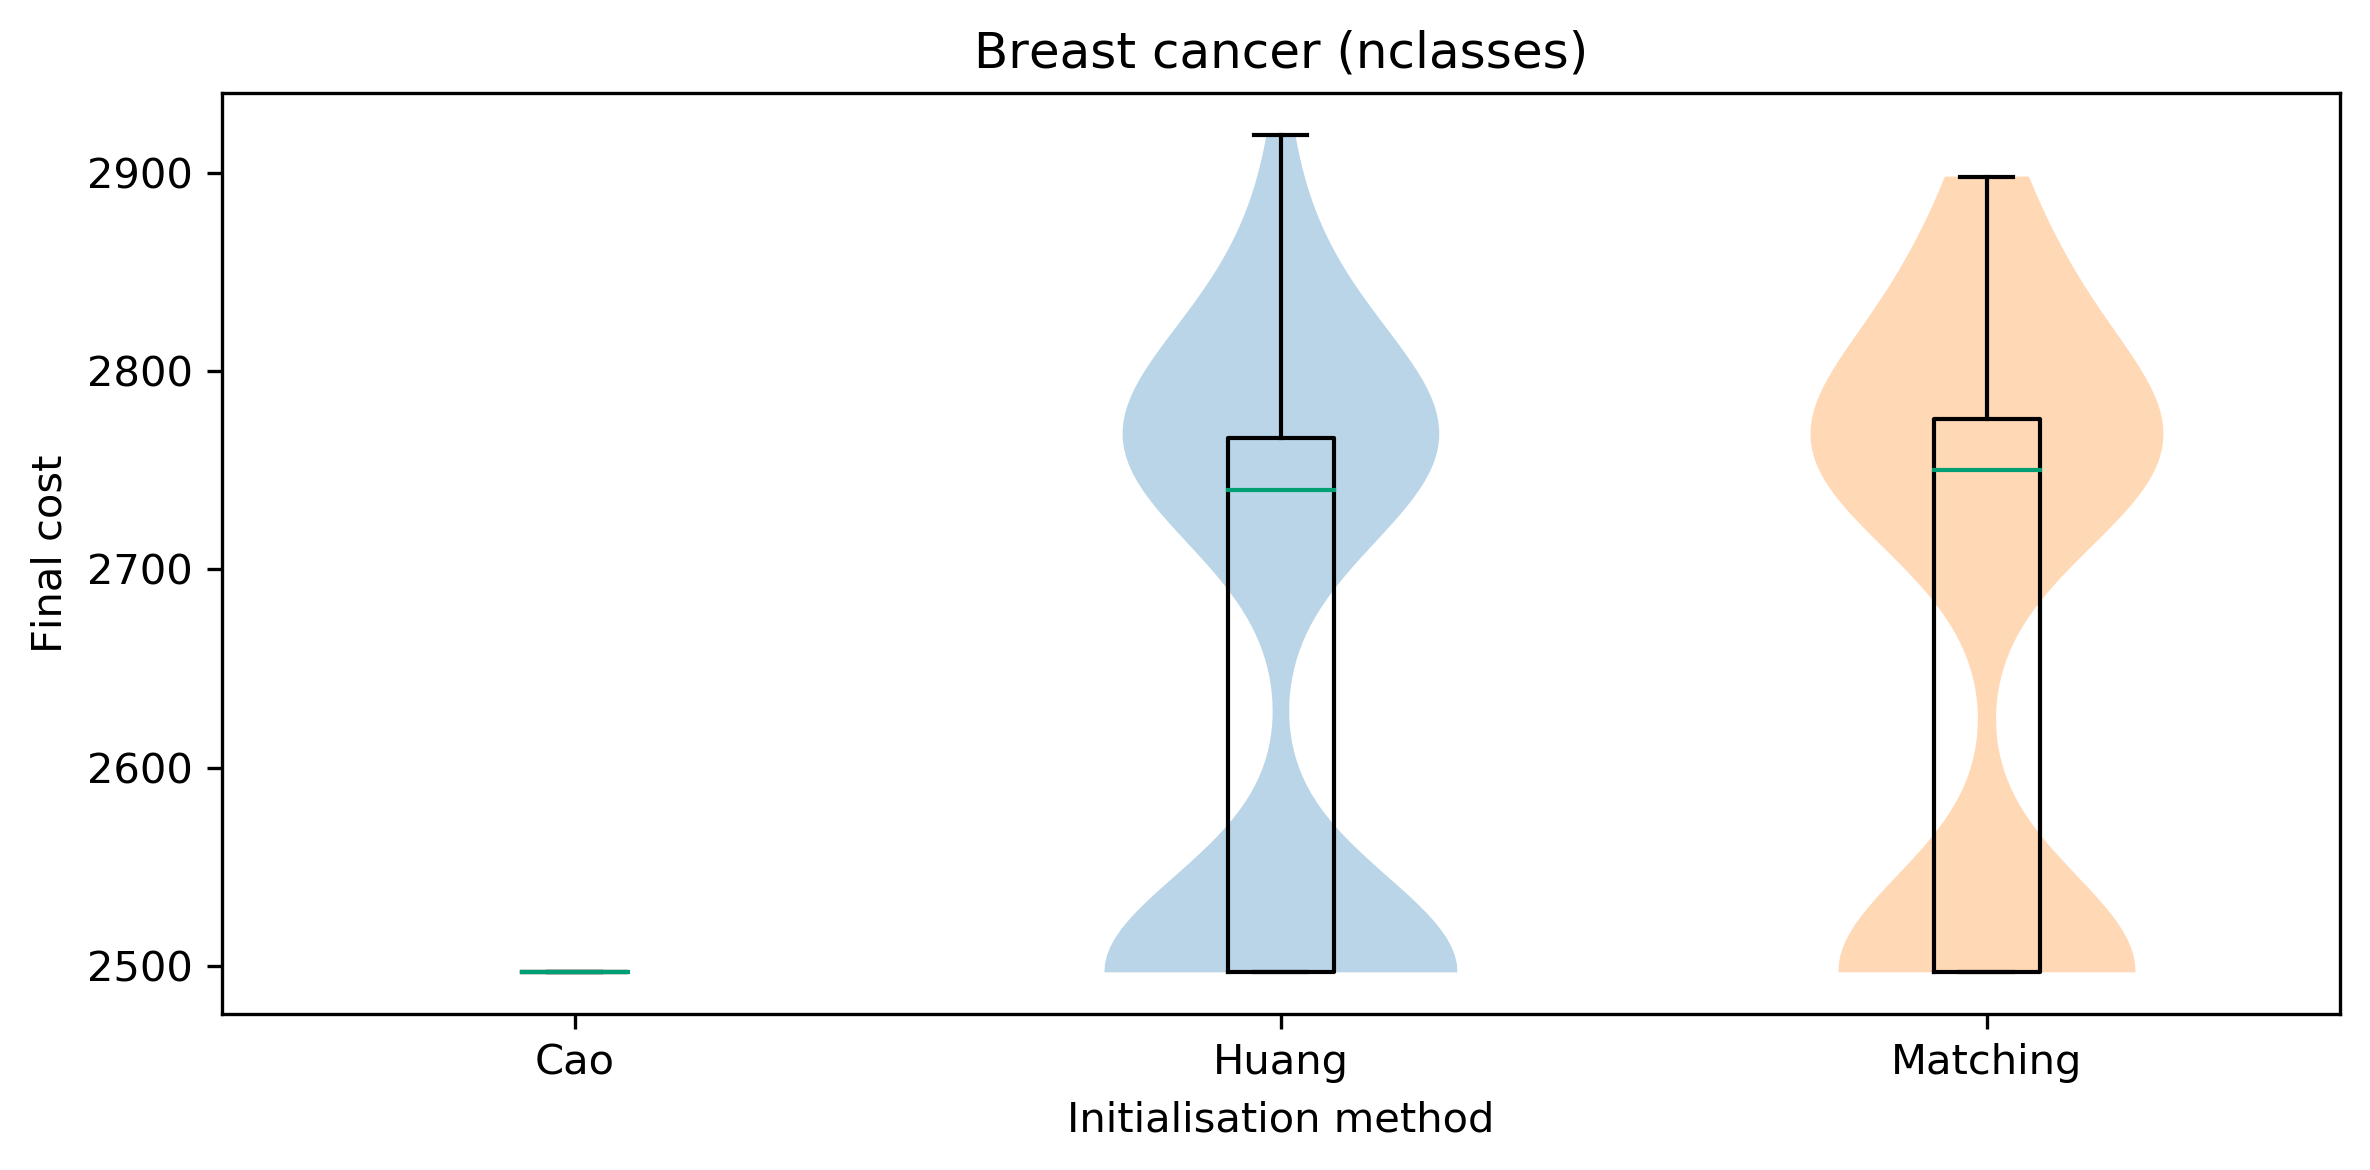

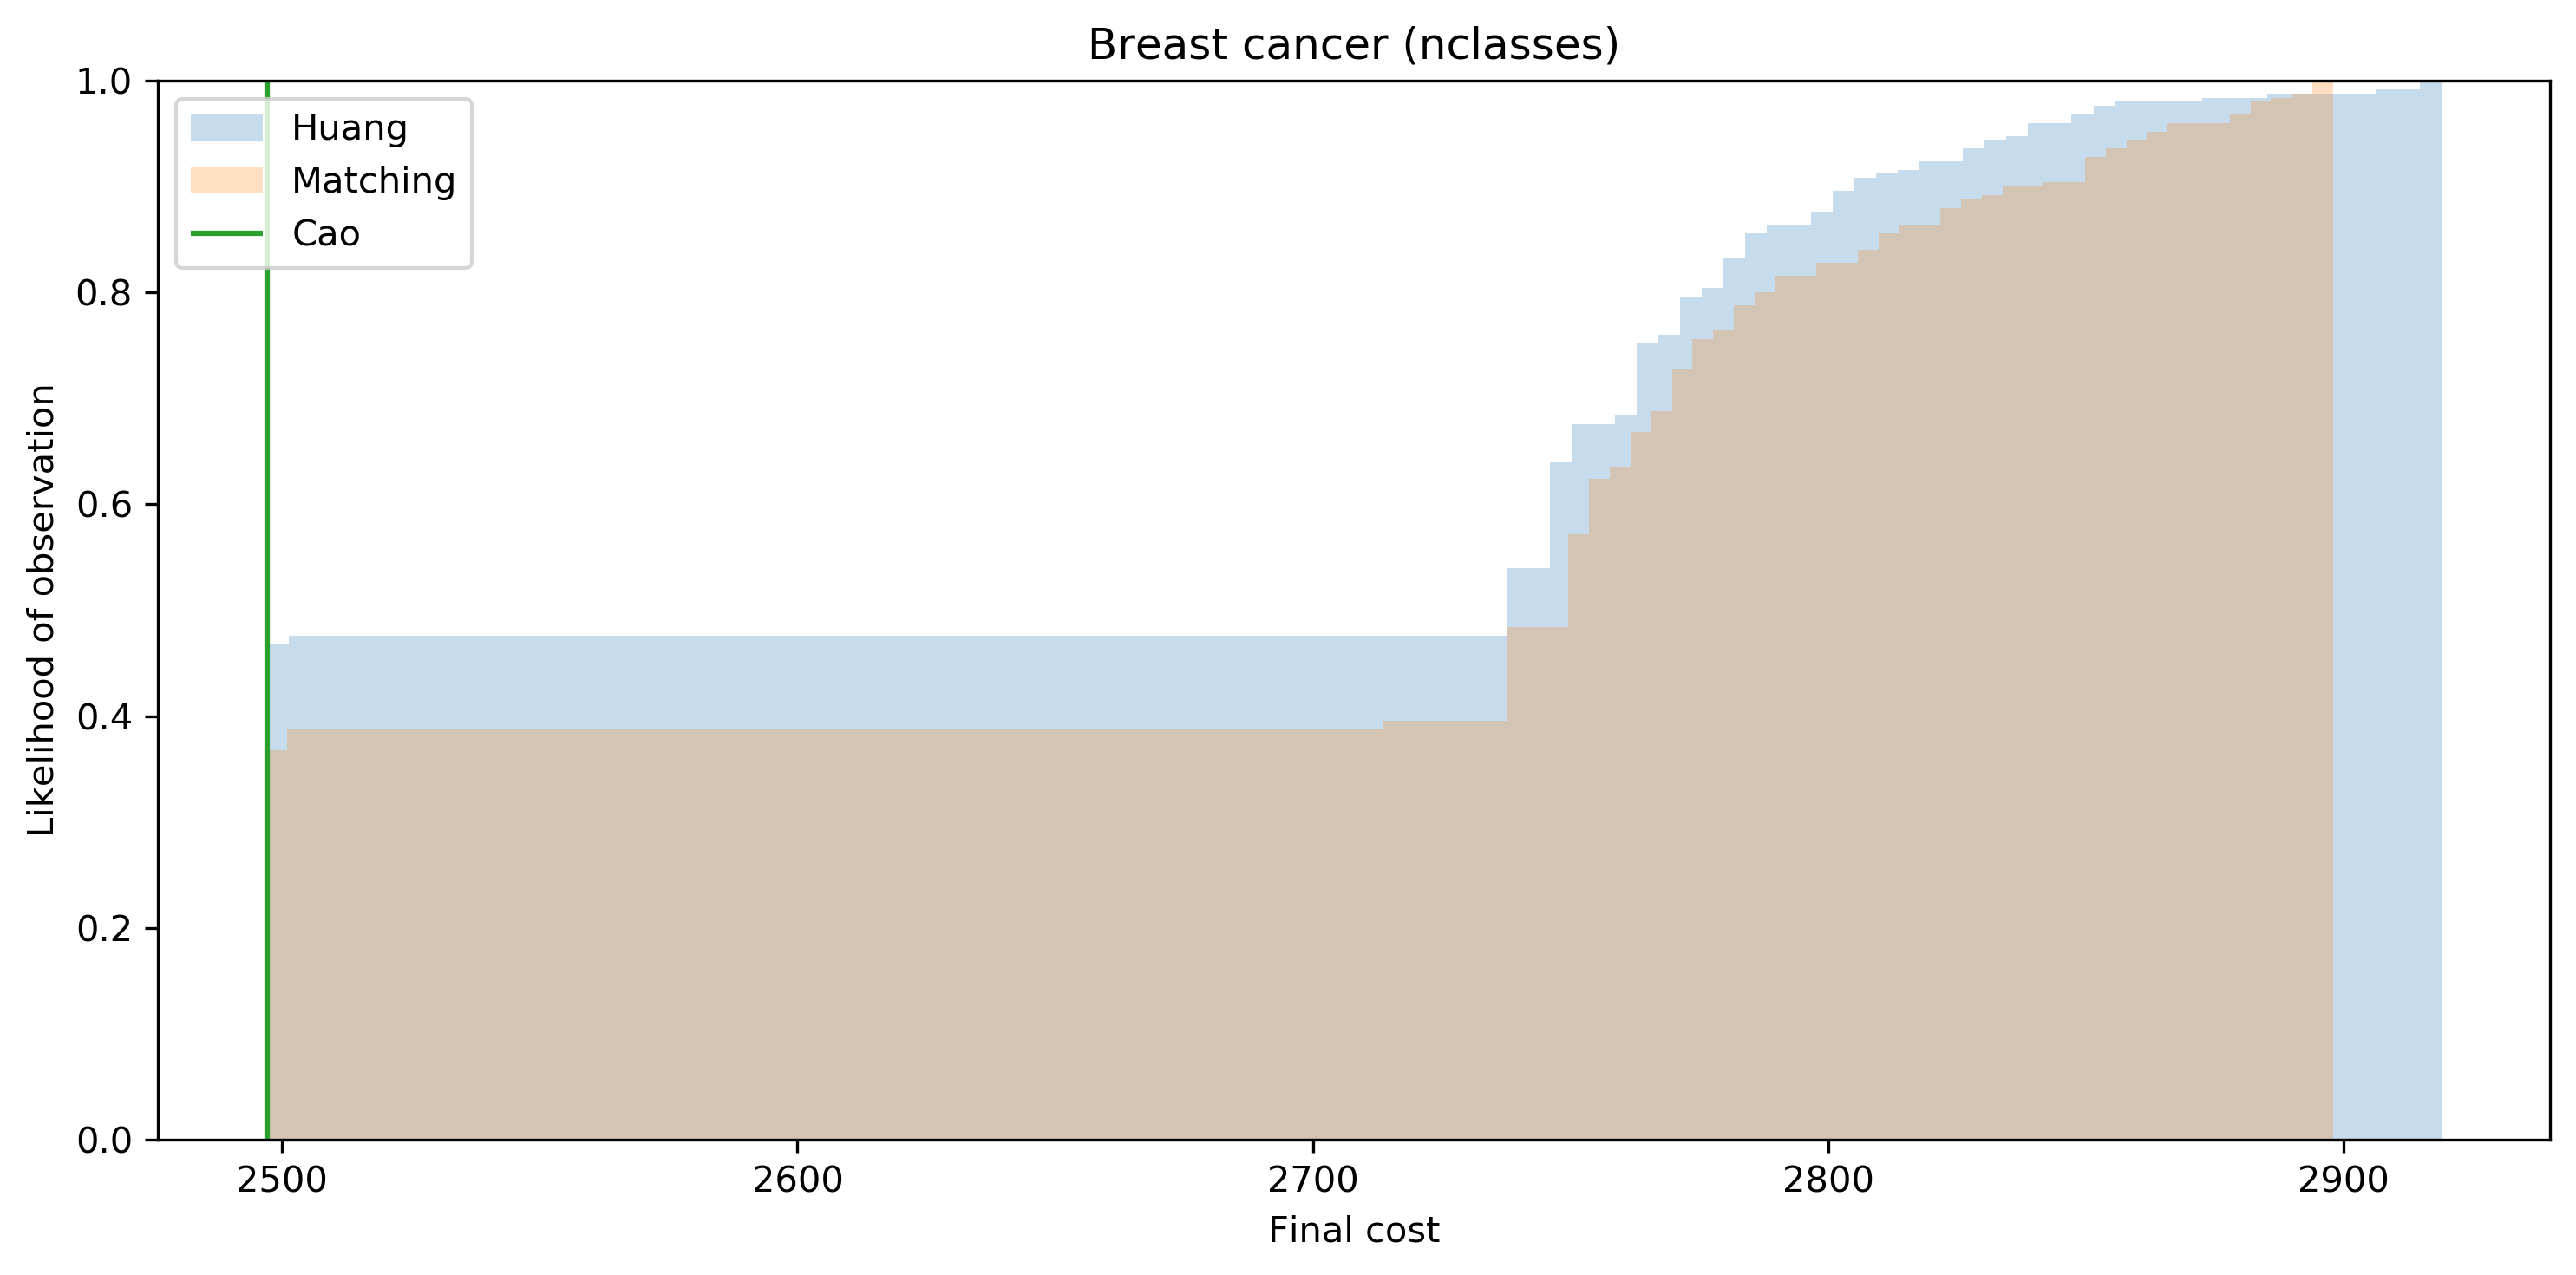

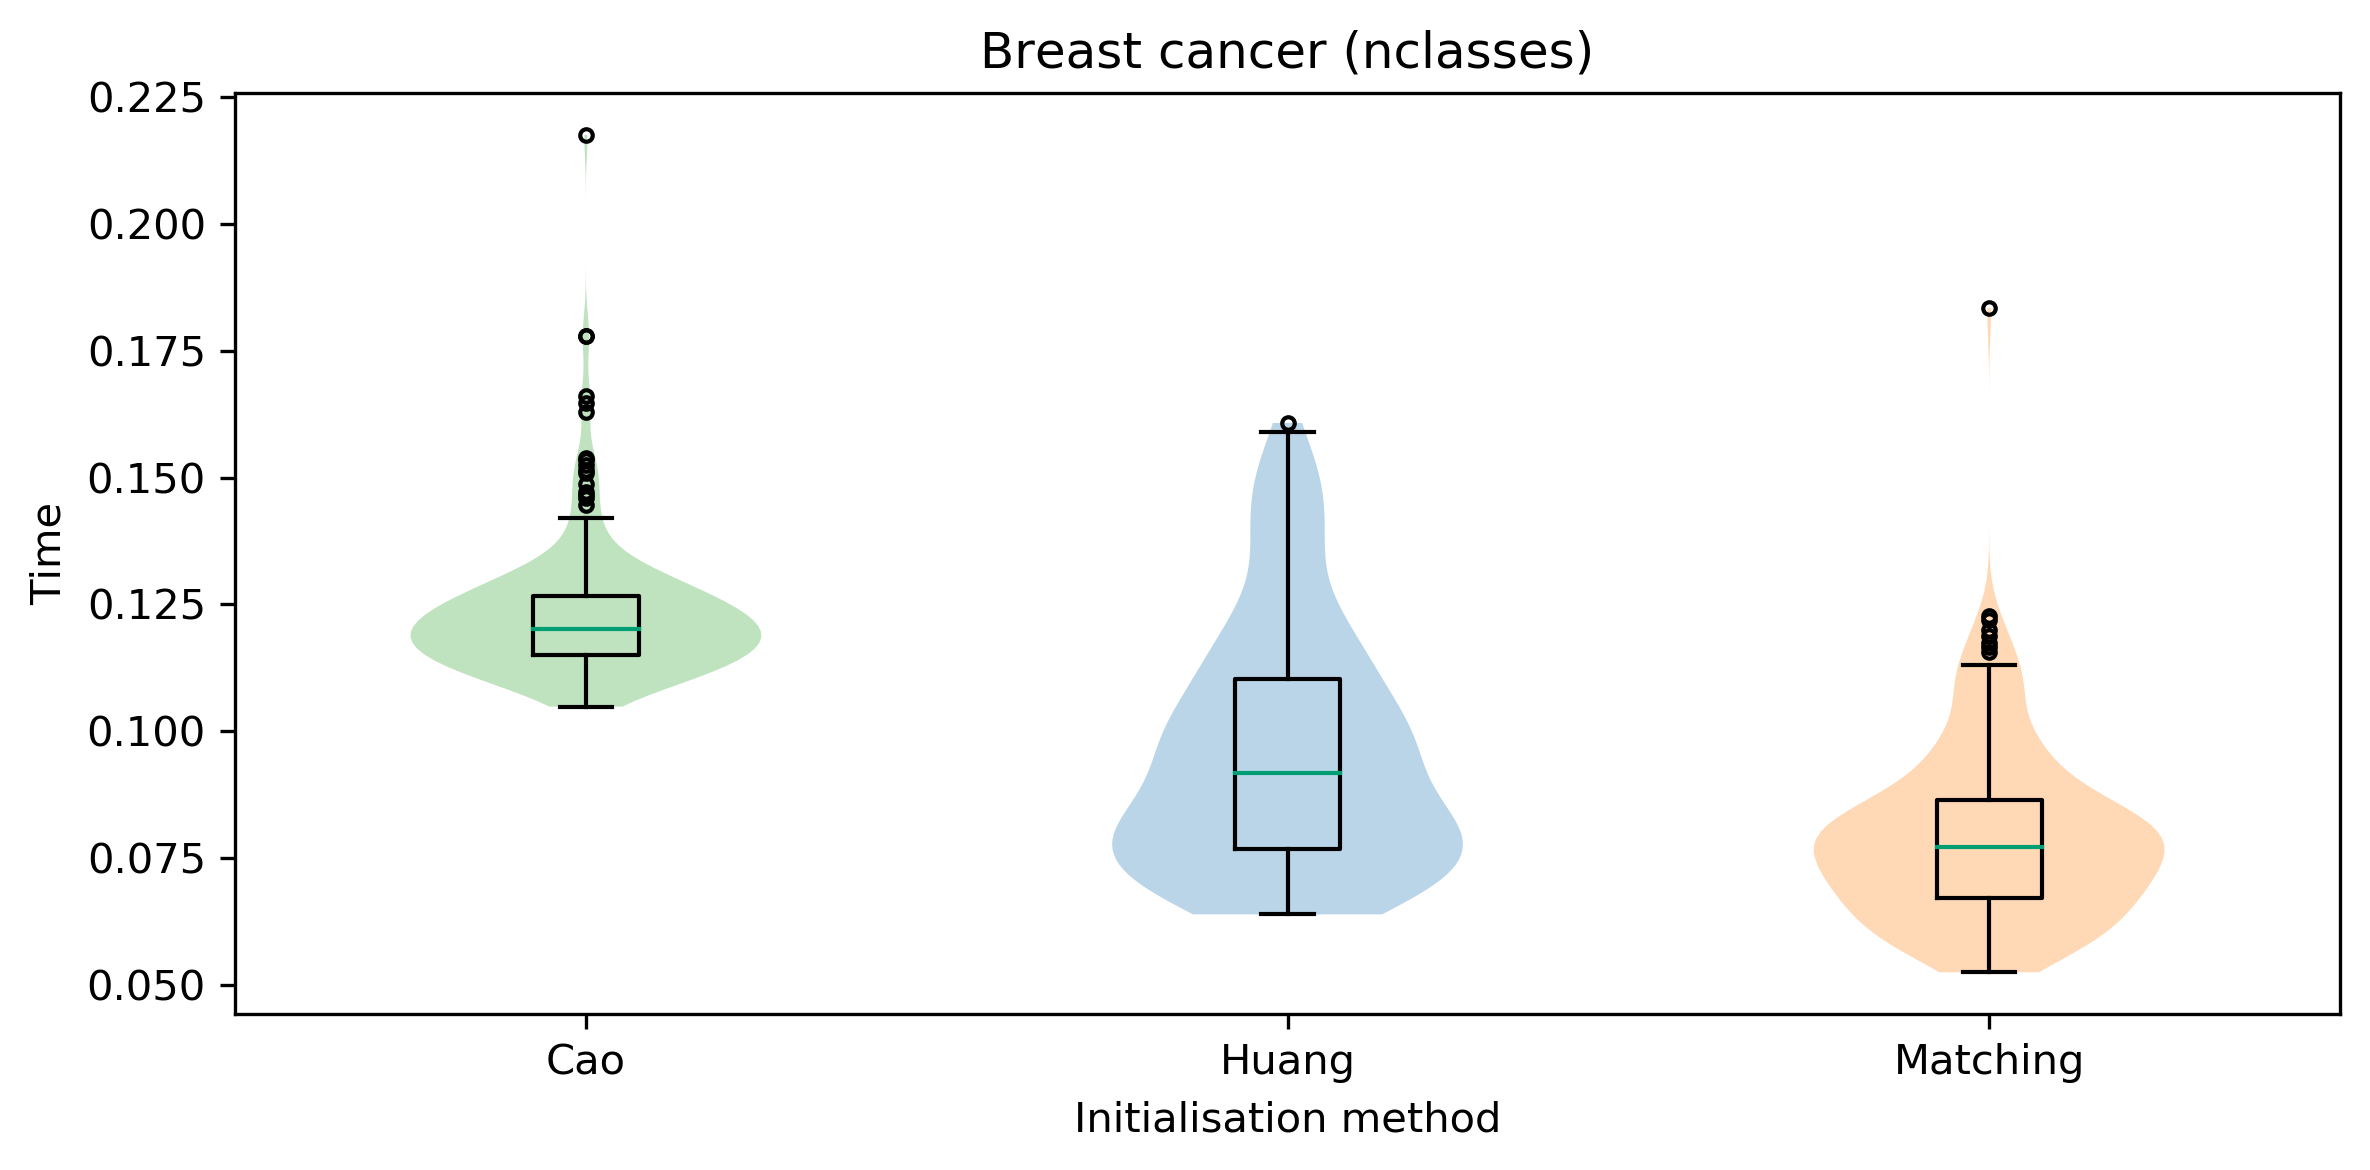

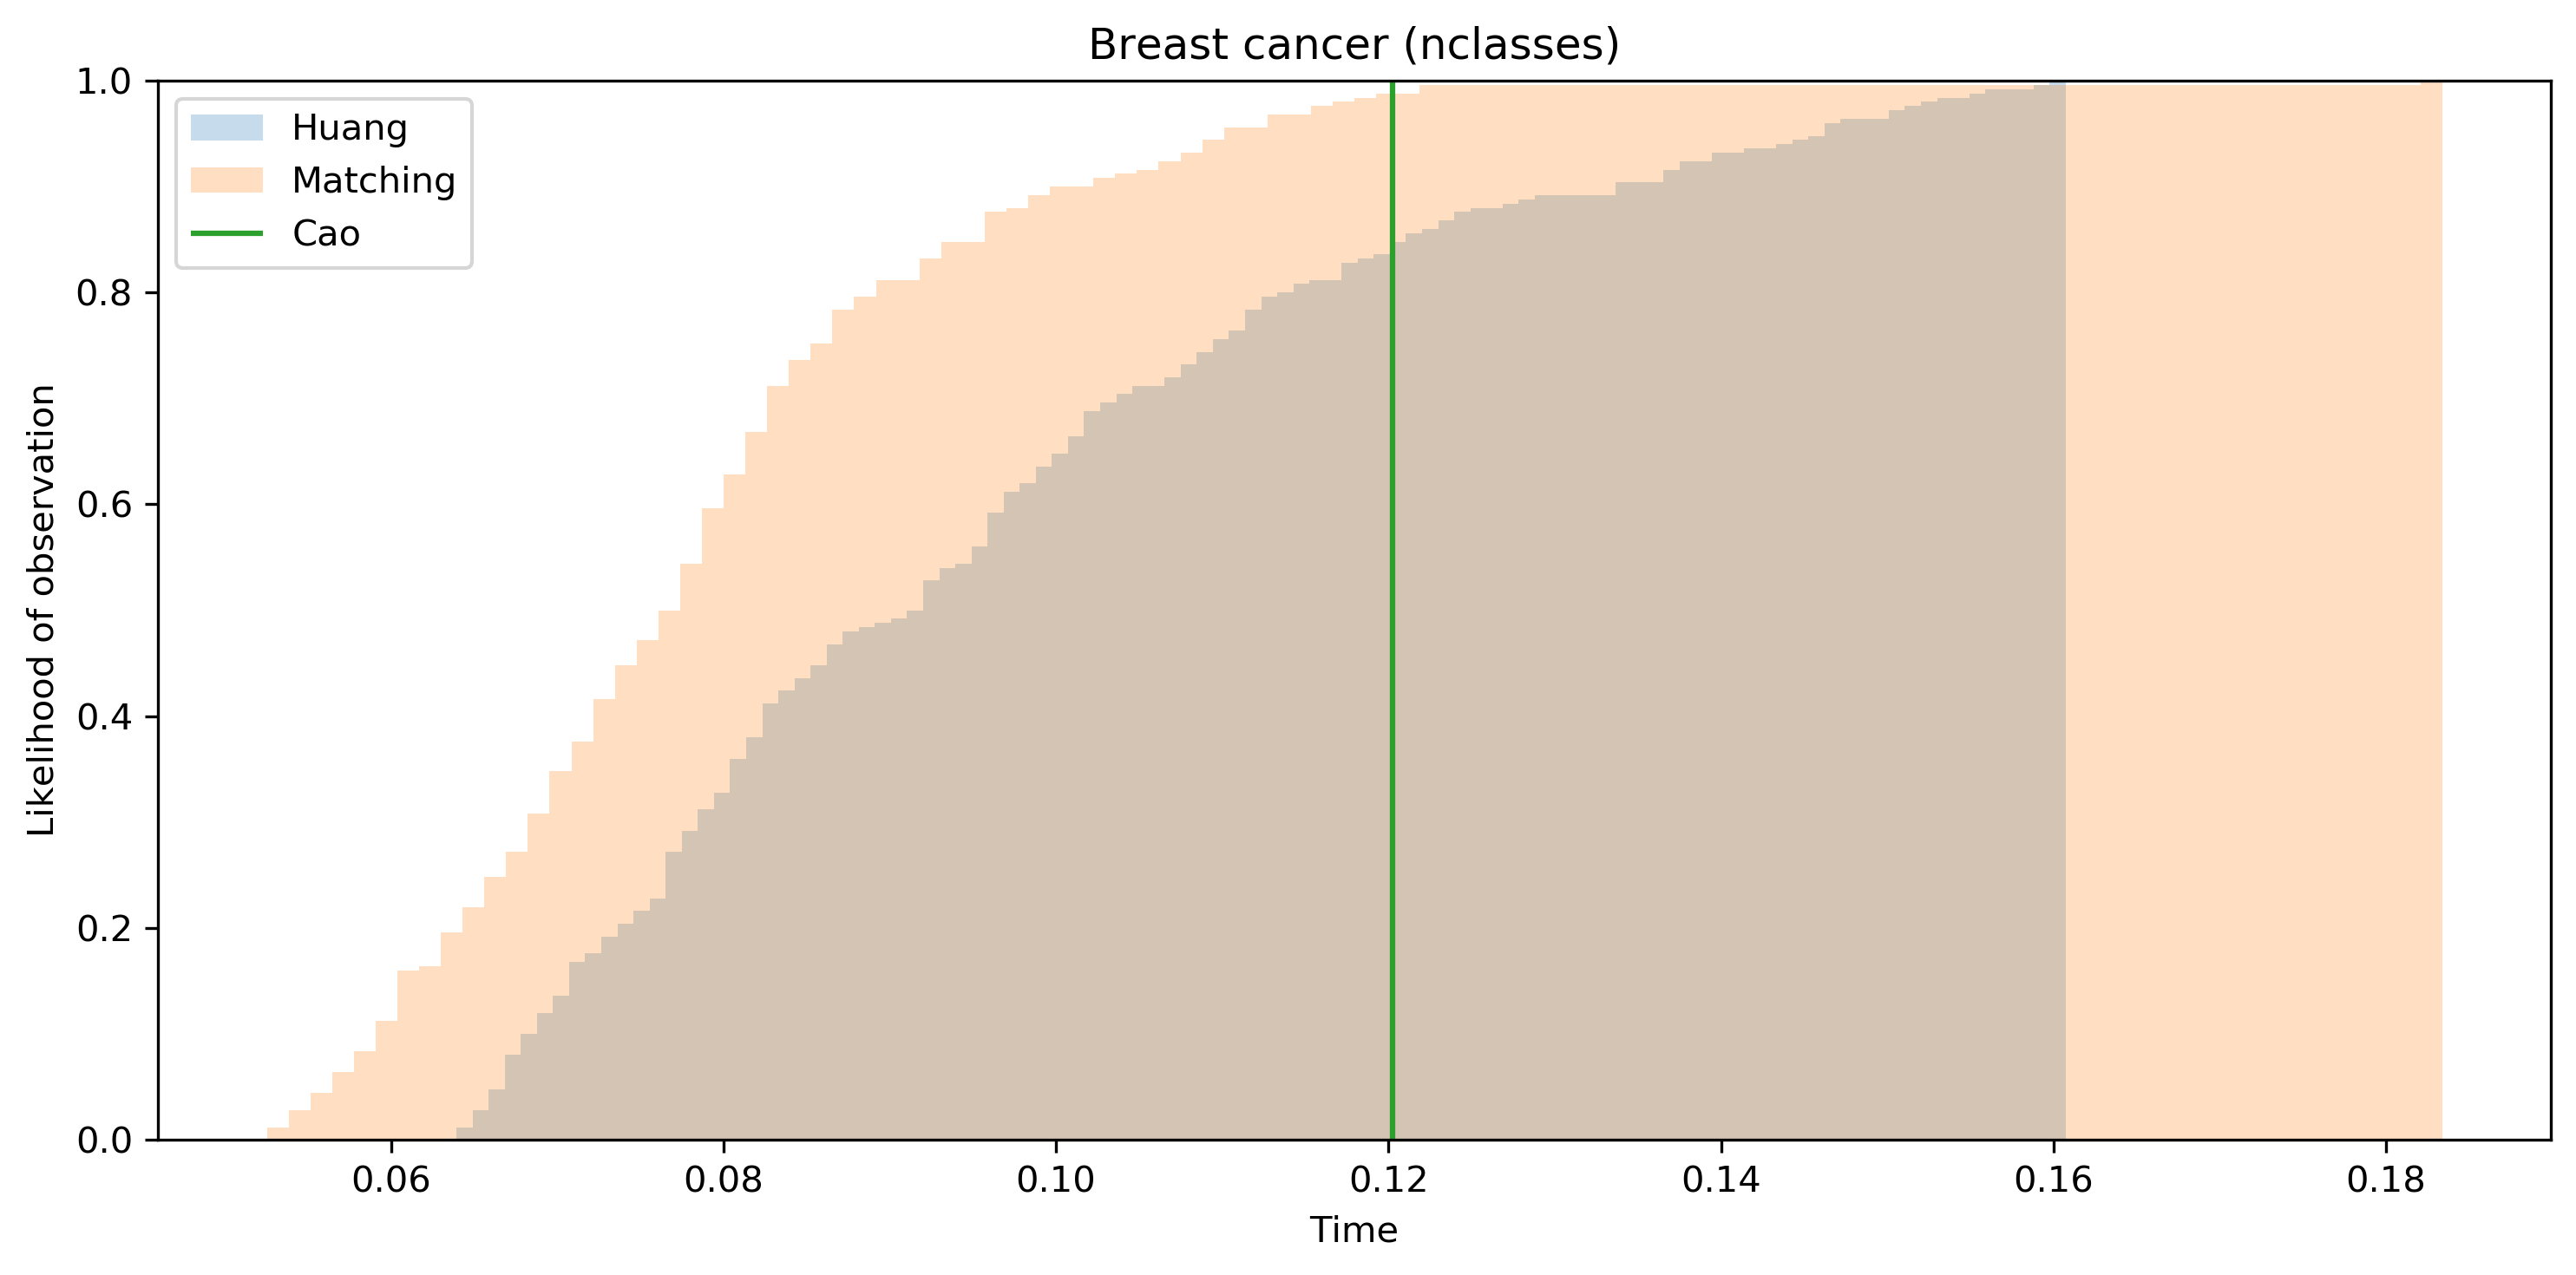

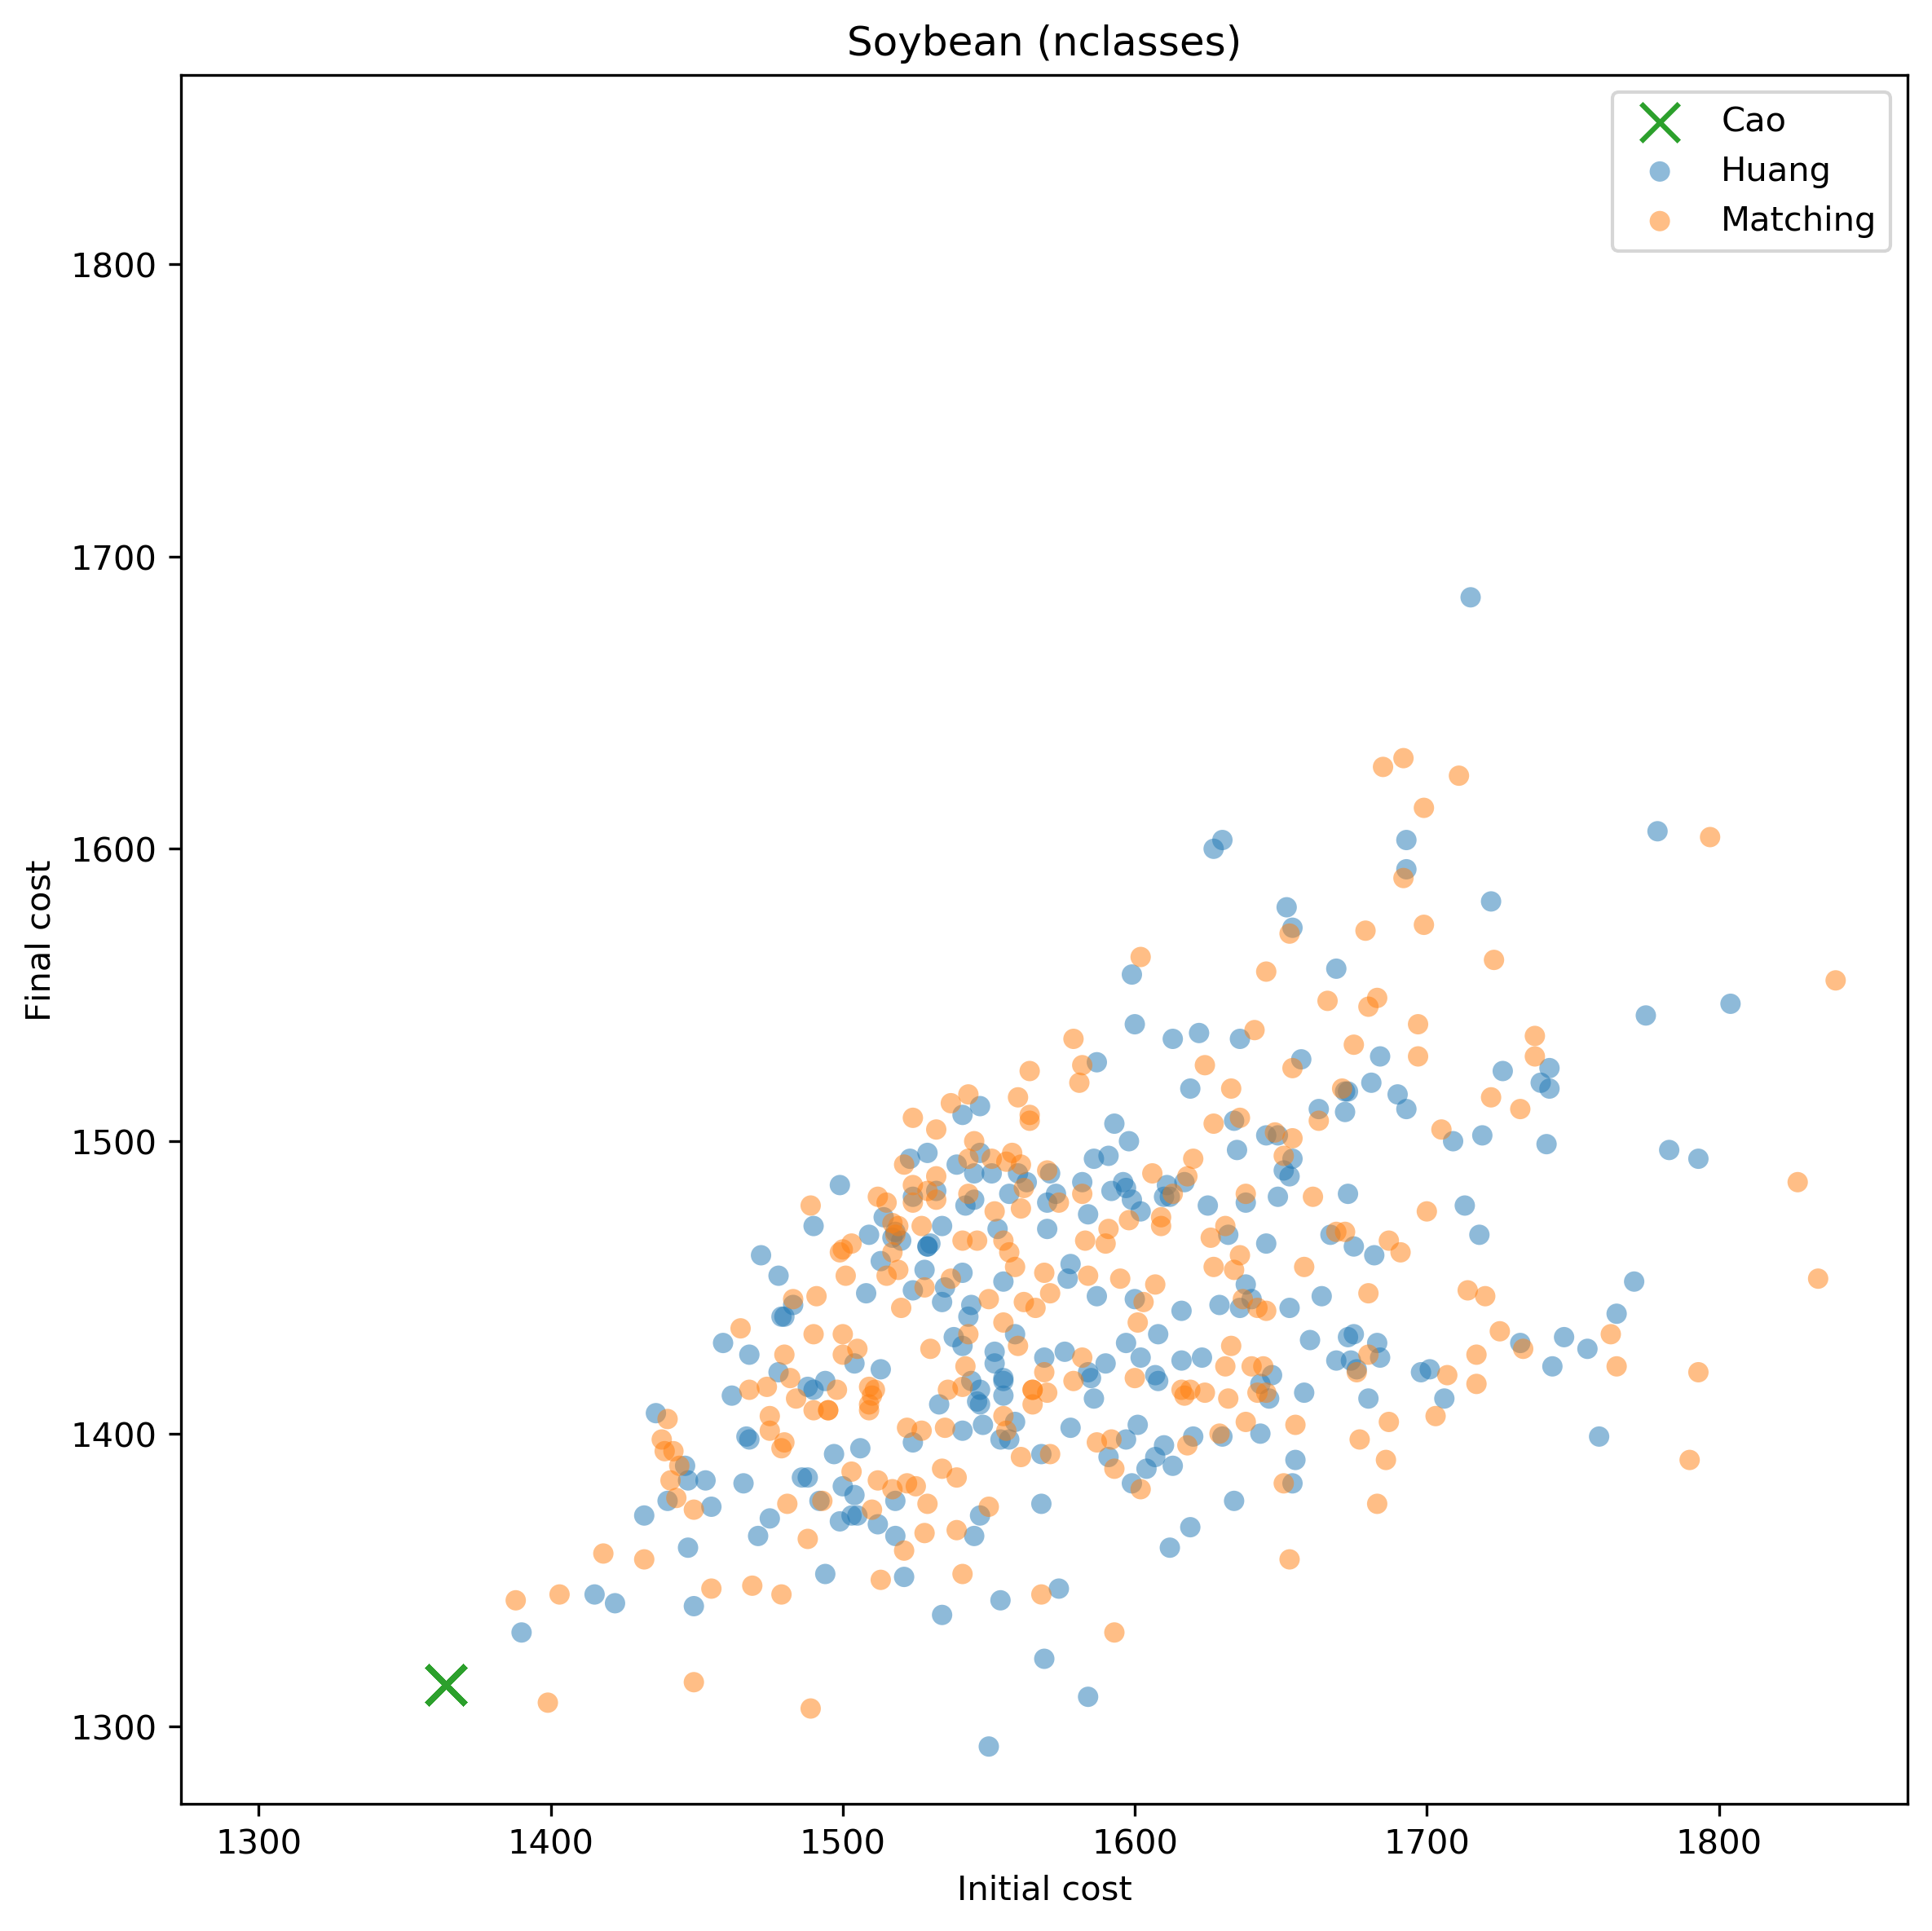

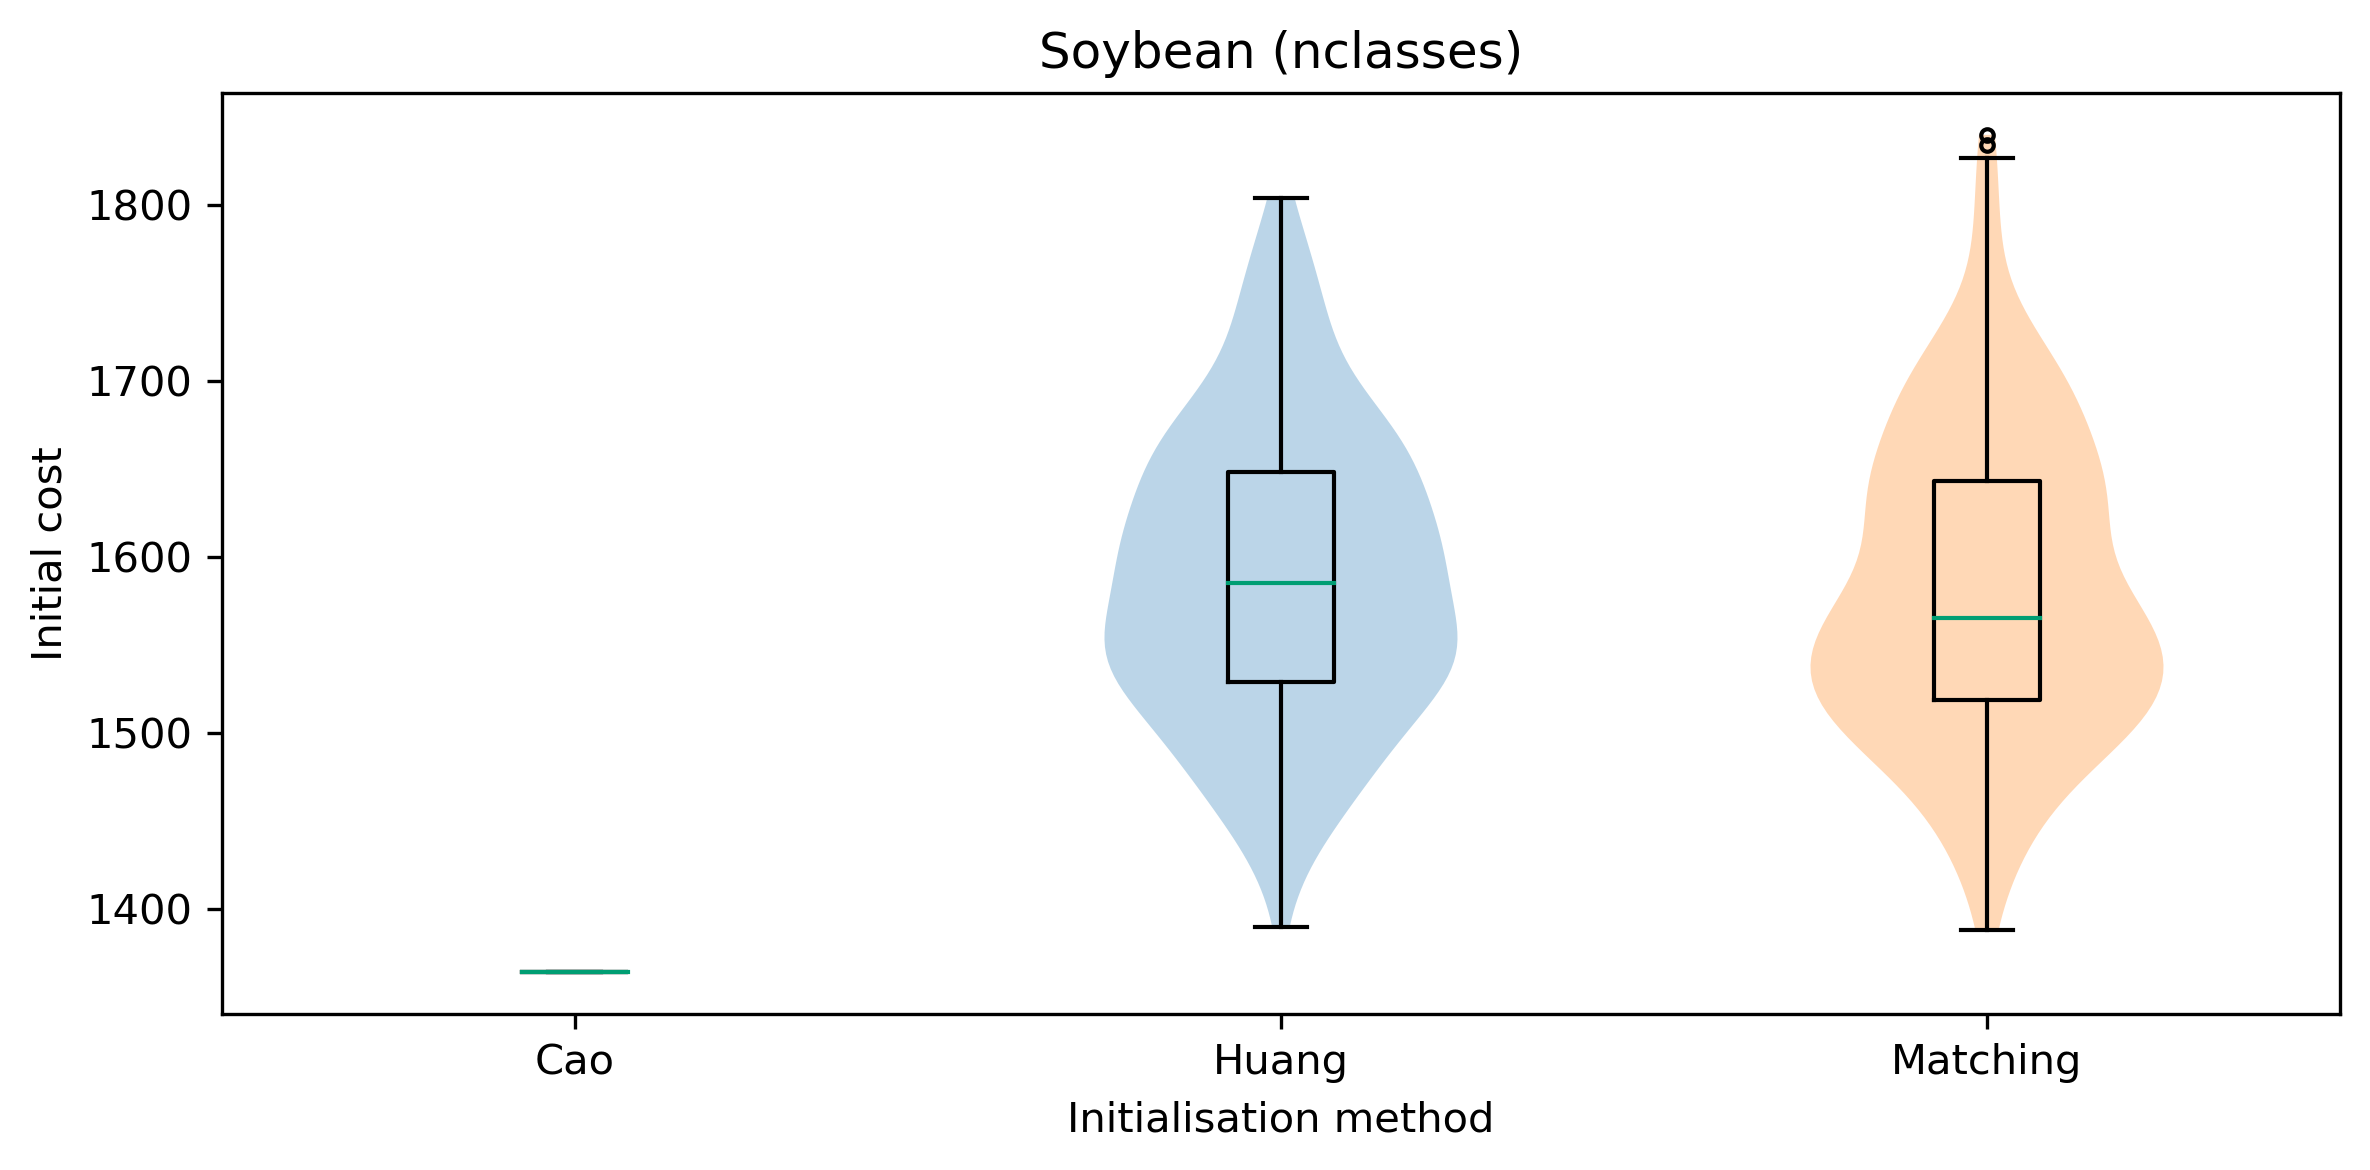

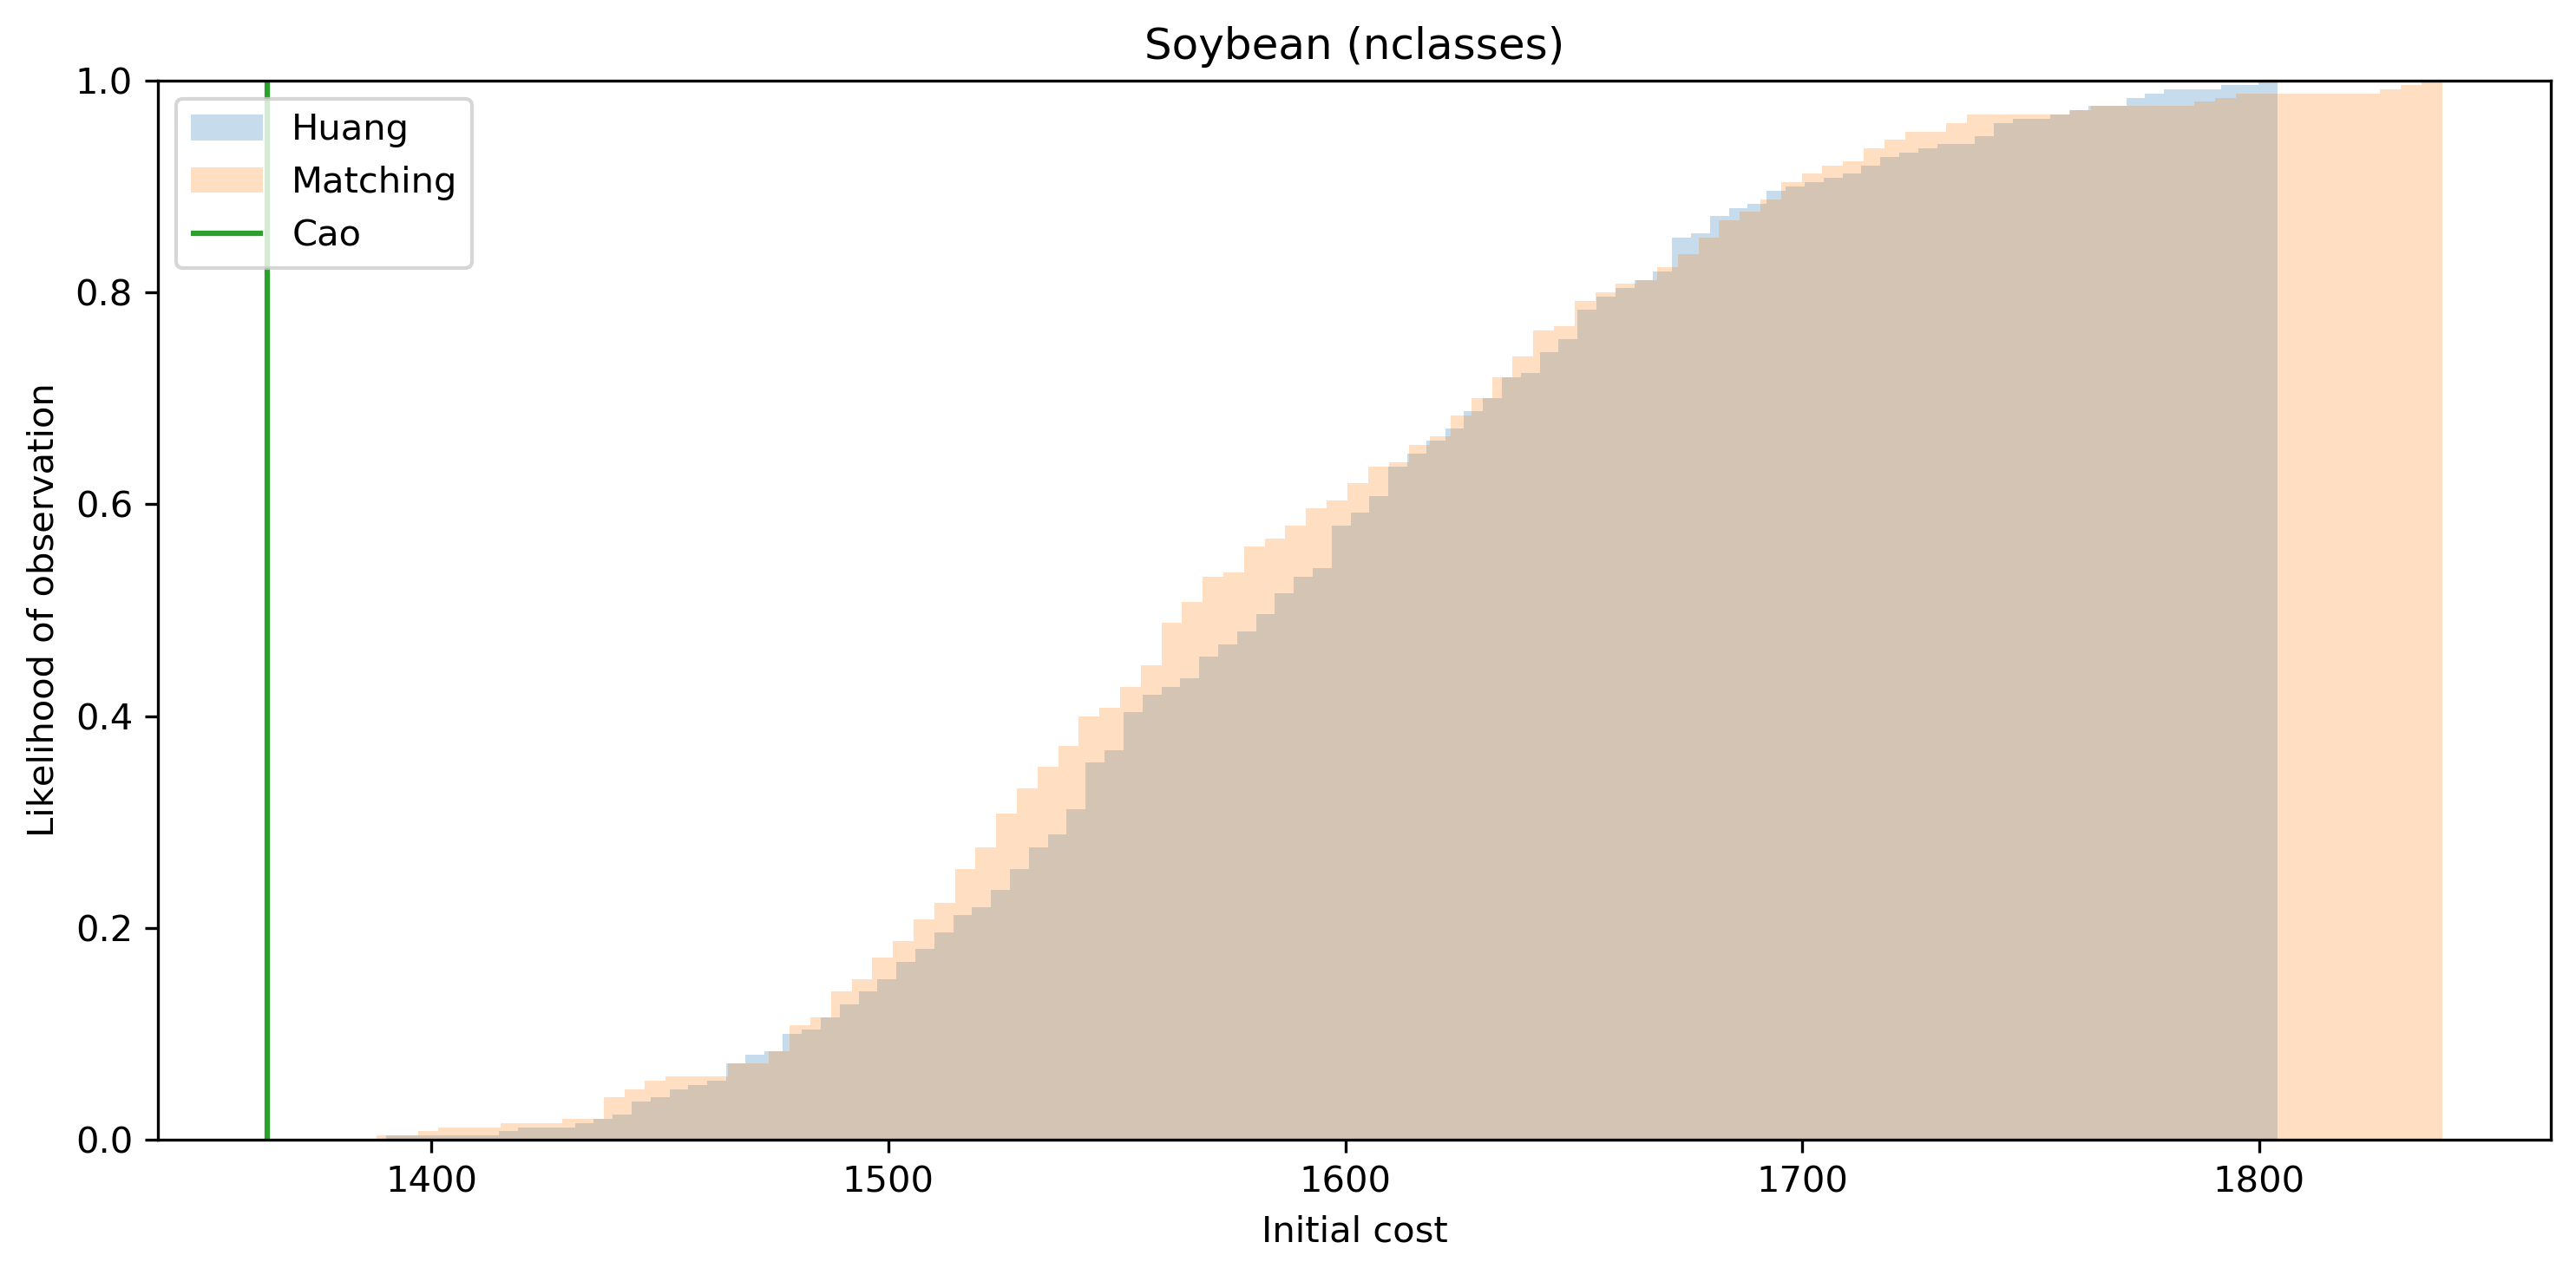

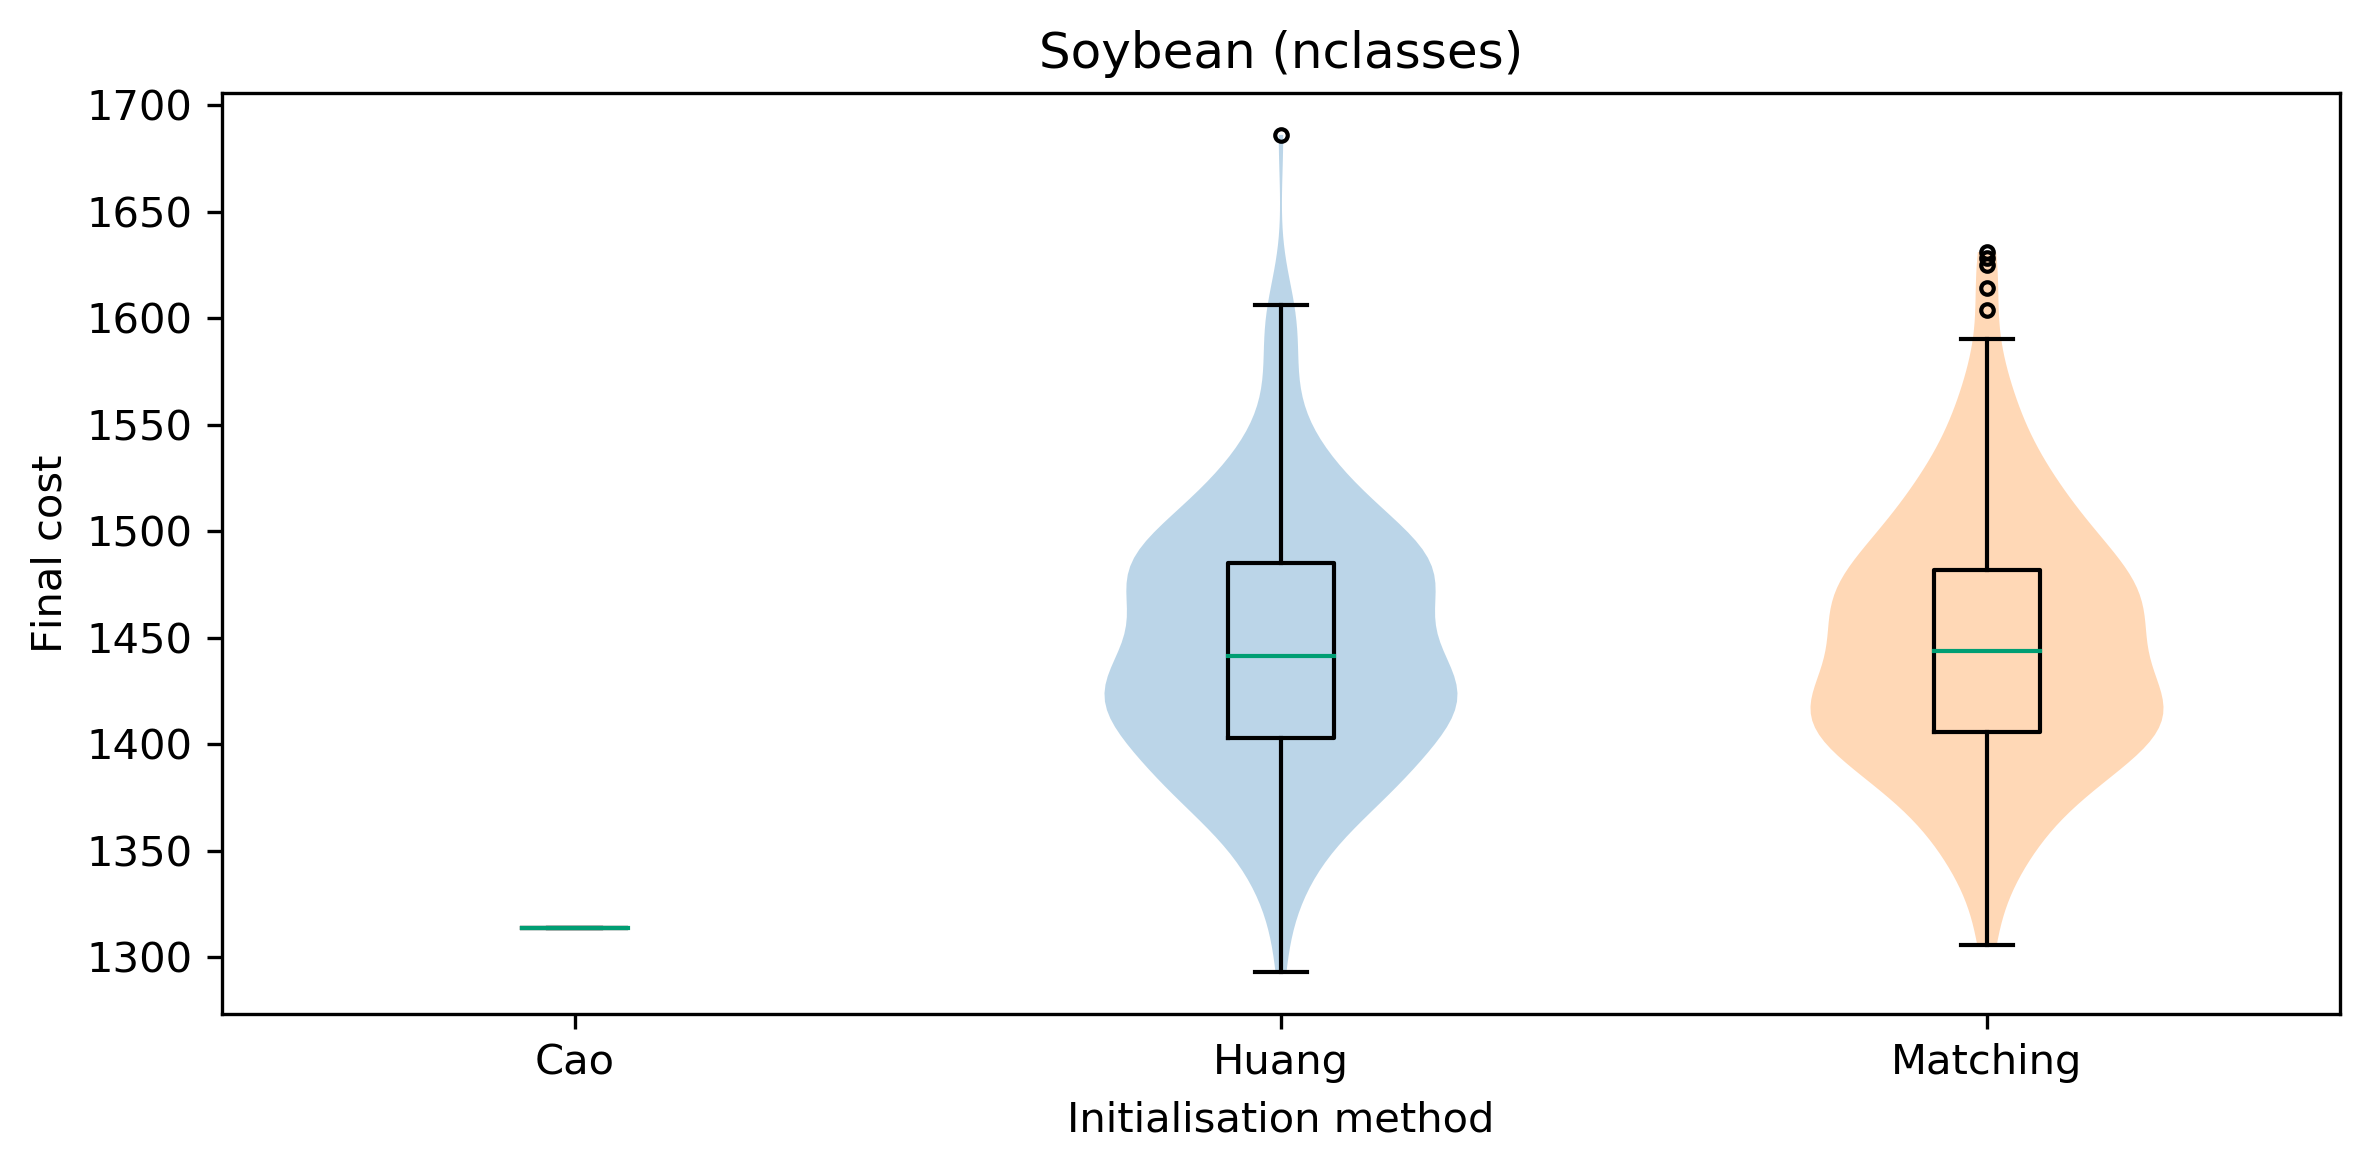

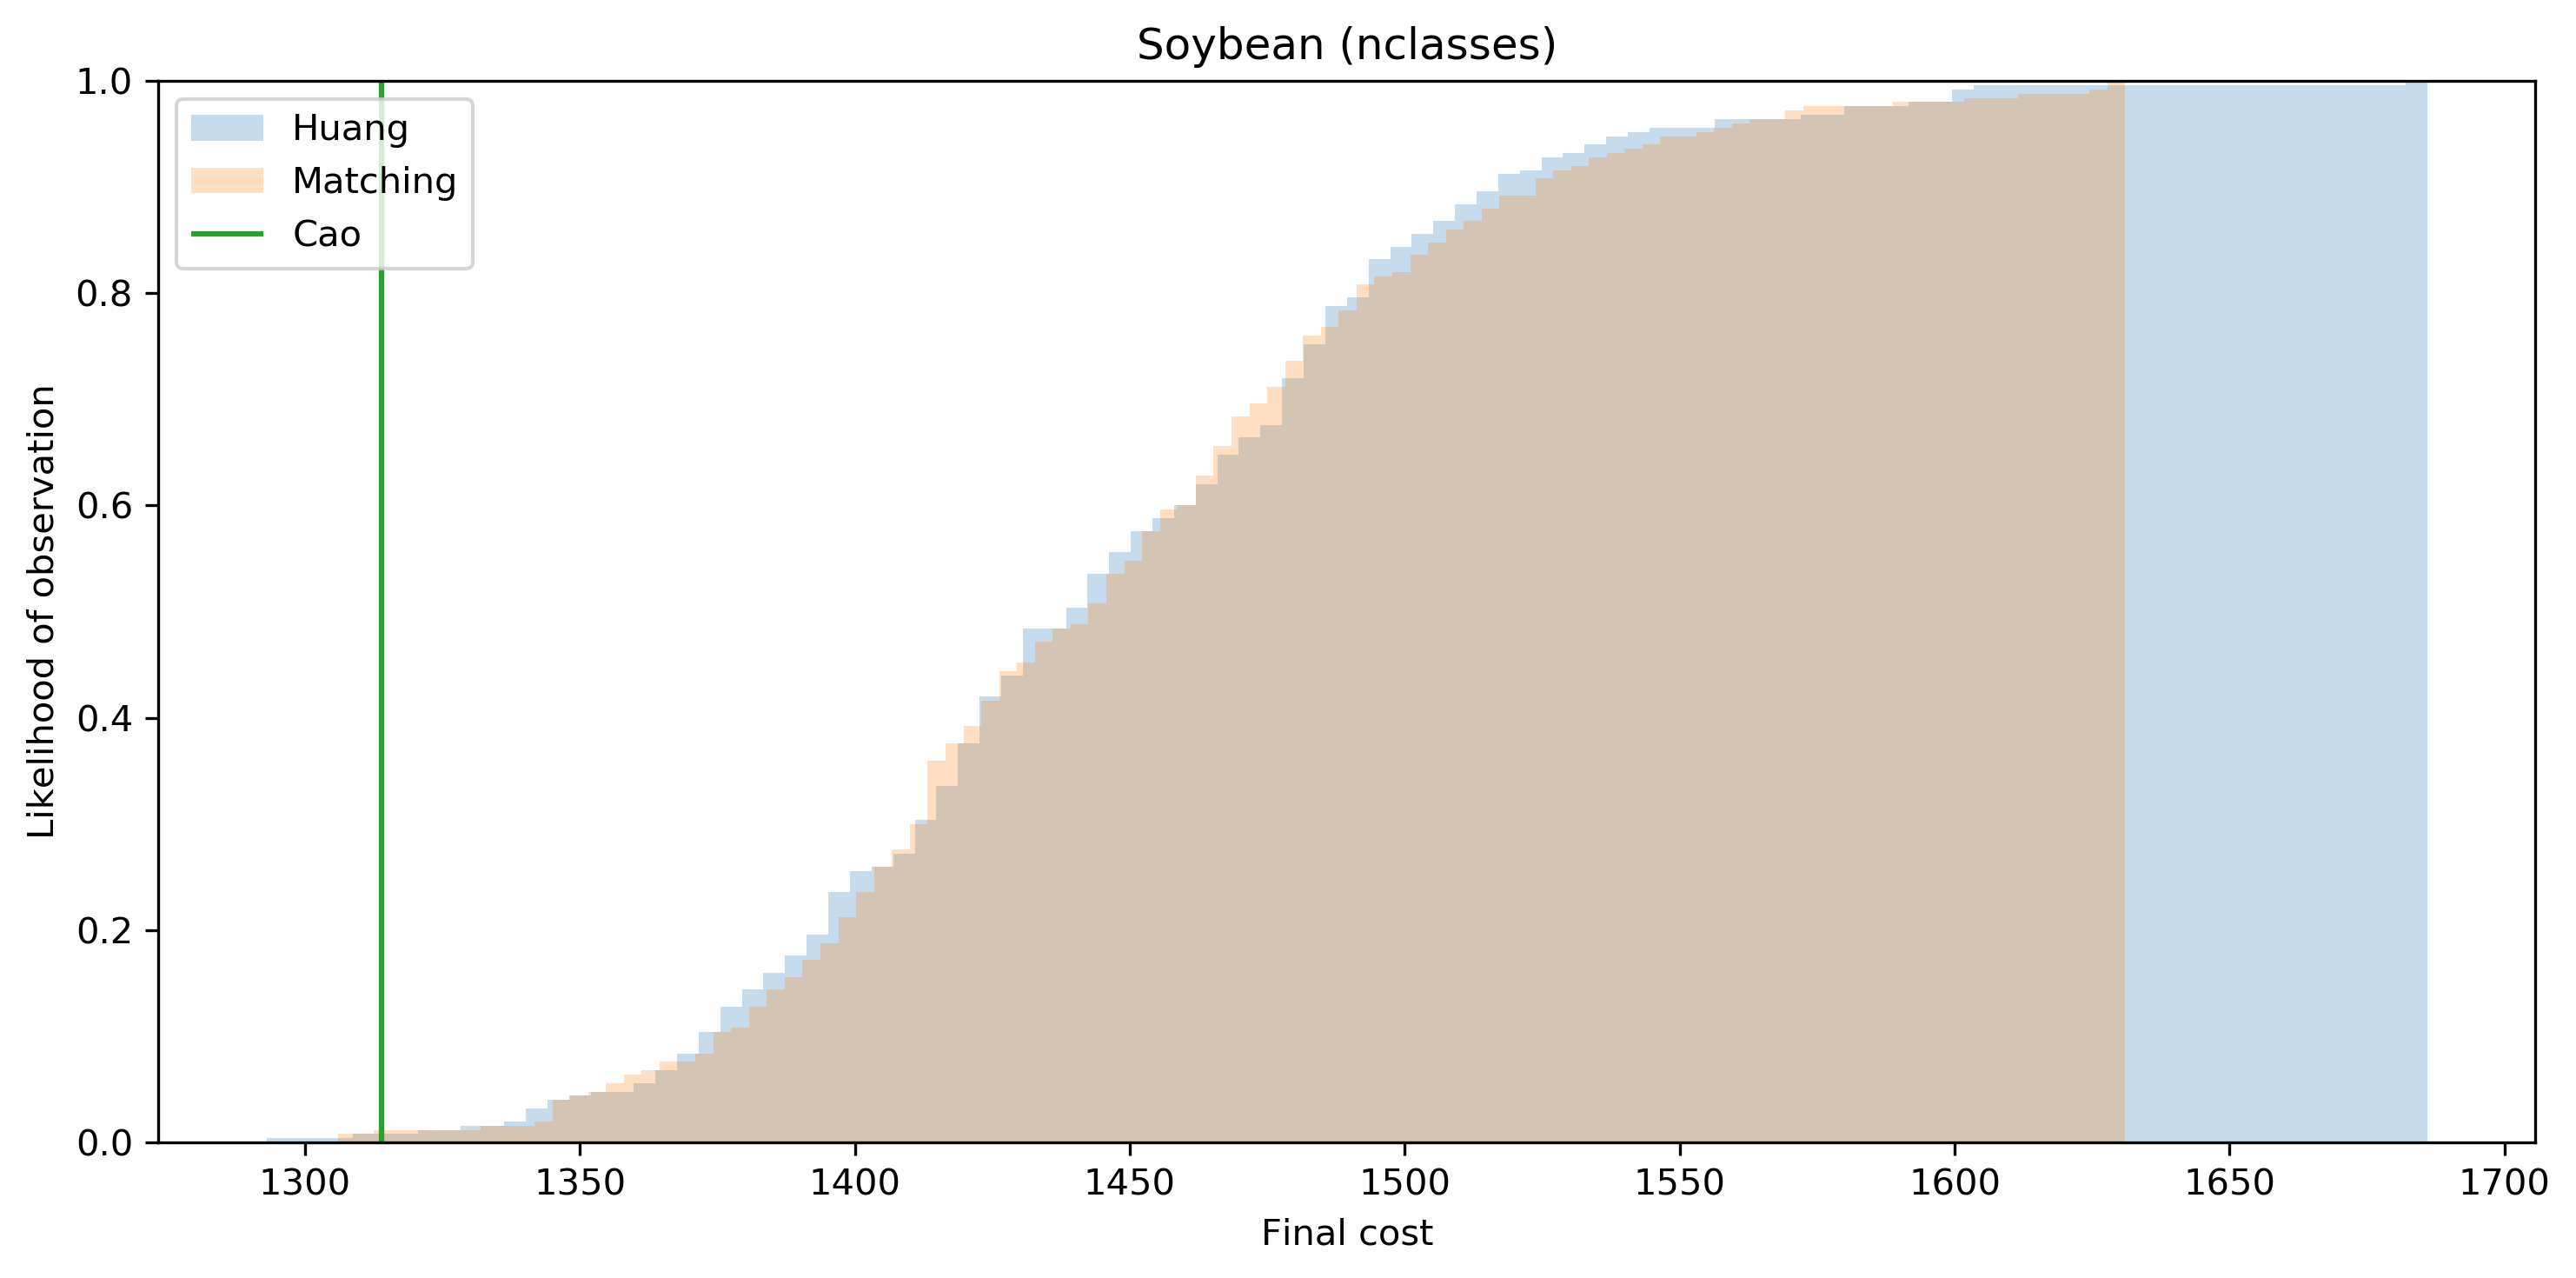

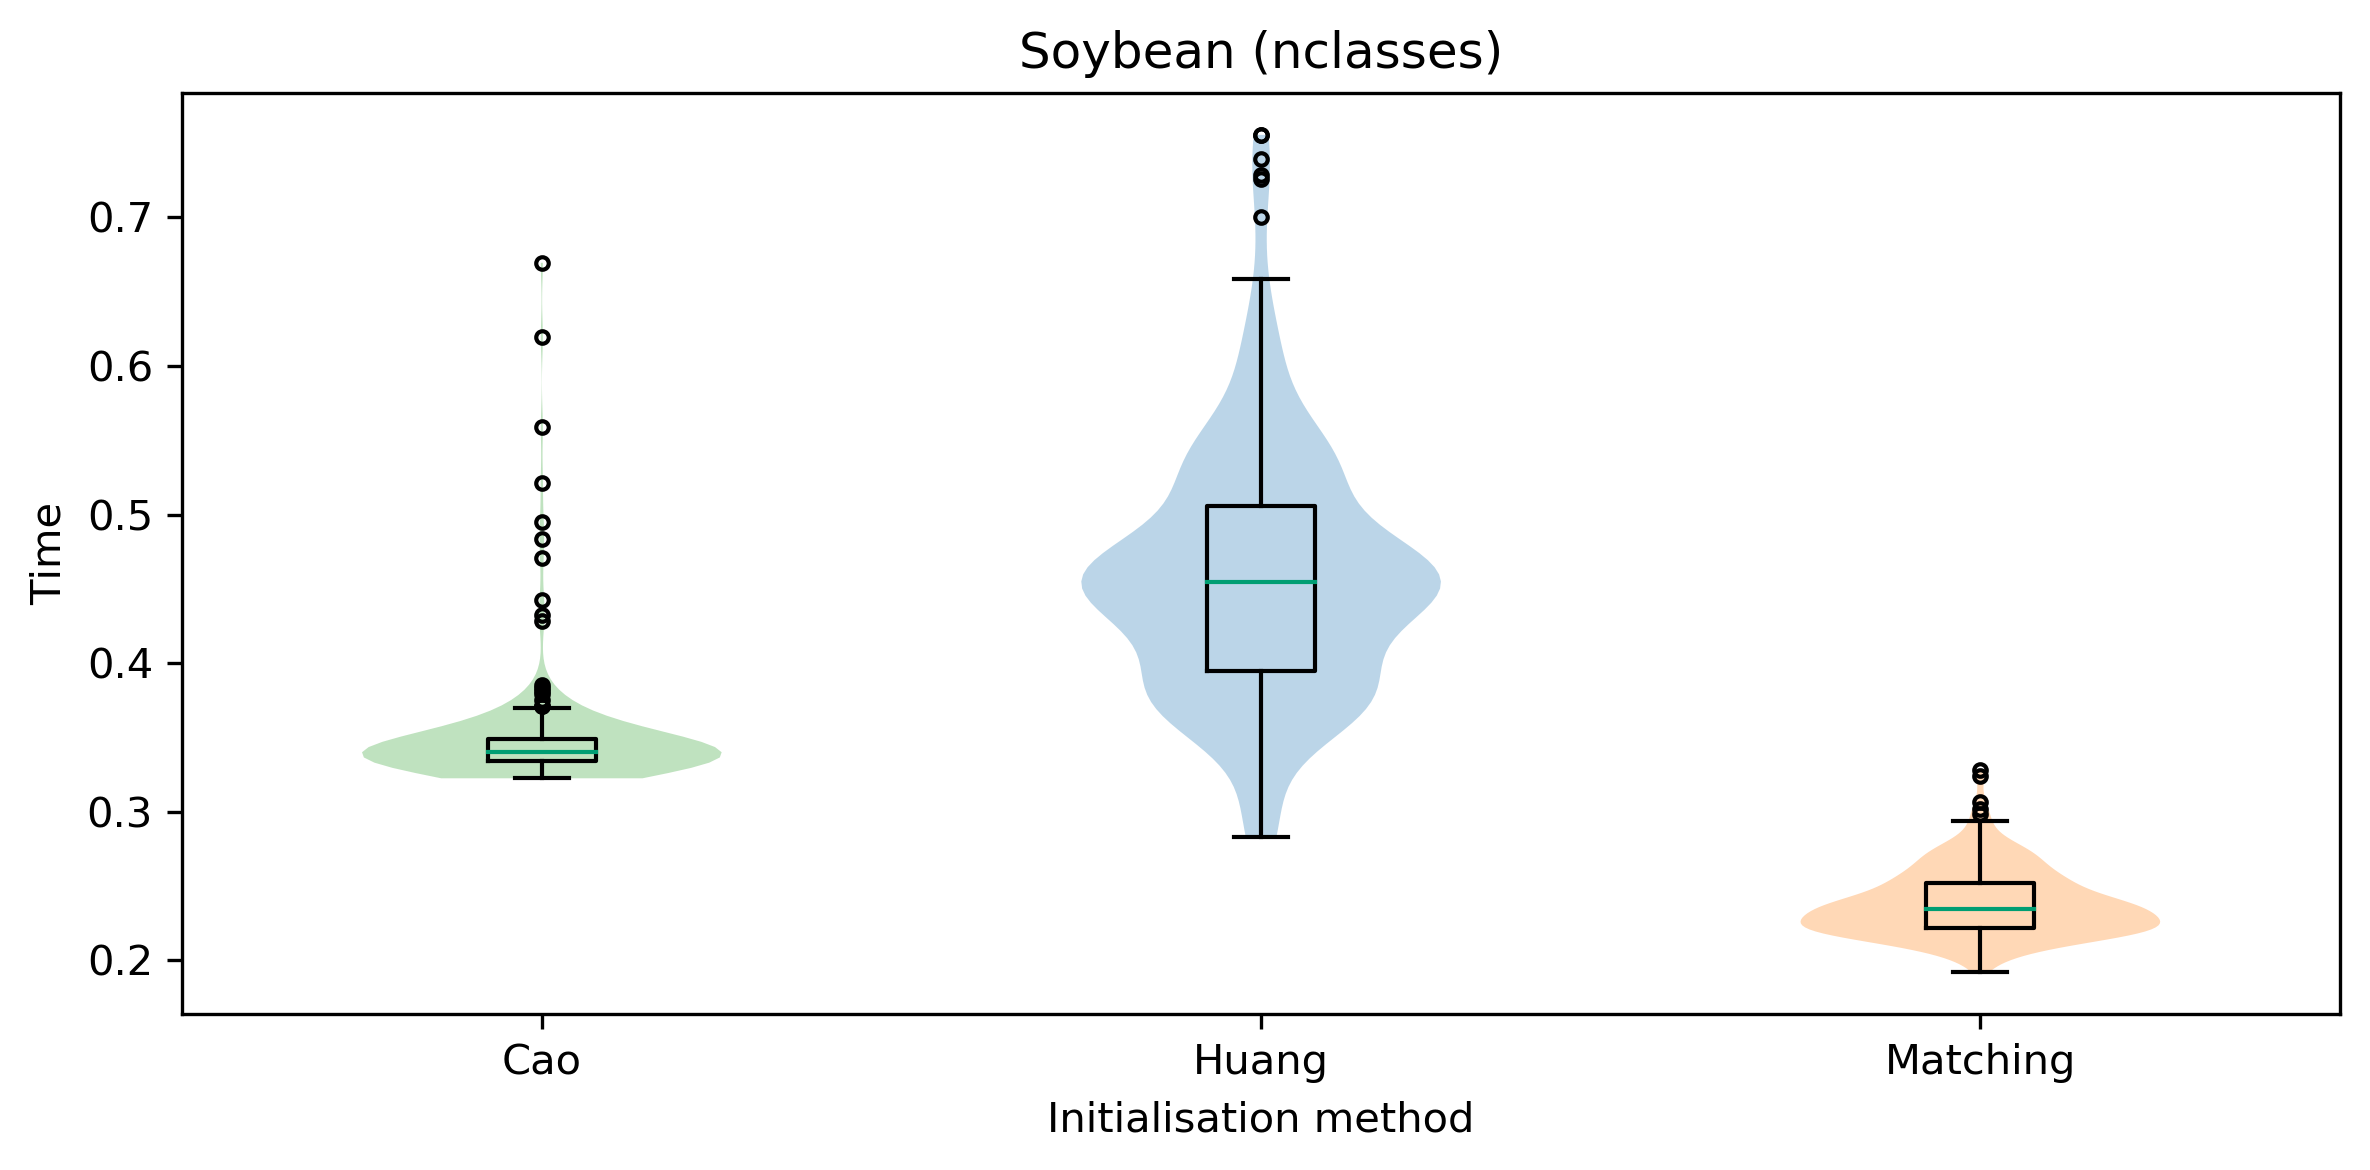

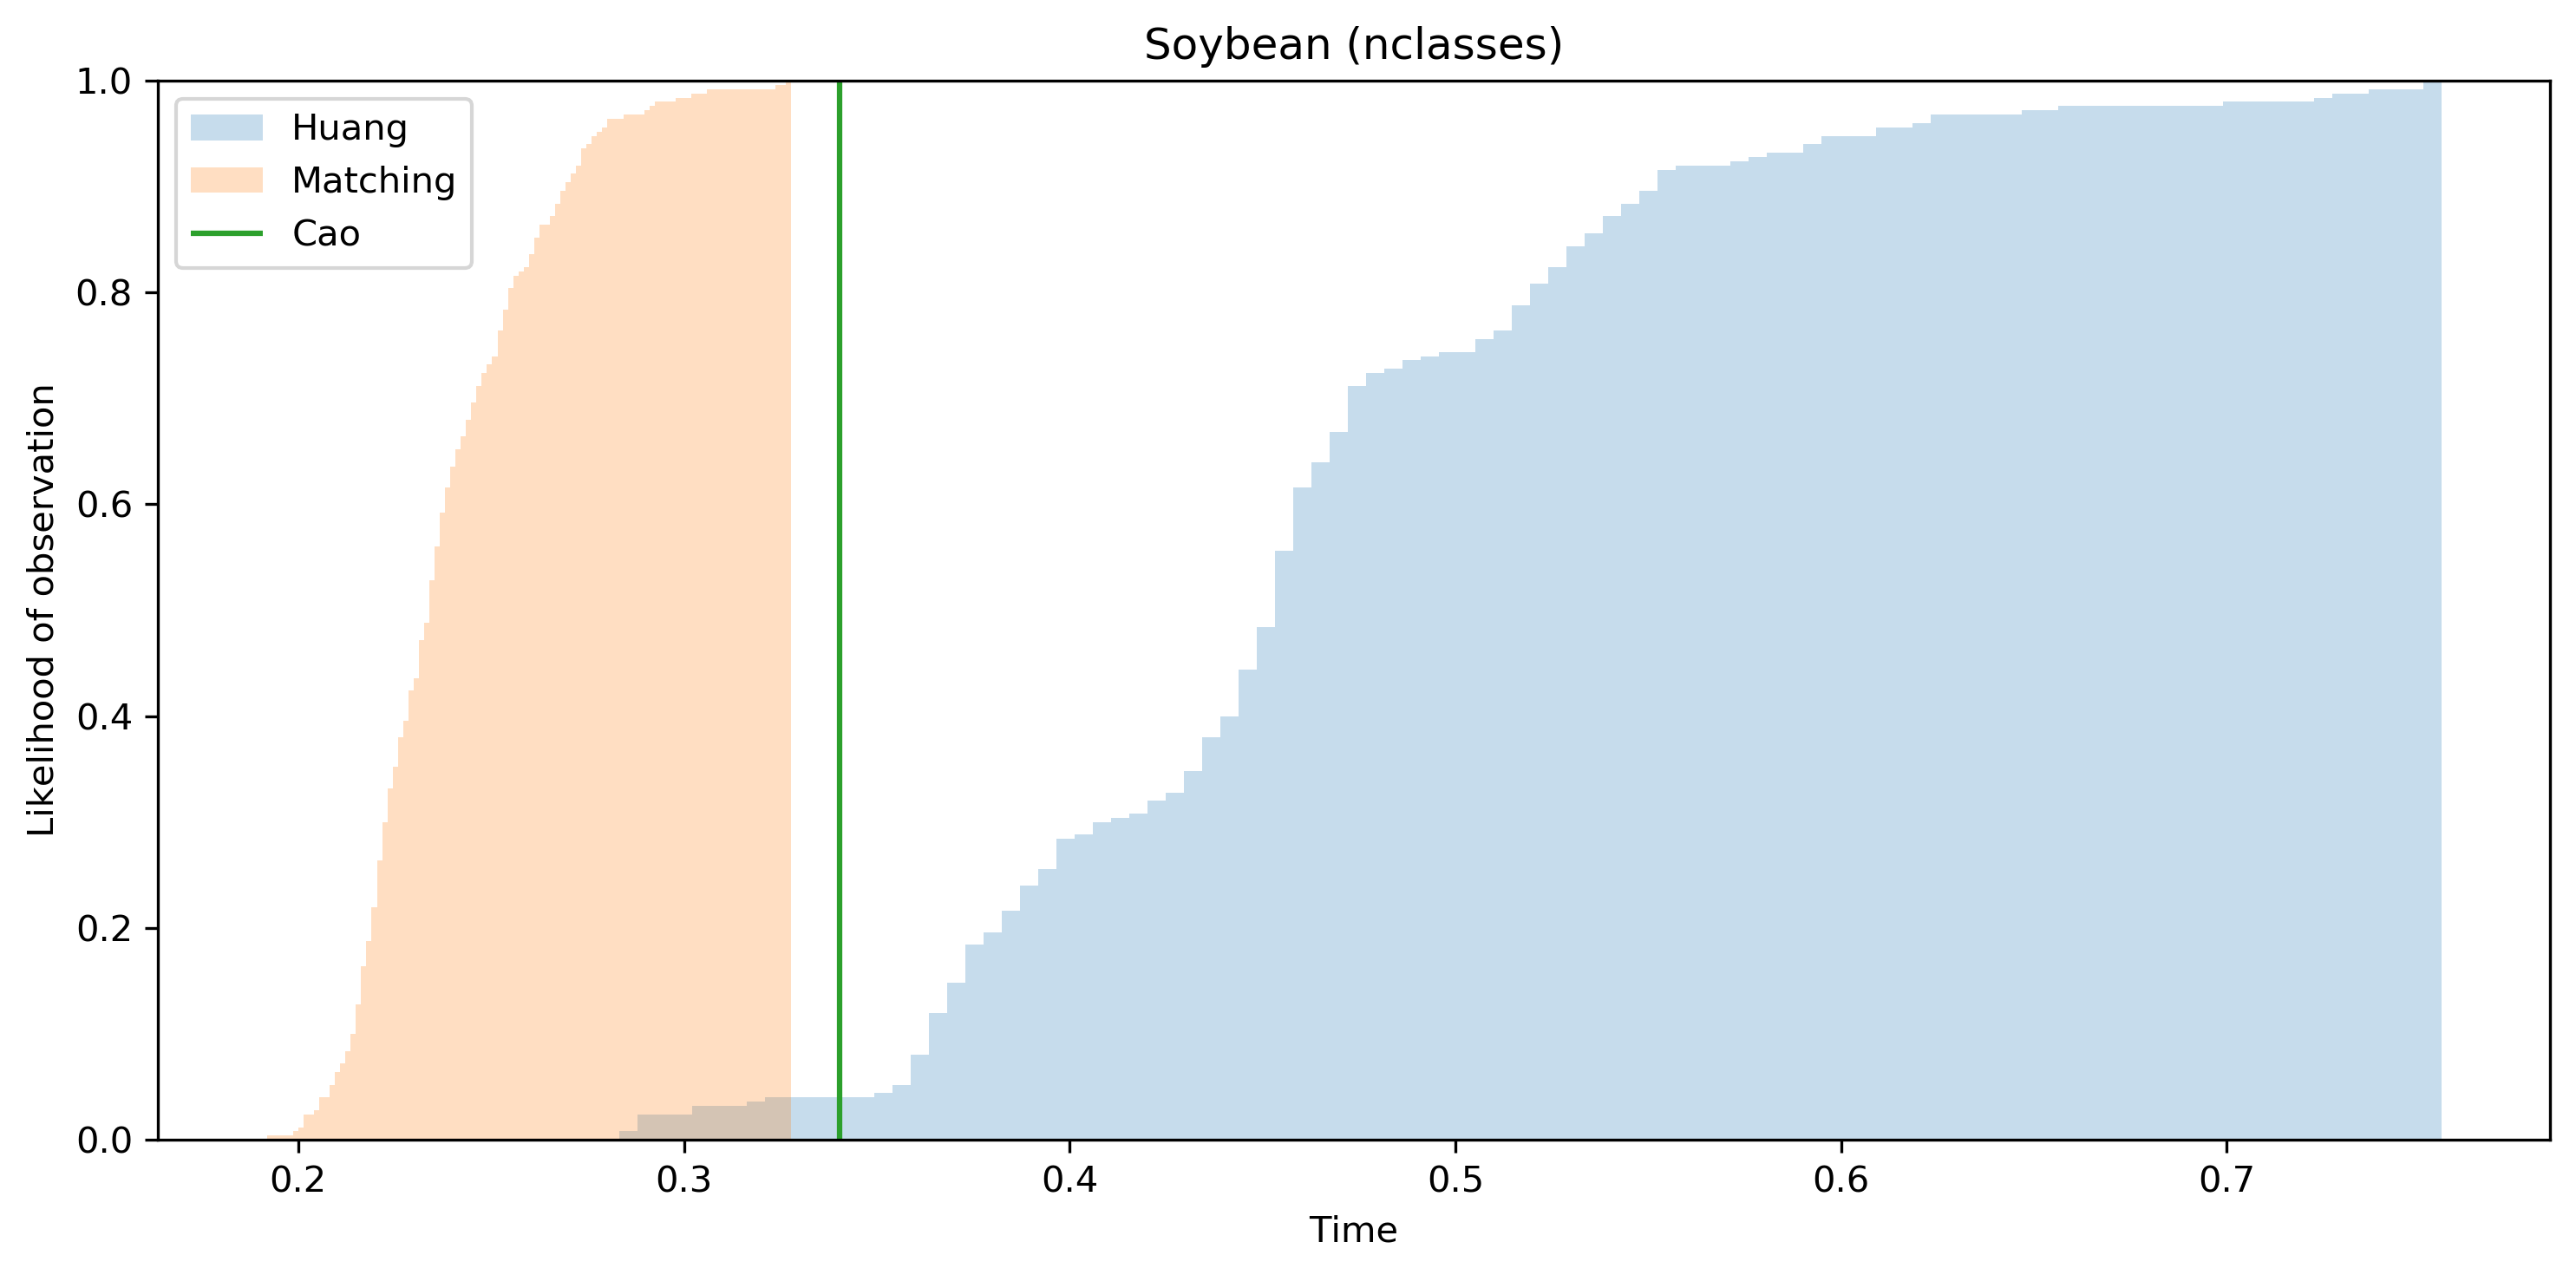

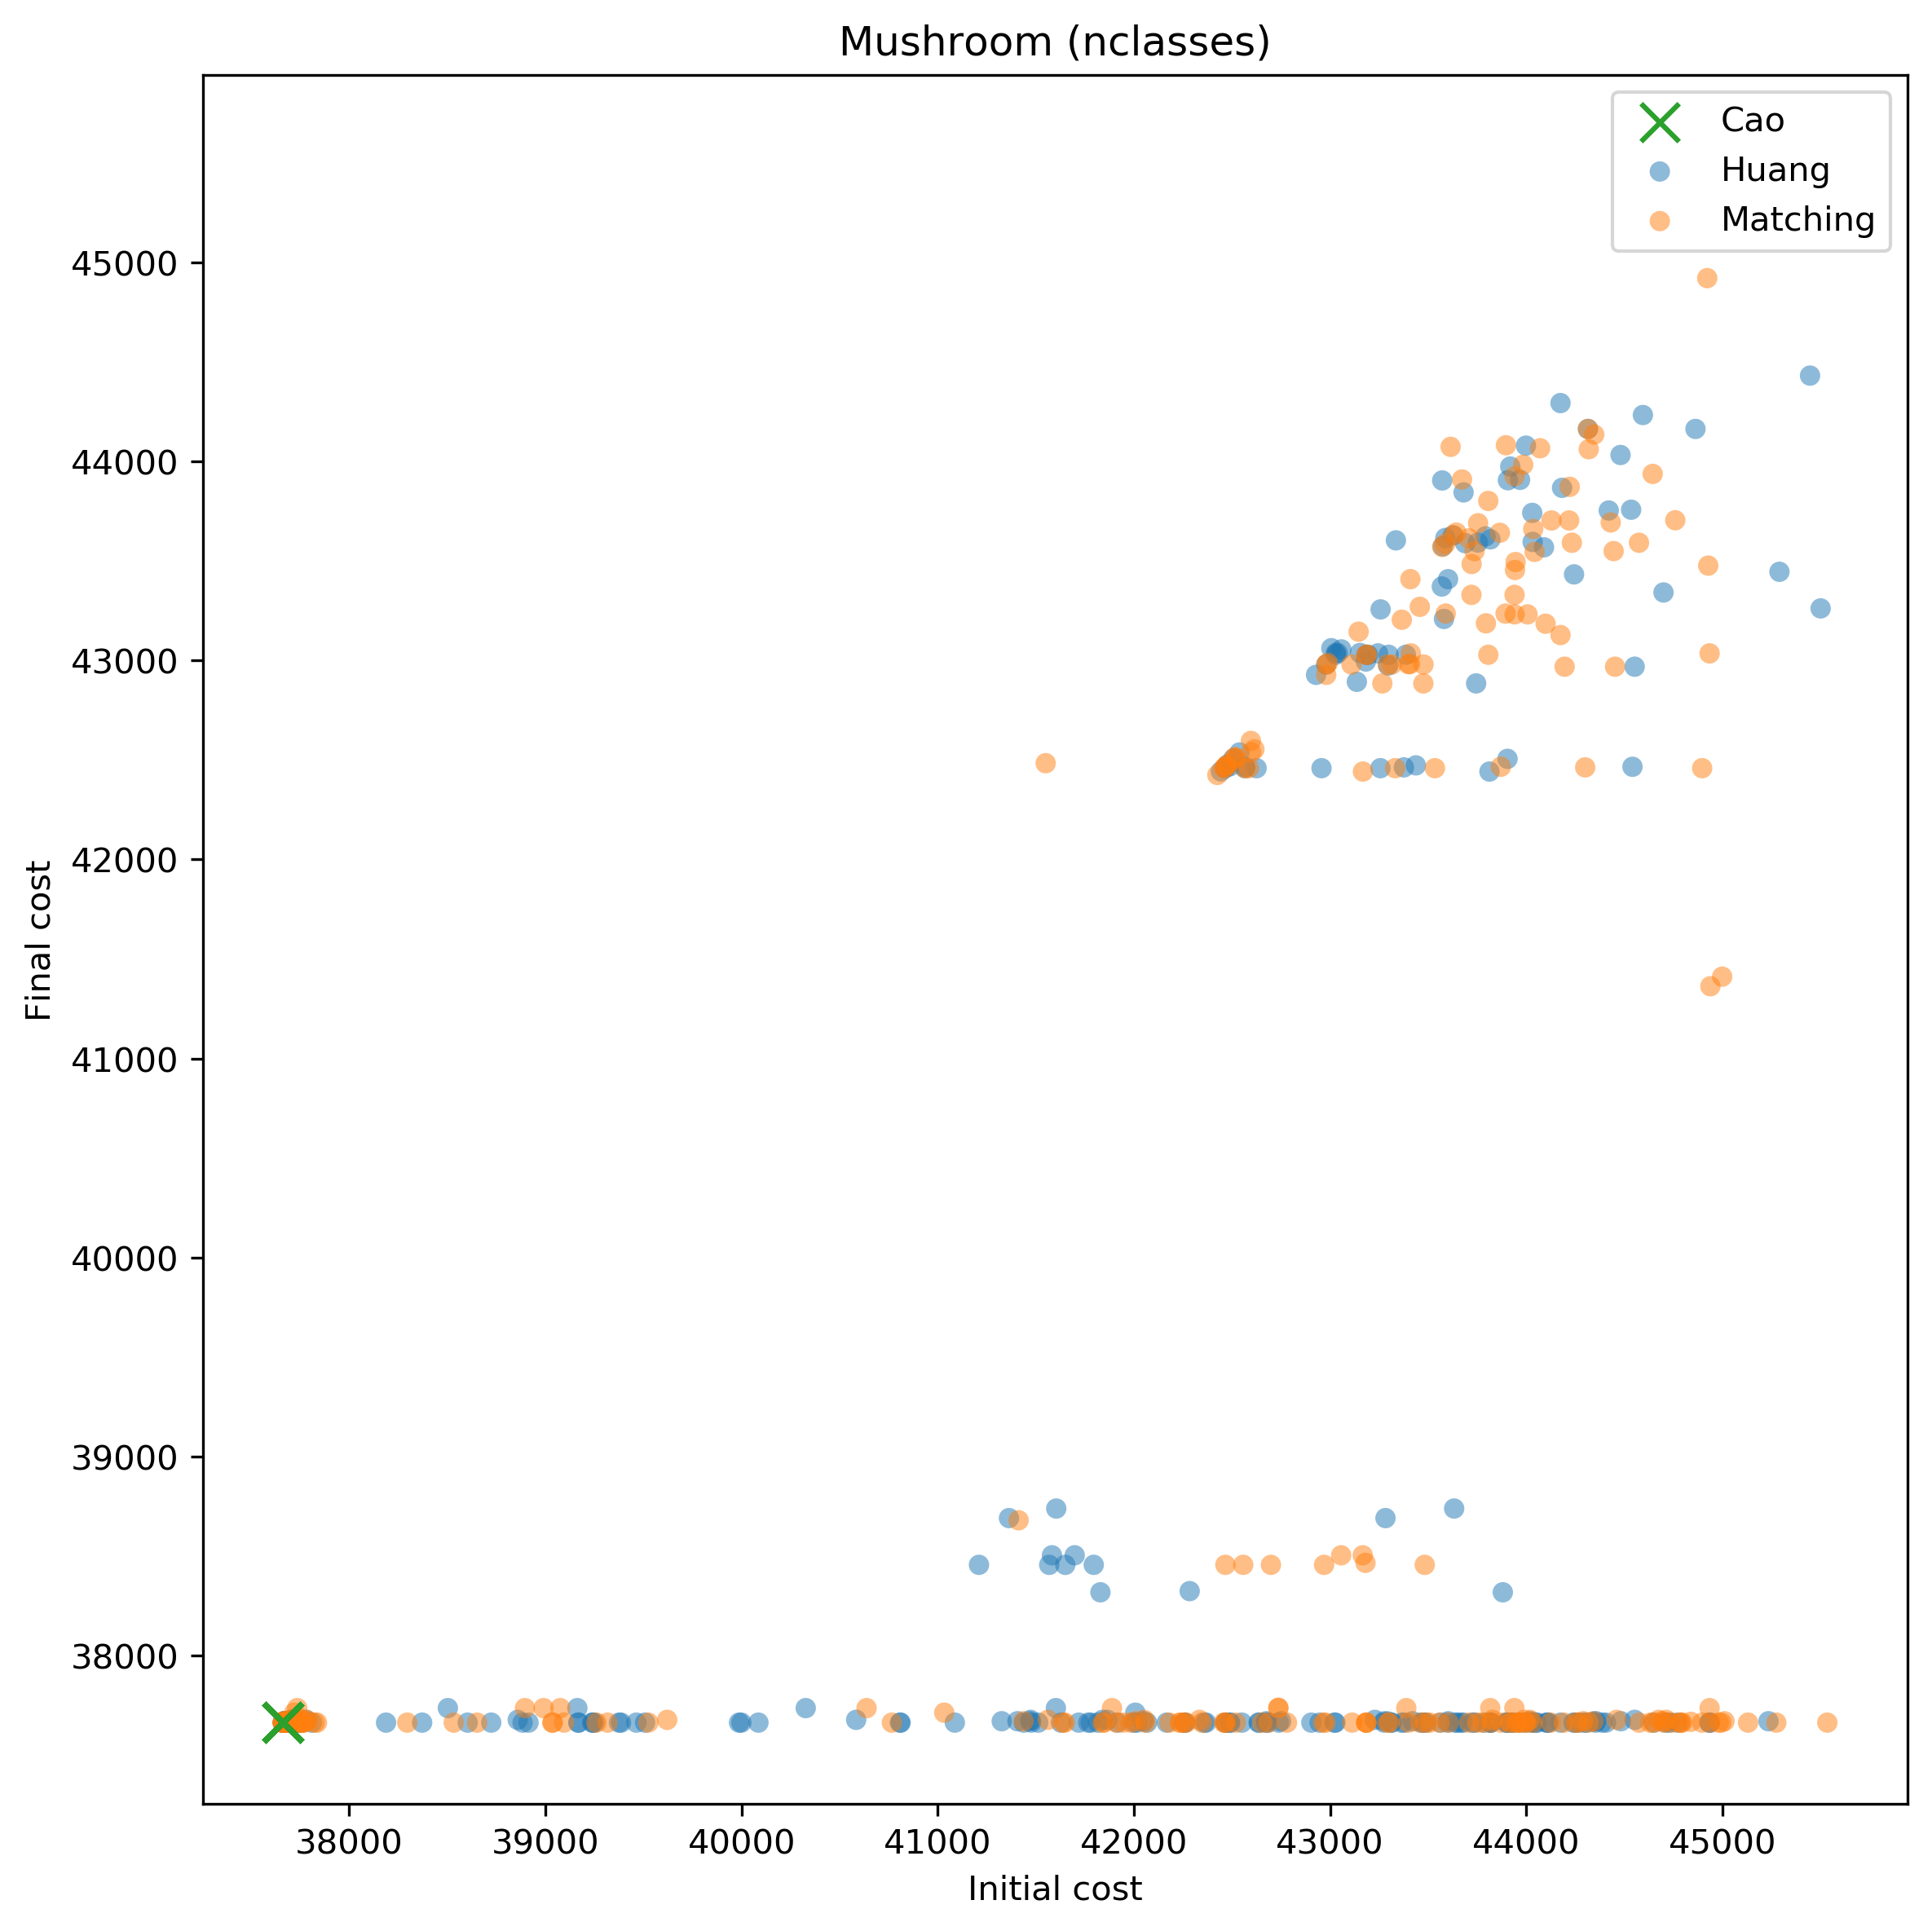

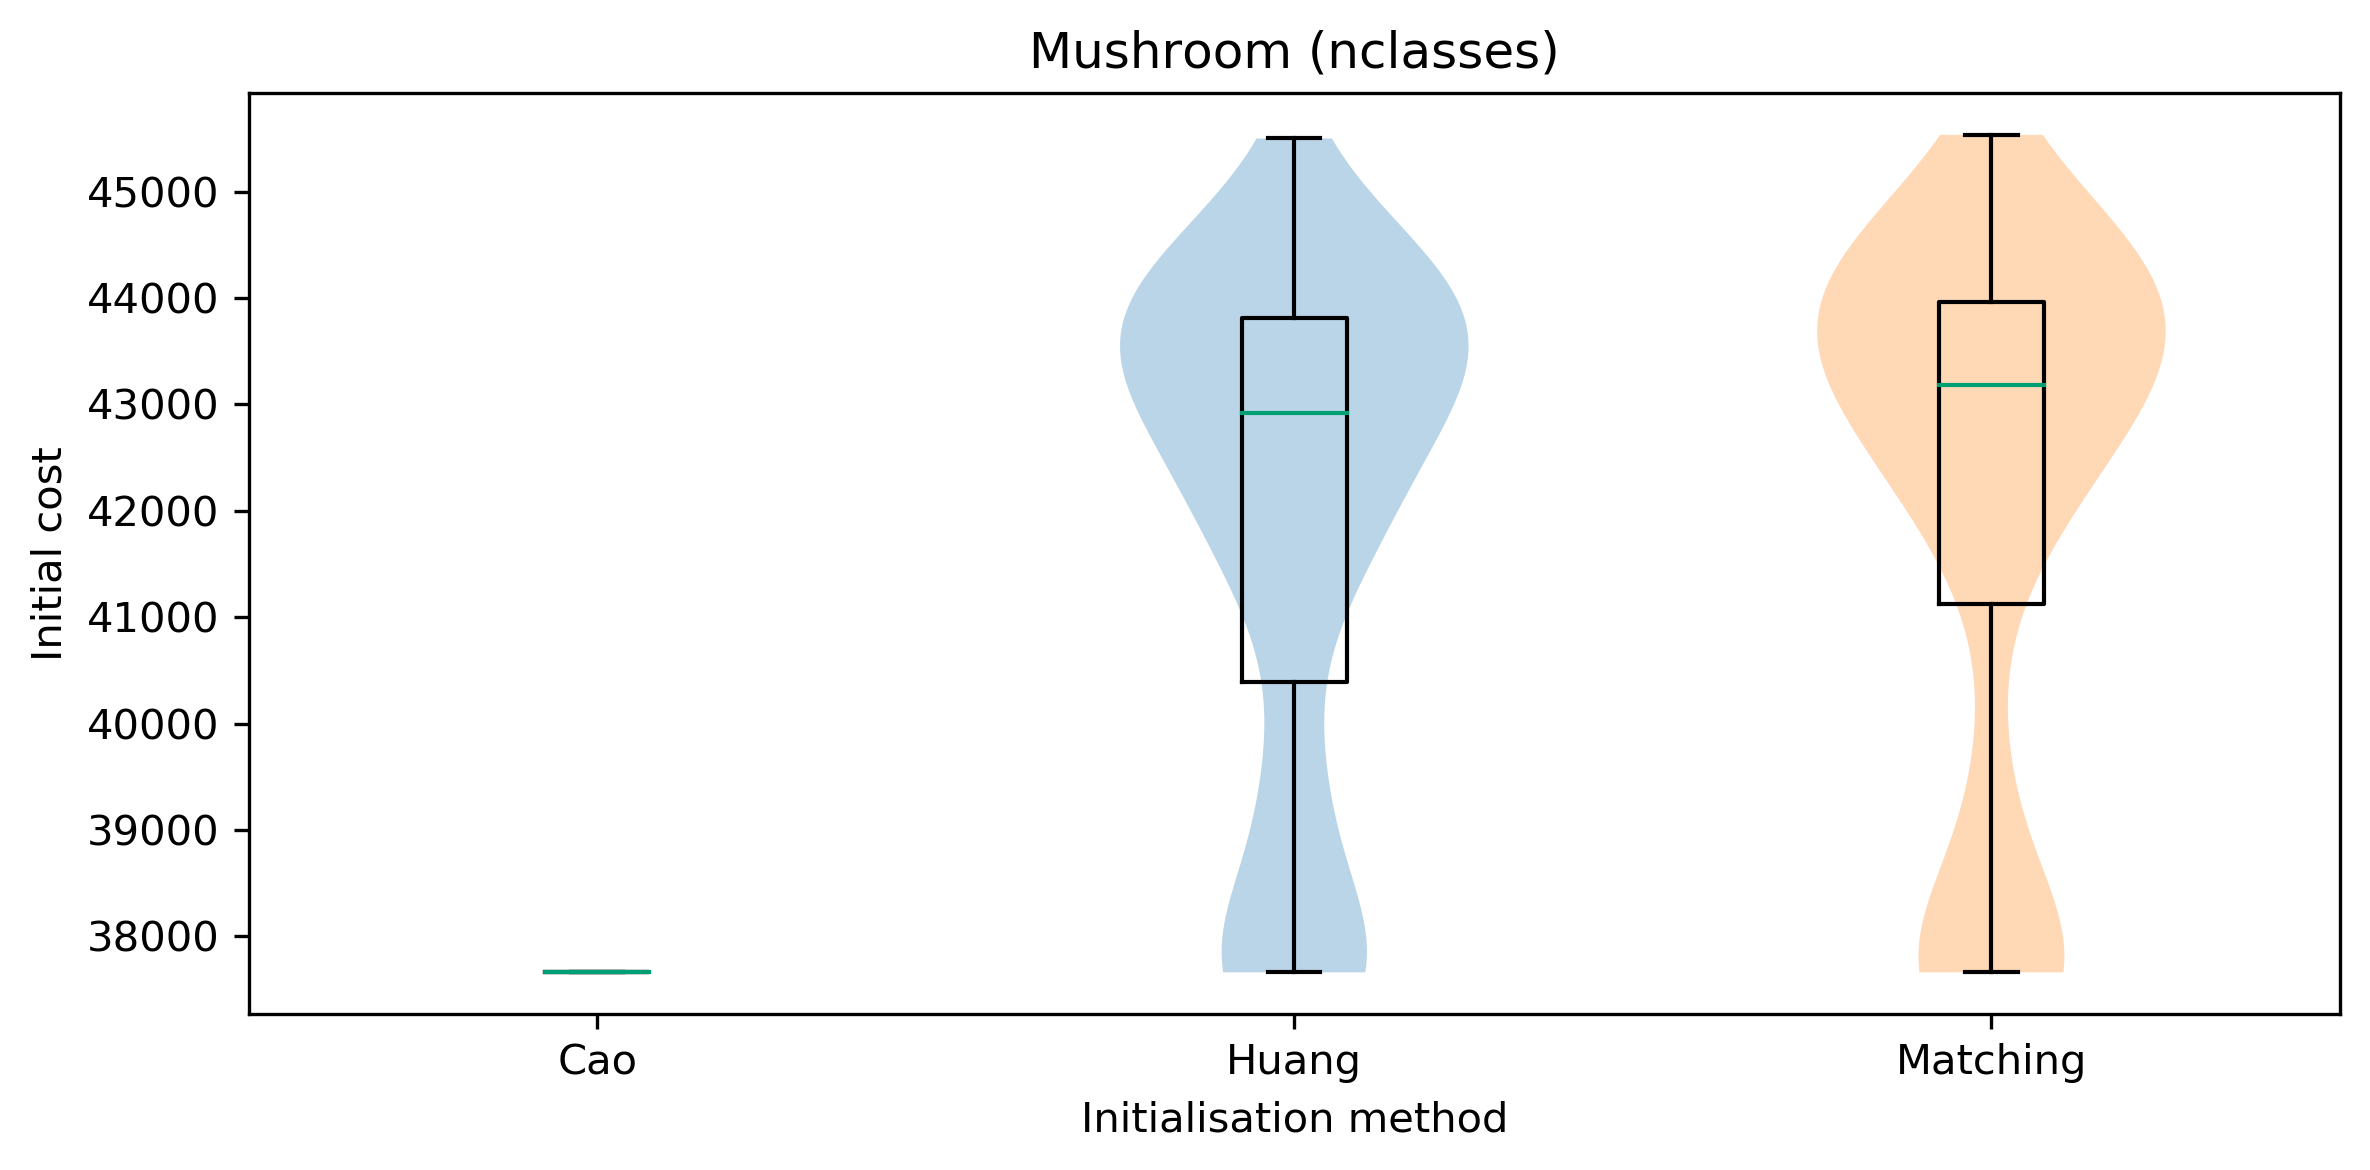

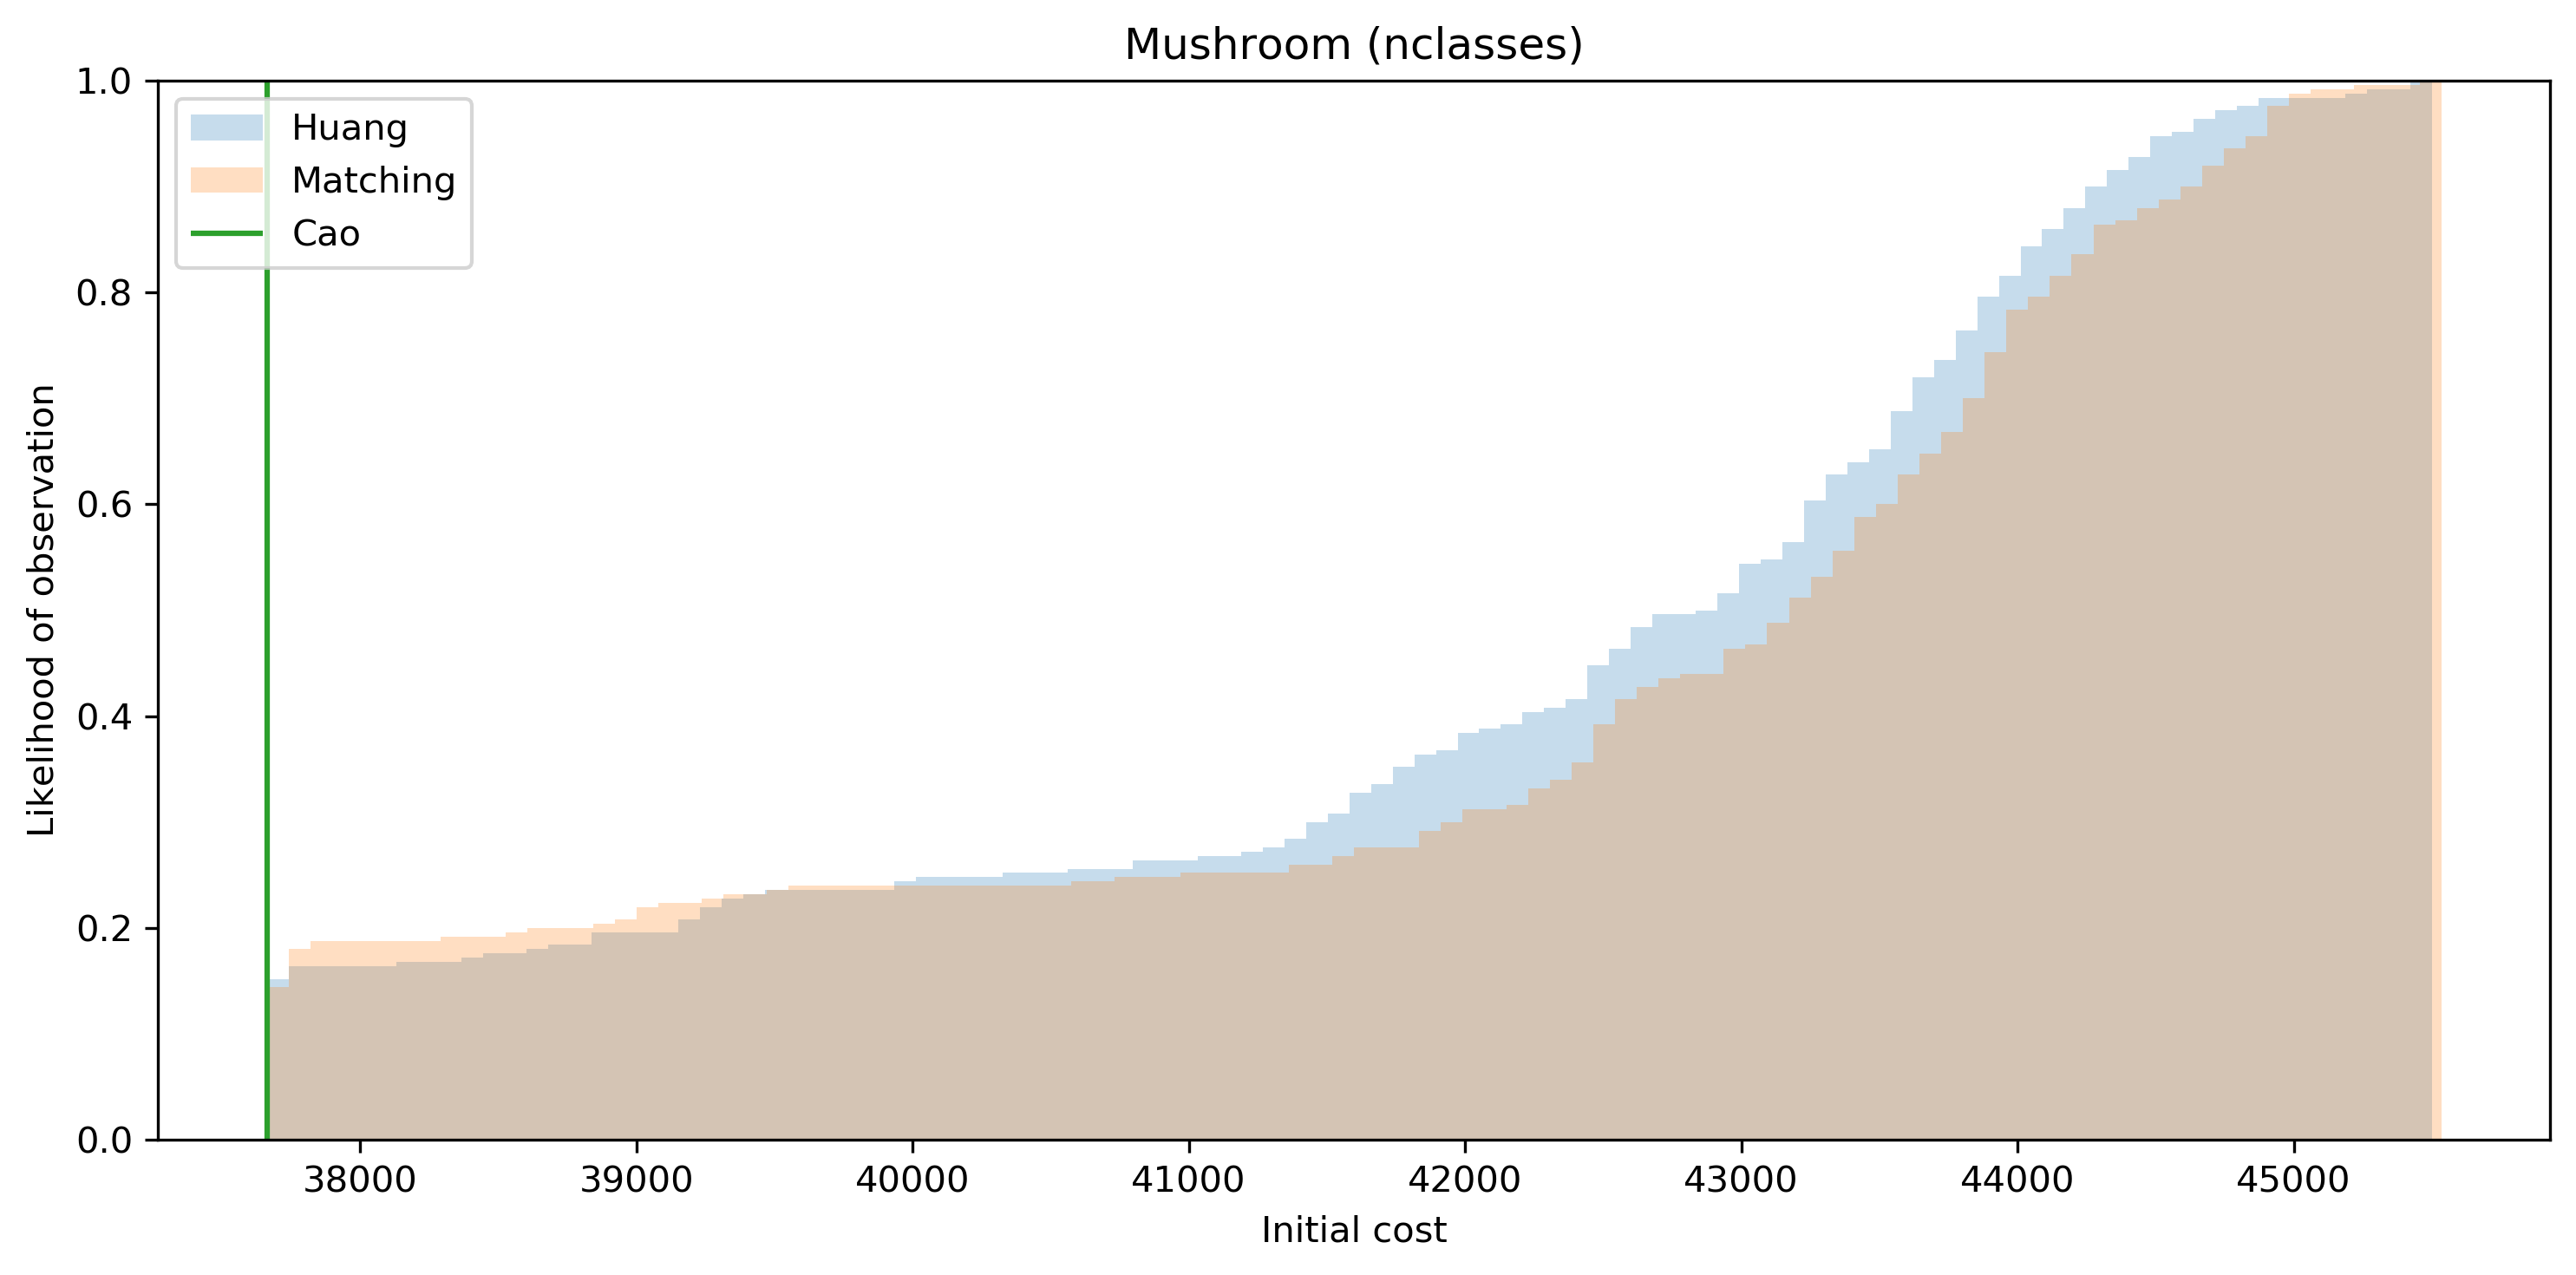

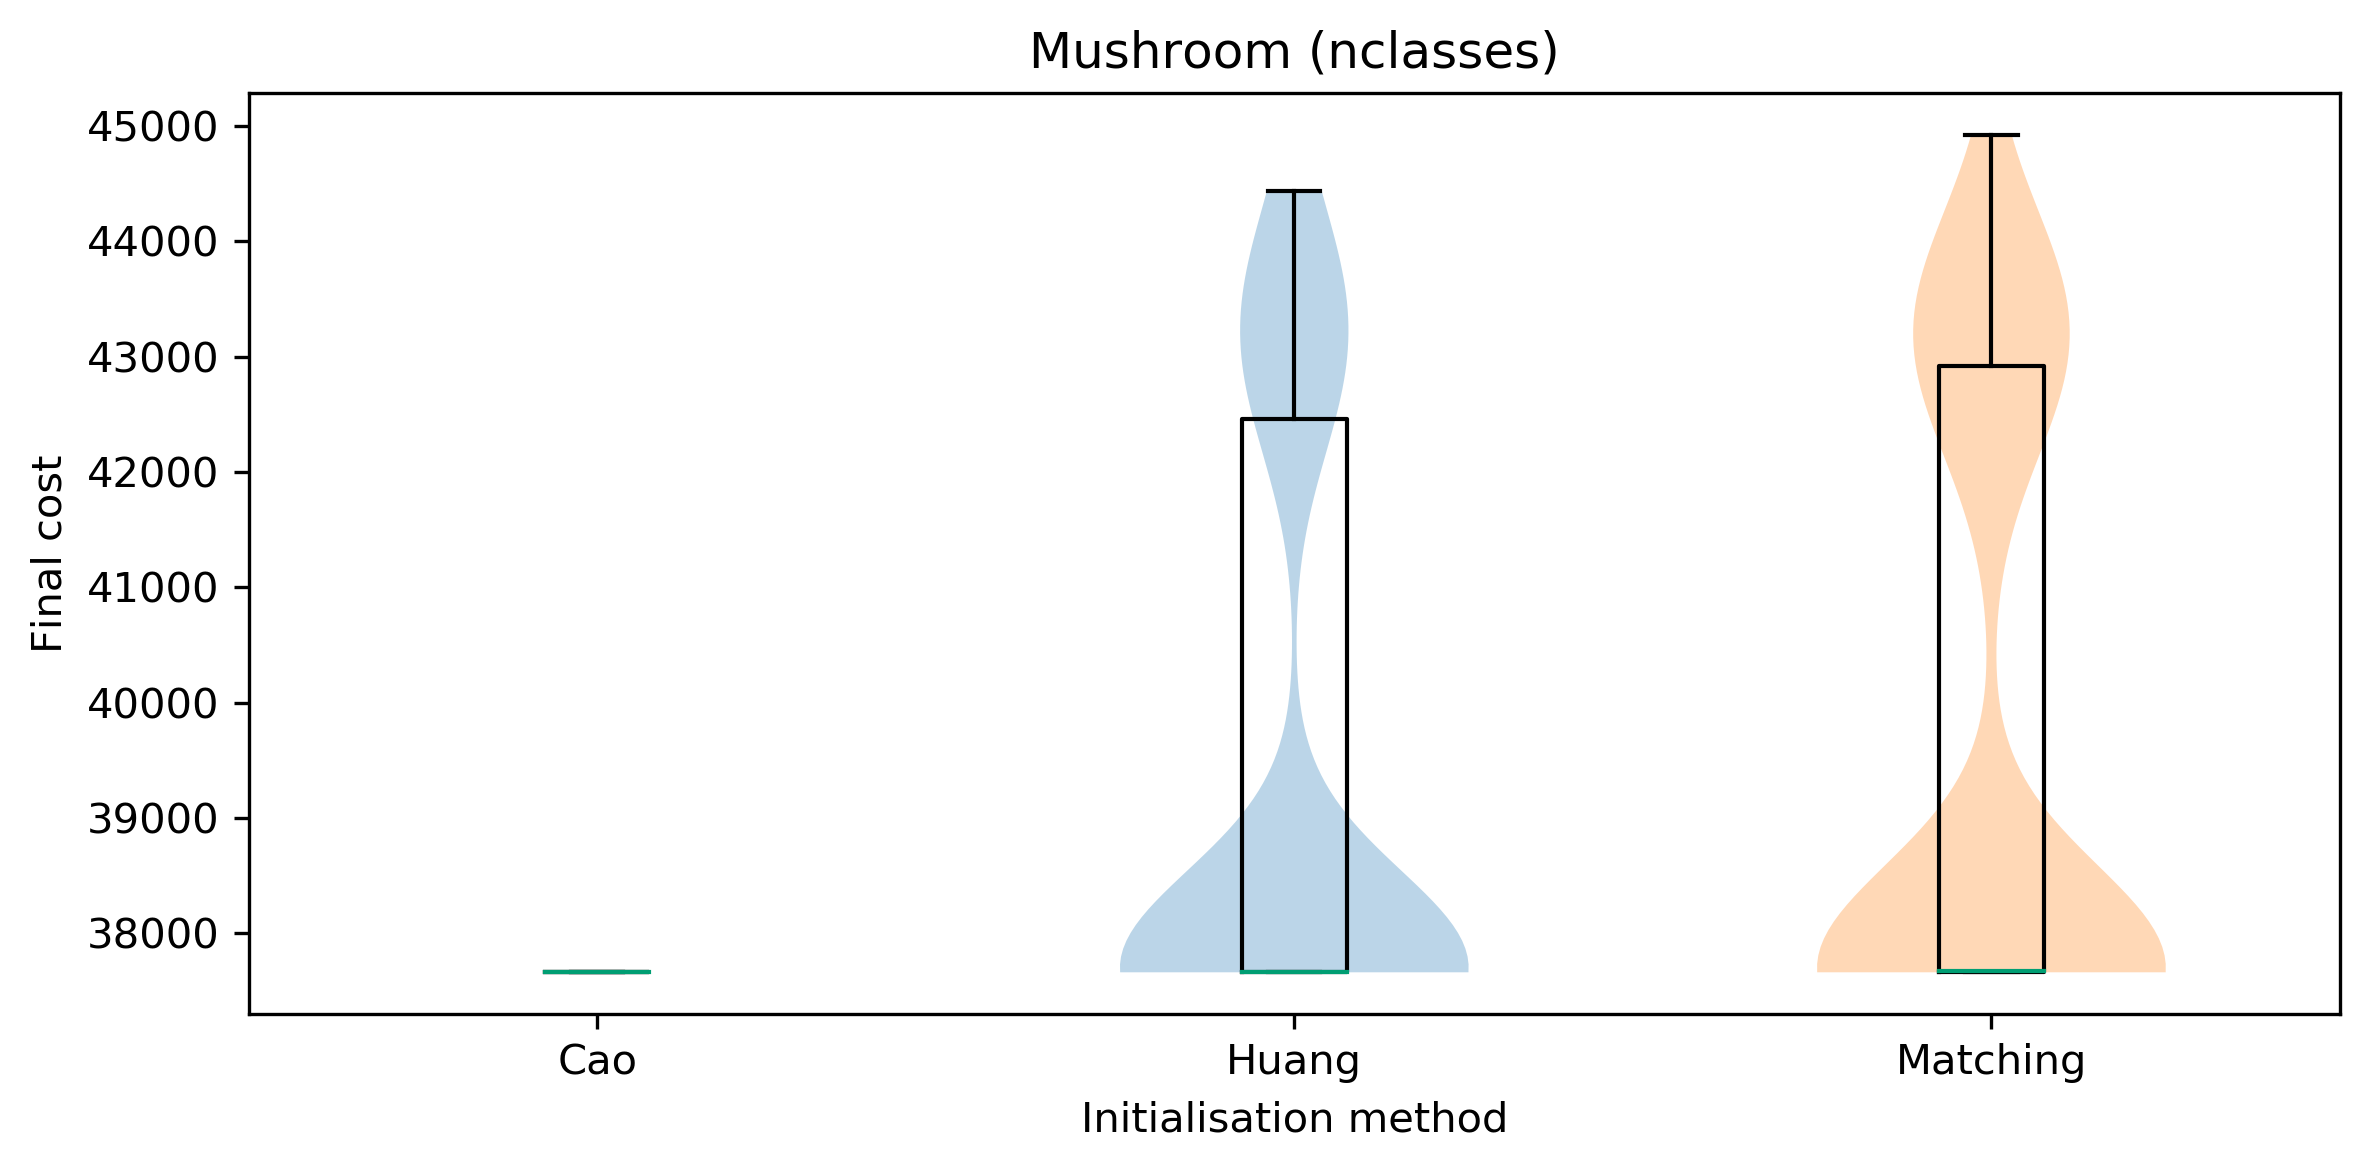

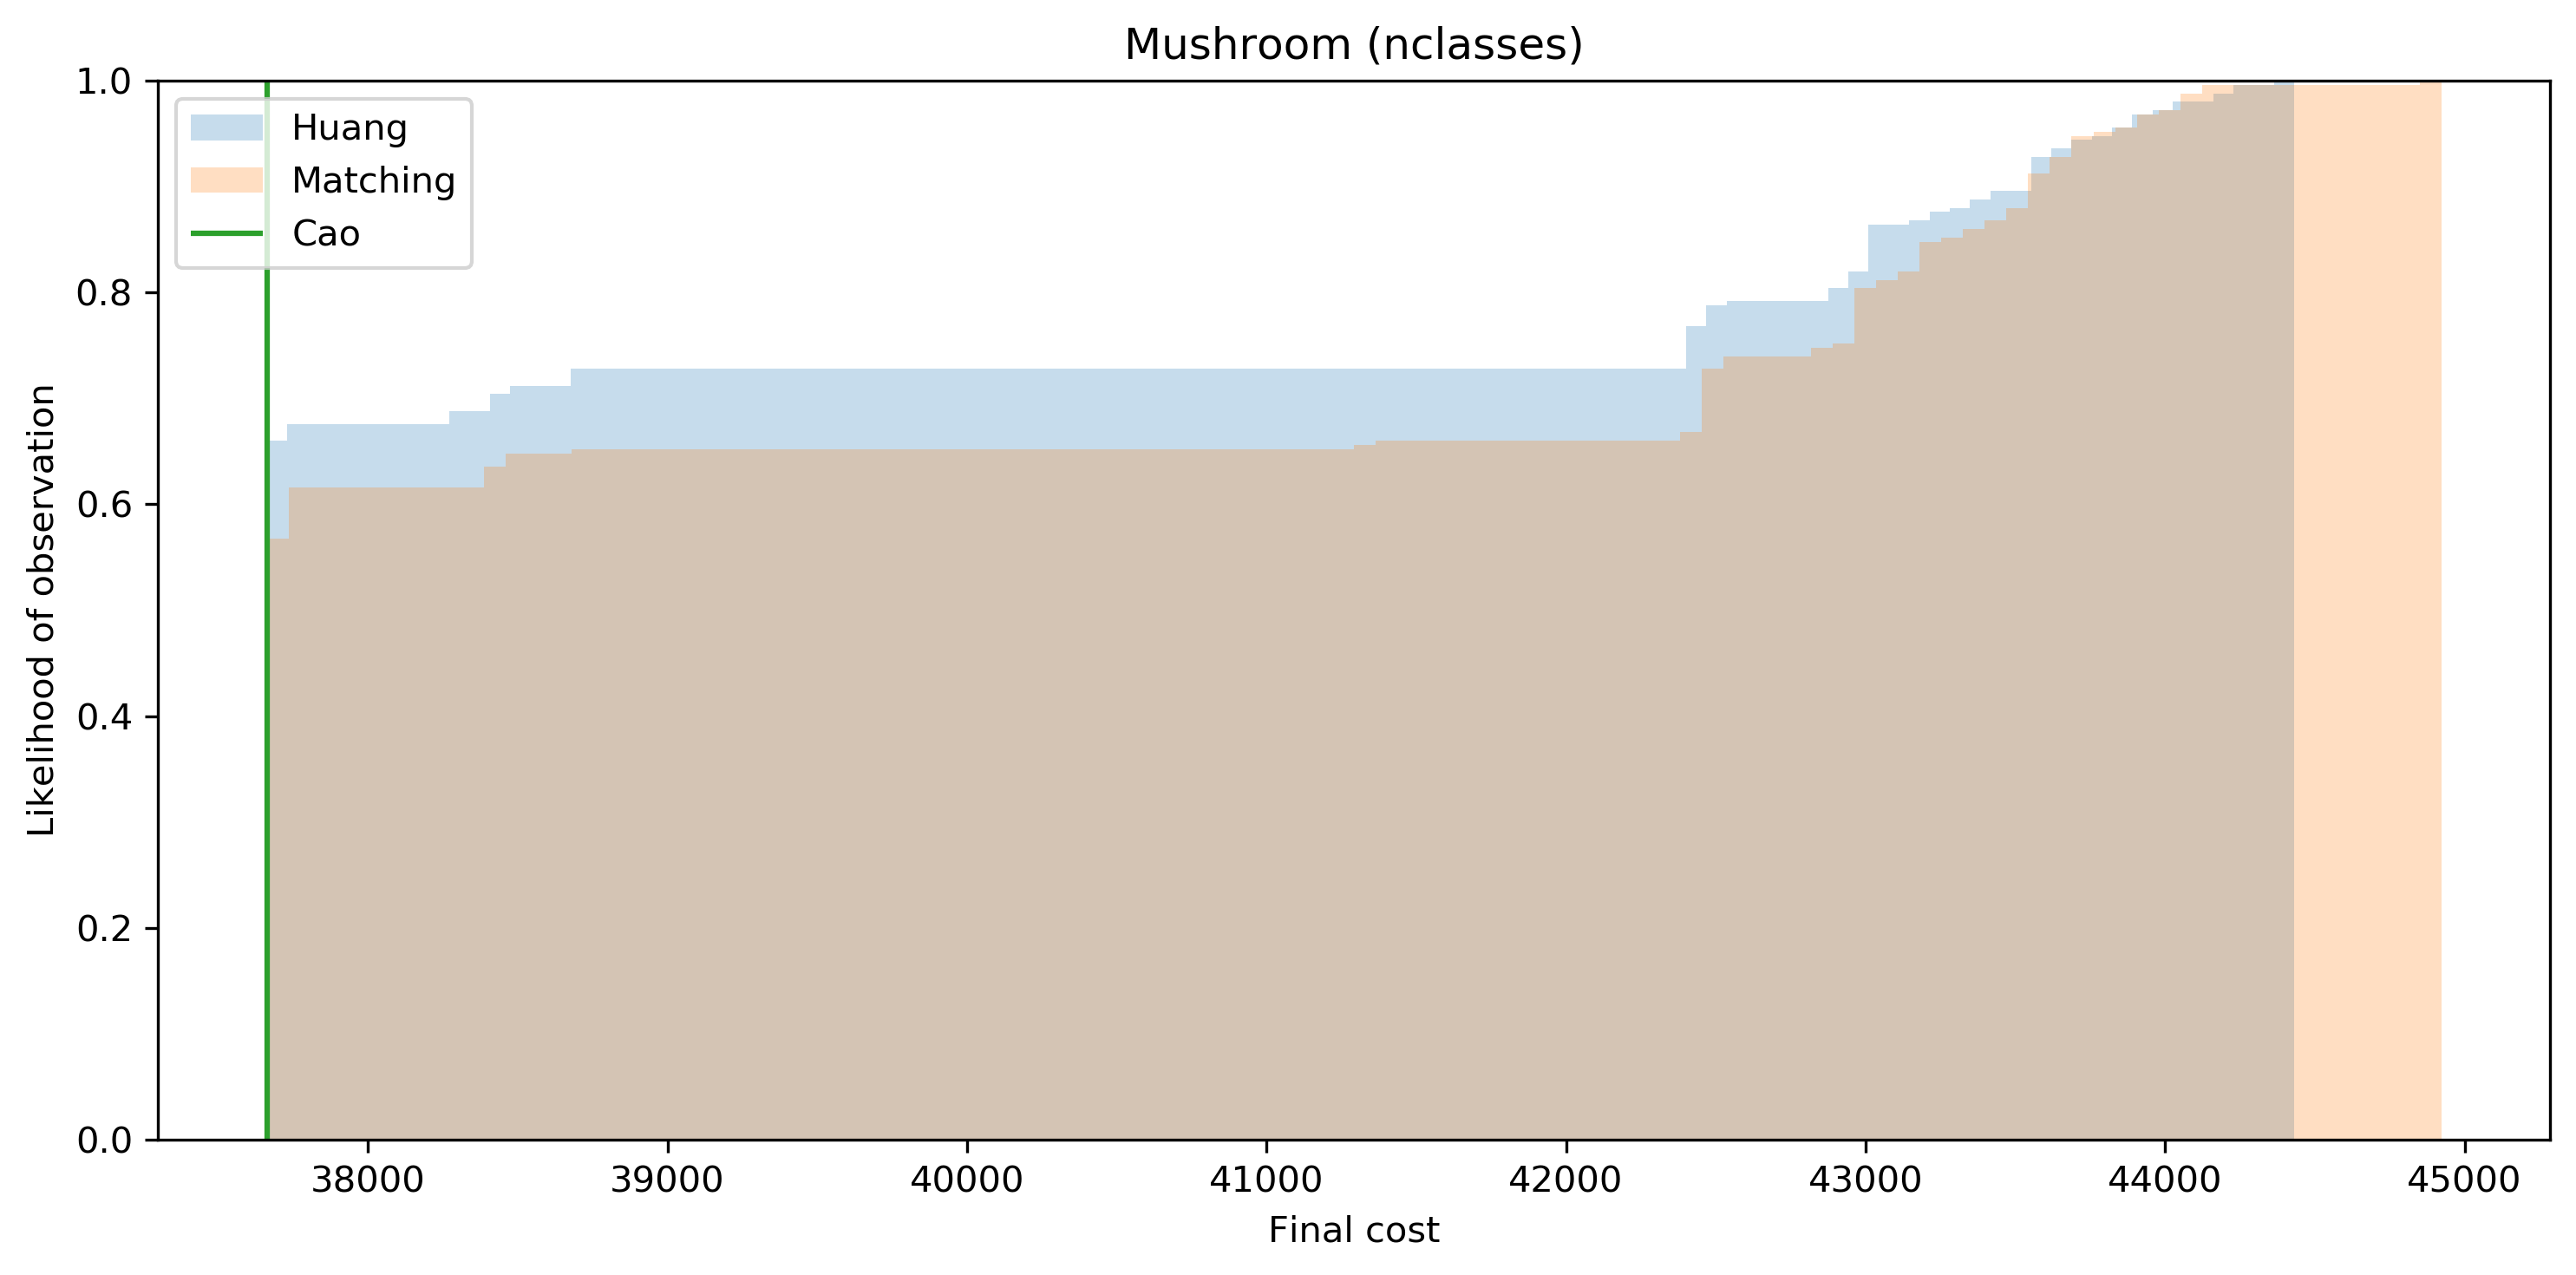

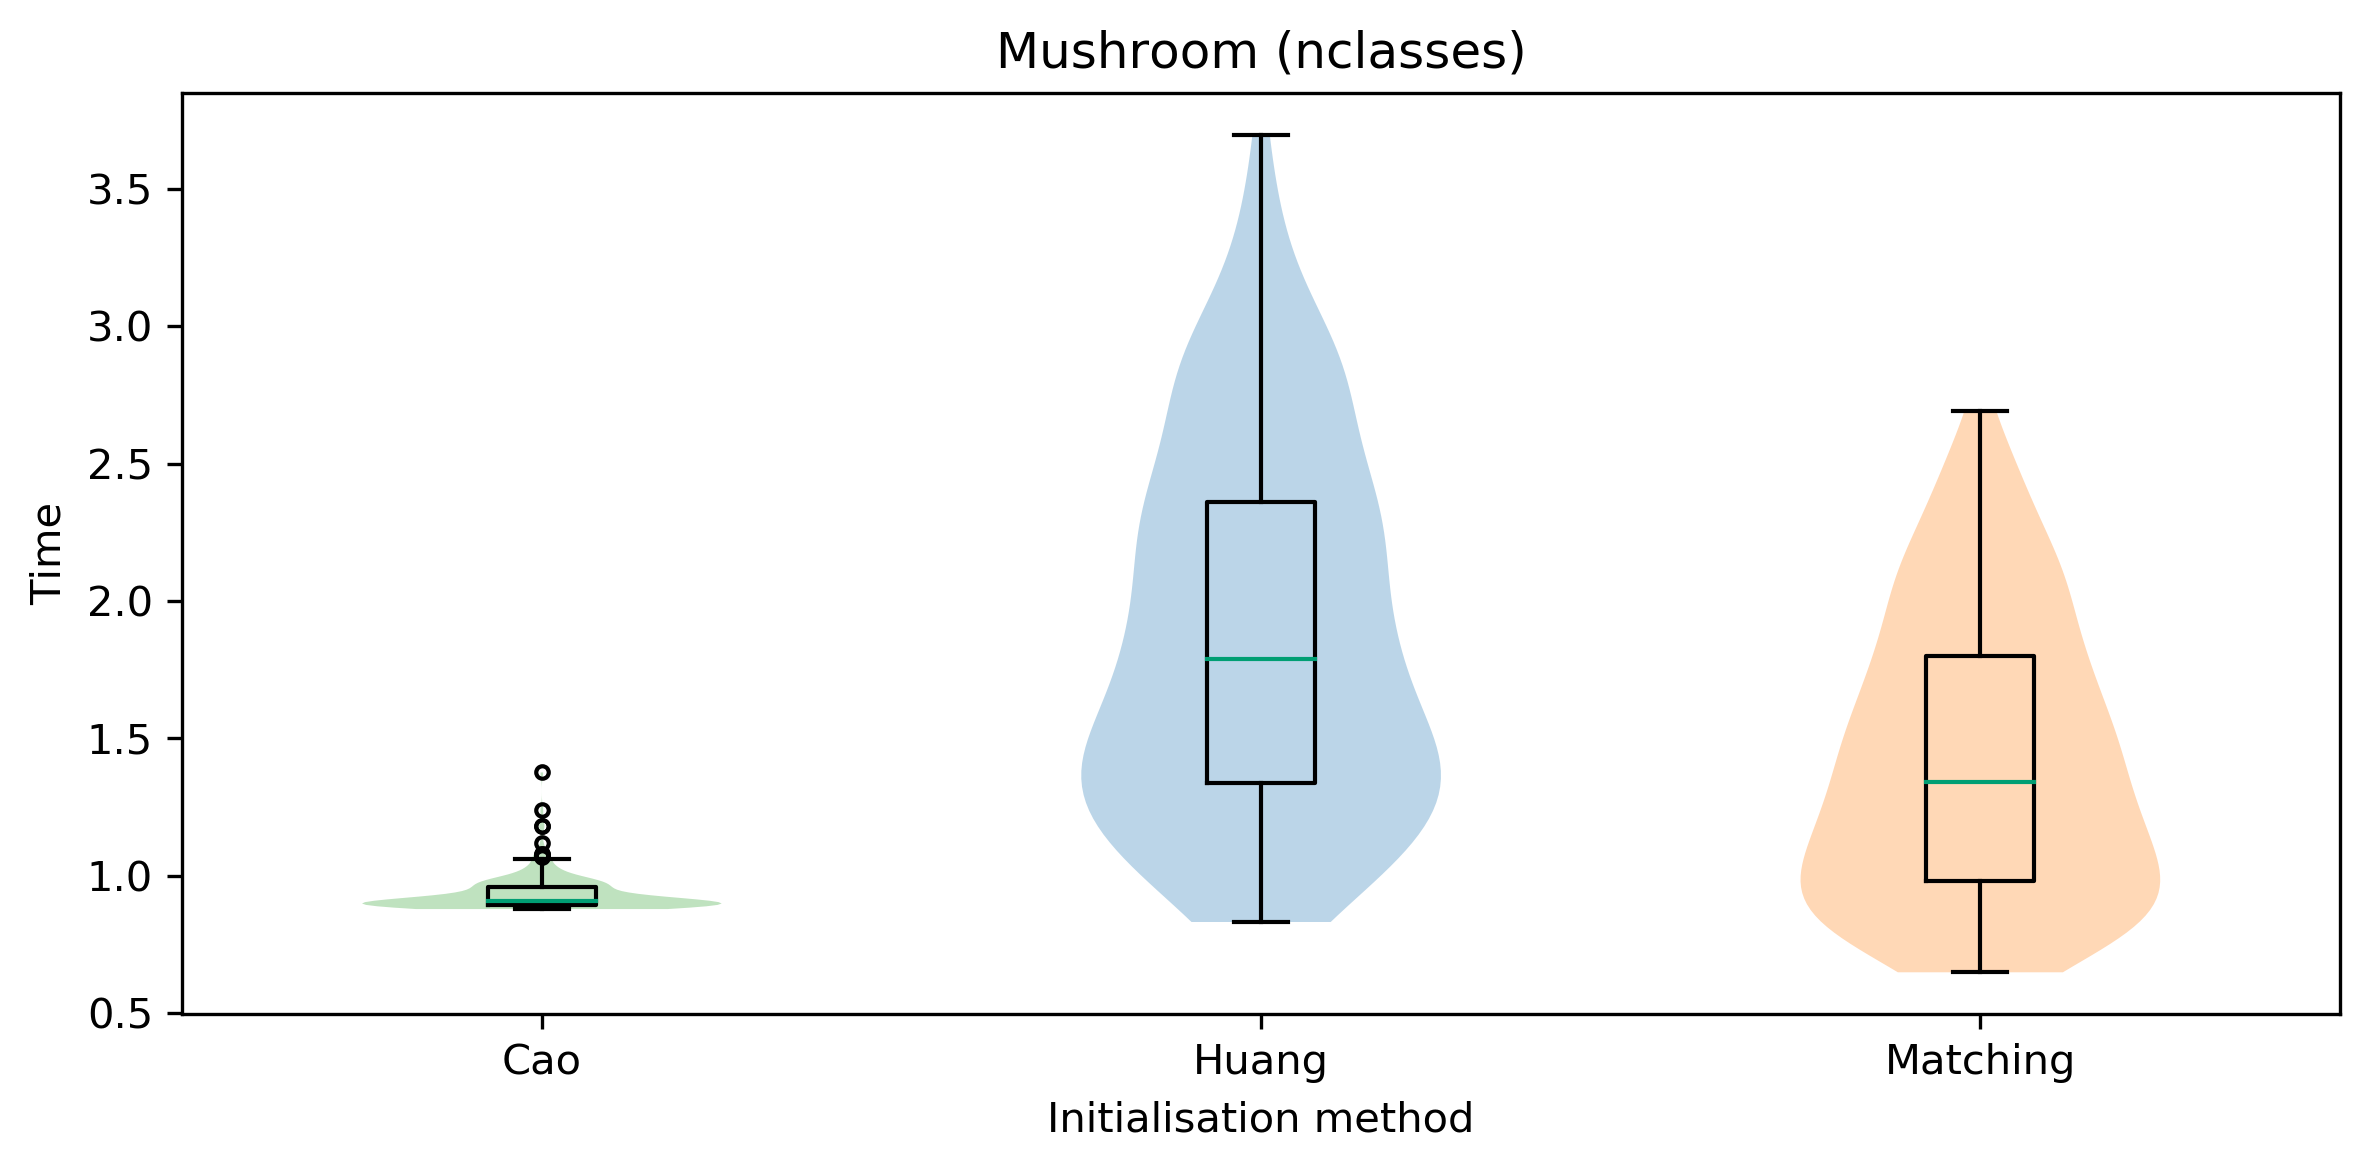

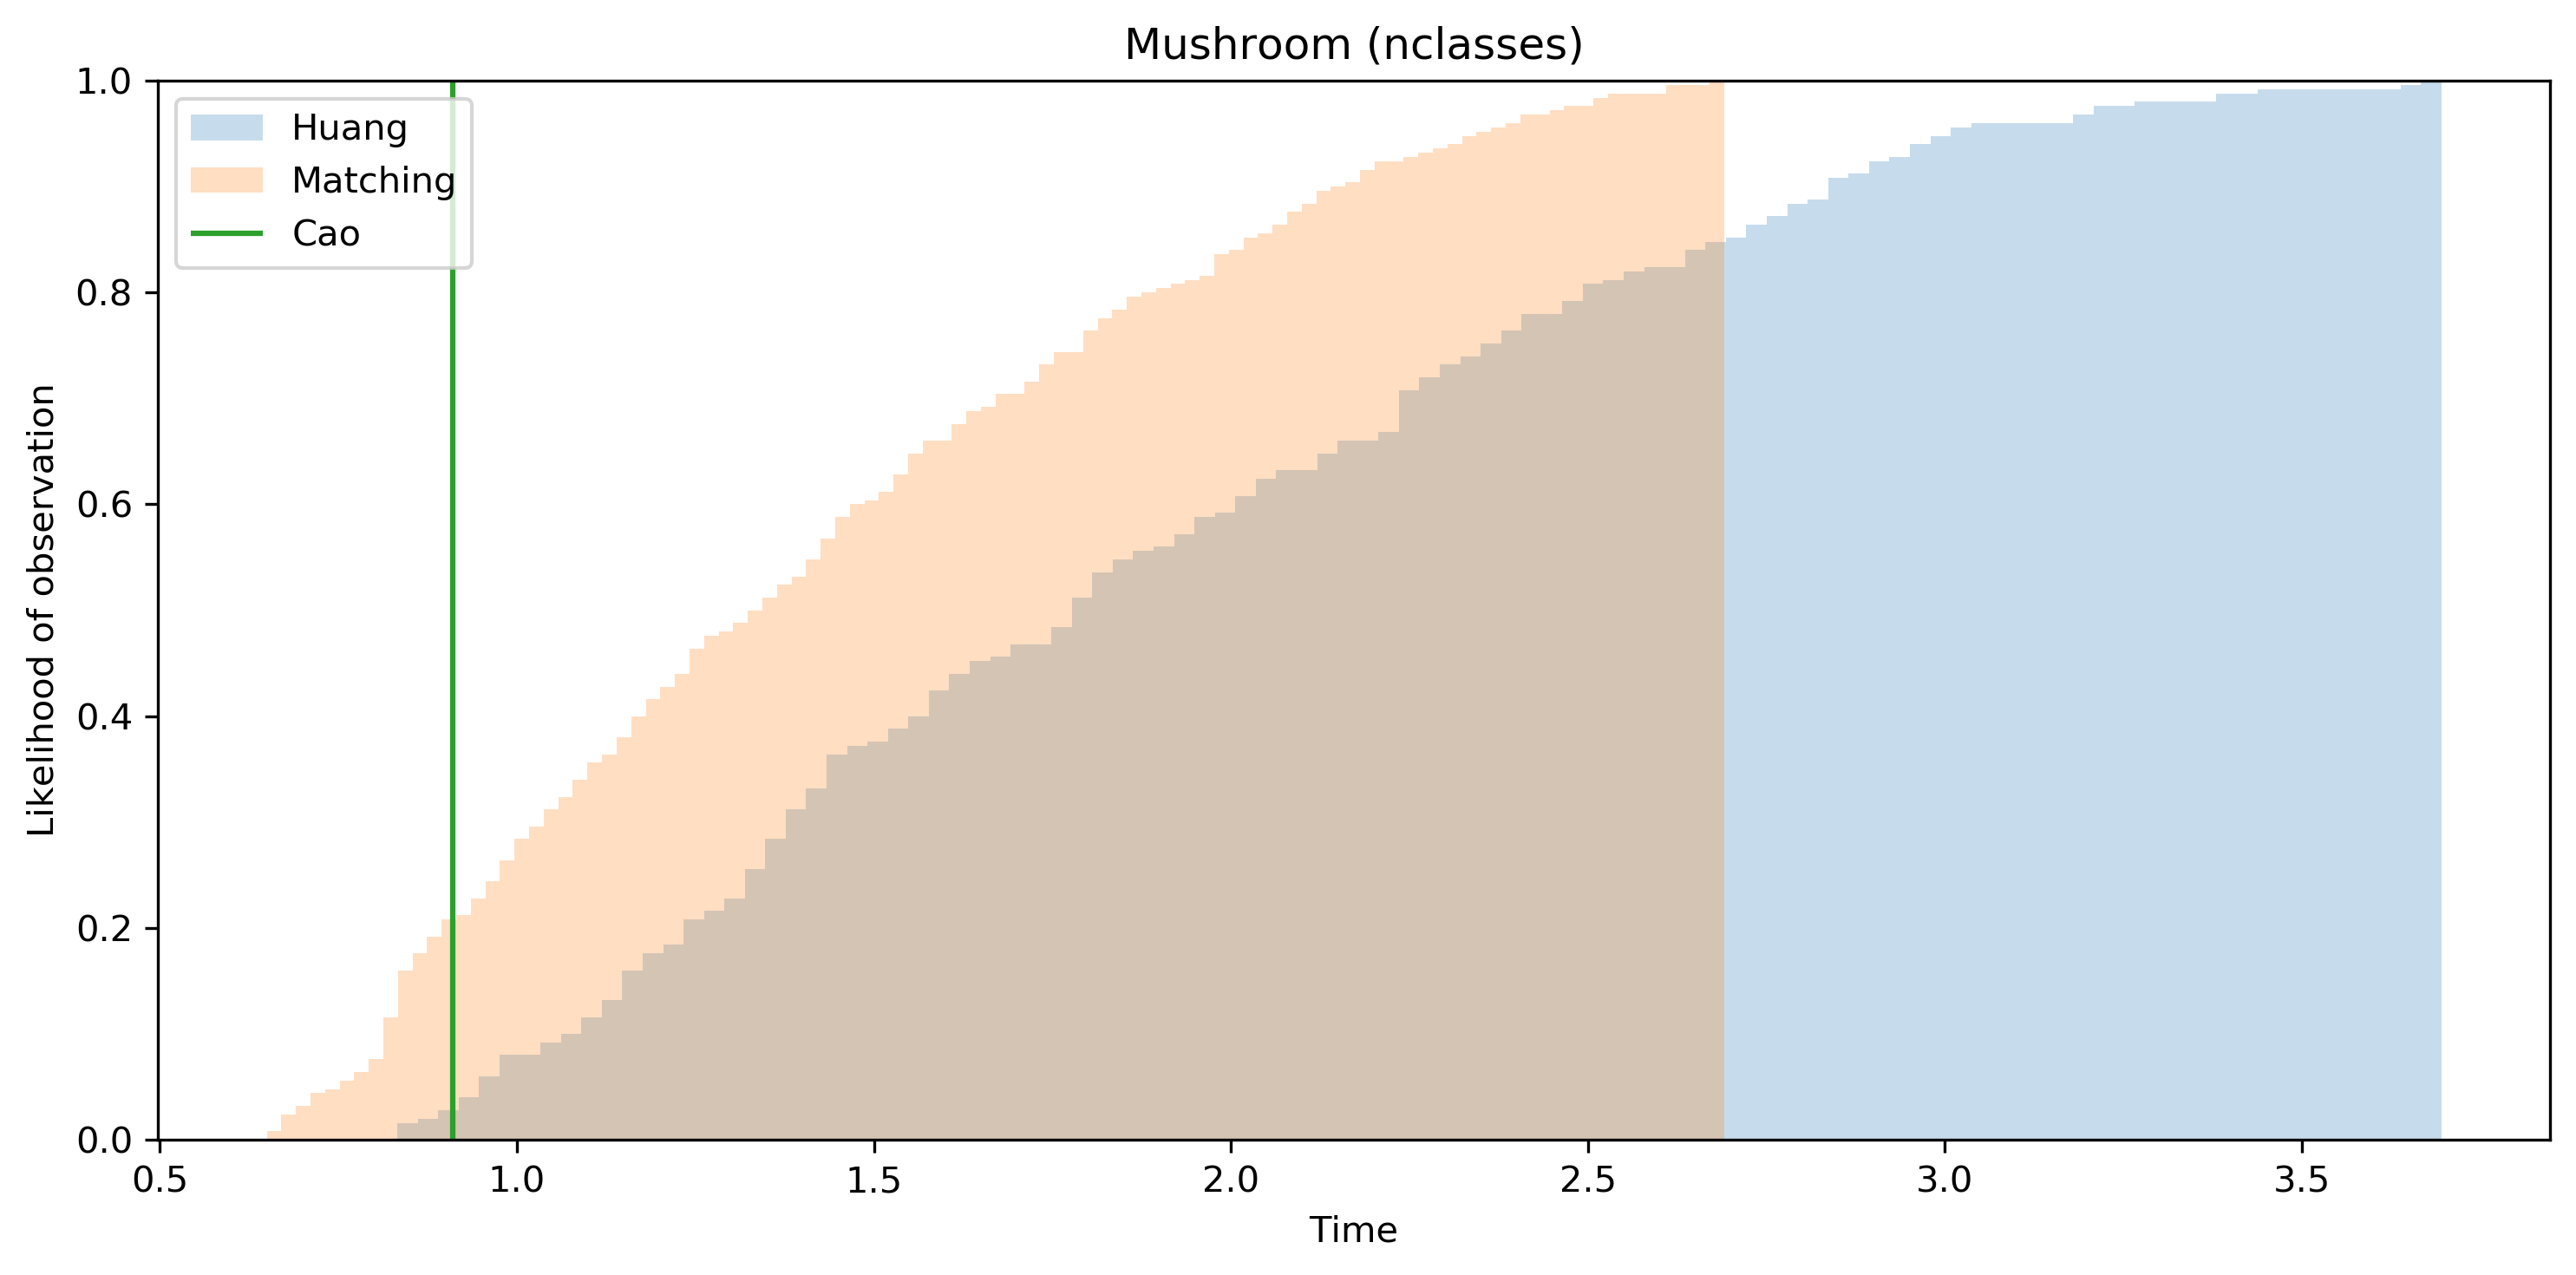

In [6]:
for root in (
    "elbow/",
    "nclasses/",
):
    for name in (
        "breast_cancer",
        "soybean",
        "mushroom",
    ):
        scatter_plots(name, f"../data/{root}", destination=f"../img/{root}")
        for column in (
            "initial_cost",
            "final_cost",
            "time",
        ):
            violin_plots(name, column, f"../data/{root}", destination=f"../img/{root}")
            empirical_cdf_plots(name, column, f"../data/{root}", destination=f"../img/{root}")


# Result tables


In [7]:
def get_summary(name, root, destination=None):

    results = pd.read_csv(f"{root}{name}_results.csv")

    means = results.groupby("initialisation")[
        ["initial_cost", "final_cost", "n_iterations", "time"]
    ].mean()

    stds = results.groupby("initialisation")[
        ["initial_cost", "final_cost", "n_iterations", "time"]
    ].std()

    summary = pd.DataFrame(columns=means.columns, index=means.index)
    for j, column in enumerate(means):
        for i, _ in enumerate(means[column]):
            summary.iloc[i, j] = f"{means.iloc[i, j]:.2f} ({stds.iloc[i, j]:.3f})"

    summary.columns = ["Initial cost", "Final cost", "No. iterations", "Time"]
    summary.index = ["Cao", "Huang", "Matching"]

    if destination is not None:
        summary.to_latex(f"{destination}{name}_summary.tex")

    print(f"{name} ({root.split('/')[-2]}) summary:\n", summary, "\n\n")


In [8]:
for root in (
    "elbow/",
    "nclasses/",
):
    for name in ("breast_cancer", "soybean", "mushroom"):
        get_summary(name, f"../data/{root}", f"../tex/{root}")


breast_cancer (elbow) summary:
               Initial cost        Final cost No. iterations          Time
Cao        2178.00 (0.000)   1955.00 (0.000)   4.00 (0.000)  0.35 (0.024)
Huang     2123.41 (91.200)  2015.07 (42.762)   2.69 (0.806)  0.24 (0.049)
Matching  2123.50 (95.512)  2016.54 (43.953)   2.70 (0.767)  0.19 (0.036) 


soybean (elbow) summary:
               Initial cost        Final cost No. iterations          Time
Cao        1822.00 (0.000)   1700.00 (0.000)   4.00 (0.000)  0.25 (0.028)
Huang     1947.17 (96.286)  1835.87 (68.705)   3.22 (0.928)  0.23 (0.051)
Matching  1933.08 (91.038)  1826.28 (70.252)   3.24 (1.037)  0.15 (0.029) 


mushroom (elbow) summary:
                  Initial cost           Final cost No. iterations  \
Cao          29922.00 (0.000)     29621.00 (0.000)   2.00 (0.000)   
Huang     35137.90 (3333.563)  31318.09 (1421.638)   3.02 (1.033)   
Matching  35401.59 (3204.238)  31266.18 (1224.468)   3.00 (0.931)   

                  Time  
Cao       1.79 